#  **Задача. Создание предсказательной модели и его интерфейса по прогнозированию спроса на товары заказчика собственного производства ООО “Лента”.**

### **Заказчик**: ООО “Лента”

### **Бизнес цель:**
Разработать прогностический инструмент в помощь планирования приготовления товаров собственного производства (кухня, пекарня и пр.).

#### **Побочная бизнес цель:**
При получении точных прогнозов ожидается снижение объема упущенных продаж, уменьшение числа списаний по сроку годности.

## **Постановка задачи**:
**Задача:** Необходимо создать алгоритм прогноза спроса на 14 дней для товаров собственного производства. Гранулярность ТК-SKU-День.

**Финальный результат:** отчёт/таблица, в которой строим прогноз спроса по товарам, в каком количестве необходимо их приготовить в каждом ТК:
- для повышения доступности товаров на полке,
- для увеличения продаж, без увеличения списаний.

**Источник данных:** Хакатон Лента

**Целевой признак:** **`sales_in_units`** – общее число проданных товаров (шт.)

**Метрика качества:** *MAPE*, посчитанный на уровне товар, магазин, день.
> Если есть пропущенные значения и по каким-то товарам не предоставлен прогноз, прогноз считается равным нулю.
```
def wape(y_true: np.array, y_pred: np.array):
return np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true))
```

## **Описание проекта:**

### **Данные**
- **sales_df_train.csv** –данные по продажам за скользящий год для обучения.
- **pr_df.csv** – данные по товарной иерархии.
- **pr_st.csv** – данные по магазинам.
- **sales_submission.csv** – пример файла с результатом работы модели прогноза спроса.

### **Описание данных:**
1. **sales_df_train.csv** –данные по продажам за скользящий год для обучения.

Столбцы:
- `st_id` перевод в `store` – захэшированное id магазина;
- `pr_sku_id` перевод в `sku` – захэшированное id товара;
- `date` – дата;
- `pr_sales_type_id` перевод в `sales_type` – флаг наличия промо;
- `pr_sales_in_units` перевод в `sales_units` – общее число проданных товаров (шт.);
- `pr_promo_sales_in_units` перевод в `sales_units_promo` – число проданных товаров с признаком промо;
- `pr_sales_in_rub` перевод в `sale_rub` – продажи в РУБ всего (промо и без);
- `pr_promo_sales_in_rub` перевод в `sale_rub_promo` – продажи с признаком промо в РУБ;

2. **pr_df.csv** – данные по товарной иерархии.
От большего к меньшему `pr_group_id` - `pr_cat_id` - `pr_subcat_id` - `pr_sku_id`.

Столбцы:
- `pr_group_id` перевод в `group` – захэшированная группа товара;
- `pr_cat_id` перевод в `category` – захэшированная категория товара;
- `pr_subcat_id` перевод в `subcategory` – захэшированная подкатегория товара;
- `pr_sku_id` перевод в `sku` – захэшированное id товара;
- `pr_uom_id` перевод в `uom` - (маркер, обозначающий продаётся товар на вес или в ШТ).

3. **pr_st.csv** – данные по магазинам.

Столбцы:
- `st_id` перевод в `store` – захэшированное id магазина;
- `st_city_id` перевод в `city` – захэшированное id города;
- `st_division_code id` перевод в `division` – захэшированное id дивизиона;
- `st_type_format_id` перевод в `type_format` – id формата магазина;
- `st_type_loc_id` перевод в `loc` – id тип локации/окружения магазина;
- `st_type_size_id` перевод в `size` – id типа размера магазина;
- `st_is_active` перевод в `is_active` – флаг активного магазина на данный момент.

4. **sales_submission.csv** – пример файла с результатом работы модели прогноза спроса.
> Необходимо подготовить файл в таком же формате, заполнив колонку `target` предсказаниями (по умолчанию колонка заполнена нулями).

Столбцы:
- `st_id` – захэшированное id магазина;
- `pr_sku_id` – захэшированное id товара;
- `date` – дата (день);
- `target` – спрос в шт.

###**Описание решения:**
  1. Загрузка данных.
   - Предварительное изучение данных.
   - Предварительная подготовка данных. Отчистка от явно лишней информации.
   - Формирование общего датасета для дальнейшего исследование и предобработки.
  2. Исследовательский анализ:
    - Работа с аномалиями, пропусками и дубликатами.
    - формирования датасета для анализа.
    - Анализ временных рядов.
    - Анализ признаков.
  3. Анализ данных, формирование признаков:   
    - Удаление неинформативных признаков, генерация ряда признаков, по необходимости.
    - Разделение общего датасета на выборки для обучения и проверки модели.
    - Кодирование и масштабирование признаков - стандартизация данных, по необходимости.
  4. Построение и обучение модели:
    - Классические модели:
      - Предварительная проверка моделей.
      - Линейная регрессия.
      - CatBoostRegressor,
    - Orbit.
  5. Выбор лучшей модели. Тестирование.
    - Описание модели прогноза спроса.
      (Признаки, интерпретация (shapley values),кросс-валидация, алгоритмы).
    - Описание вашего алгоритма оптимизации:
      - методология расчетов
      - скорость оптимизации.
  6. Выводы.

## Импорты необходимых билиотек

In [1]:
#проект запускаю в colab
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    !pip install catboost >> None
    !pip install orbit-ml >> None
    !"{sys.executable}" -m pip install phik >> None

    print('Environment: Google Colab')

# импорт моделей
import orbit #общий пакет
from orbit.models import DLT #один из вариантов модели
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components #для рисования прогноза
from orbit.diagnostics.backtest import BackTester #основной класс для бэктестинга
from orbit.utils.params_tuning import grid_search_orbit #подбор гиперпараметров
from catboost import CatBoostRegressor

import phik
from phik.report import plot_correlation_matrix
from phik import report, phik_matrix

Environment: Google Colab


In [242]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#from phik import phik_matrix

#from joblib import dump
import pickle
import math
import time
import re

# импортируем функции из statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.stats import norm
from scipy import stats

# предварительная обработка
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# кроссвалидация
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, TimeSeriesSplit

# метрики
from sklearn.metrics import make_scorer, mean_absolute_percentage_error, mean_absolute_error,  mean_squared_error


# настройки
import warnings
warnings.filterwarnings("ignore")
#from skimpy import clean_columns
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

# константа верхний регистр
RANDOM_STATE = 42

## 1. Загрузка данных.
   - Предварительное изучение данных.
   - Отчистка от явно лишней информации.
   - Формирование общего датасета для дальнейшего исследование и предобработки.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
try:
    data_train=pd.read_csv('/content/sales_df_train.csv', sep=',', parse_dates=[2]) #, index_col=[0], parse_dates=[0]
    data_st=pd.read_csv('/content/st_df.csv', sep=',') #магазины
    data_pr=pd.read_csv('/content/pr_df.csv', sep=',') #товарная иерархия
    data_sample=pd.read_csv('/content/sales_submission.csv', sep=',', parse_dates=[2])
    calendar=pd.read_csv('/content/holidays_covid_calendar.csv', sep=',', parse_dates=[3])
except:
    data_train=pd.read_csv('/content/drive/MyDrive/ХАКАТОН/data/sales_df_train.csv', sep=',', parse_dates=[2]) #, index_col=[0], parse_dates=[0]
    data_st=pd.read_csv('/content/drive/MyDrive/ХАКАТОН/data/st_df.csv', sep=',') #магазины
    data_pr=pd.read_csv('/content/drive/MyDrive/ХАКАТОН/data/pr_df.csv', sep=',') #товарная иерархия
    data_sample=pd.read_csv('/content/drive/MyDrive/ХАКАТОН/data/sales_submission.csv', sep=',', parse_dates=[2])
    calendar=pd.read_csv('/content/drive/MyDrive/ХАКАТОН/data/holidays_covid_calendar.csv', sep=',', parse_dates=[3])

In [5]:
#напишем функцию
def express_info(data, name):
    print(f'Информация {name}:')
    data.info()
    display(data.head(5))
    print()

In [6]:
express_info(data_train, 'train датасет')
express_info(data_pr, 'данных по товарной иерархии')
express_info(data_st, 'данных по магазинам')
express_info(data_sample, 'sample датасет')

Информация train датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883015 entries, 0 to 883014
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   st_id                    883015 non-null  object        
 1   pr_sku_id                883015 non-null  object        
 2   date                     883015 non-null  datetime64[ns]
 3   pr_sales_type_id         883015 non-null  int64         
 4   pr_sales_in_units        883015 non-null  float64       
 5   pr_promo_sales_in_units  883015 non-null  float64       
 6   pr_sales_in_rub          883015 non-null  float64       
 7   pr_promo_sales_in_rub    883015 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 53.9+ MB


st_id                         pr_sku_id  \
0  c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   
1  42a0e188f5033bc65bf8d78622277c4e  68f441429e73dbd33b81f95da31576e9   
2  1ecfb463472ec9115b10c292ef8bc986  22988026fe85fde60d8bf777ab6bc3b4   
3  42a0e188f5033bc65bf8d78622277c4e  8e887cf8e64ab8e7173701a979476567   
4  16a5cdae362b8d27a1d8f8c7b78b4330  e6fc24ca846339d204b0b50e9f772484   

        date  pr_sales_type_id  pr_sales_in_units  pr_promo_sales_in_units  \
0 2022-10-20                 1                5.0                      5.0   
1 2023-01-29                 0                4.0                      0.0   
2 2023-03-02                 0                1.0                      0.0   
3 2023-04-05                 1                0.0                      0.0   
4 2023-02-17                 0                1.0                      0.0   

   pr_sales_in_rub  pr_promo_sales_in_rub  
0            825.0                  825.0  
1            196.0                    0.0  
2             78.0                    0.0  
3             69.0                   69.0  
4            161.0                    0.0


Информация данных по товарной иерархии:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pr_sku_id     2050 non-null   object
 1   pr_group_id   2050 non-null   object
 2   pr_cat_id     2050 non-null   object
 3   pr_subcat_id  2050 non-null   object
 4   pr_uom_id     2050 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 80.2+ KB


pr_sku_id                       pr_group_id  \
0  fd064933250b0bfe4f926b867b0a5ec8  c74d97b01eae257e44aa9d5bade97baf   
1  71c9661741caf40a92a32d1cc8206c04  c74d97b01eae257e44aa9d5bade97baf   
2  00b72c2f01a1512cbb1d3f33319bac93  c74d97b01eae257e44aa9d5bade97baf   
3  9bc40cd2fe4f188f402bb41548c5e15c  c74d97b01eae257e44aa9d5bade97baf   
4  3a74a370c8eb032acb11ad9119242b8f  c74d97b01eae257e44aa9d5bade97baf   

                          pr_cat_id                      pr_subcat_id  \
0  1bc0249a6412ef49b07fe6f62e6dc8de  ca34f669ae367c87f0e75dcae0f61ee5   
1  c559da2ba967eb820766939a658022c8  e06f5ed77191826c212c30722f2cc5a2   
2  1bc0249a6412ef49b07fe6f62e6dc8de  d407a3ebb4ab9b0d68b224486f8b8dad   
3  1bc0249a6412ef49b07fe6f62e6dc8de  ca34f669ae367c87f0e75dcae0f61ee5   
4  c559da2ba967eb820766939a658022c8  e06f5ed77191826c212c30722f2cc5a2   

   pr_uom_id  
0         17  
1         17  
2         17  
3         17  
4         17


Информация данных по магазинам:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   st_id              12 non-null     object
 1   st_city_id         12 non-null     object
 2   st_division_code   12 non-null     object
 3   st_type_format_id  12 non-null     int64 
 4   st_type_loc_id     12 non-null     int64 
 5   st_type_size_id    12 non-null     int64 
 6   st_is_active       12 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 800.0+ bytes


st_id                        st_city_id  \
0  1aa057313c28fa4a40c5bc084b11d276  1587965fb4d4b5afe8428a4a024feb0d   
1  bd470ca955d9497bbcb808e59952fffc  955d864a62659945cc9434898e275deb   
2  6364d3f0f495b6ab9dcf8d3b5c6e0b01  b8b4b727d6f5d1b61fff7be687f7970f   
3  1ecfb463472ec9115b10c292ef8bc986  908c9a564a86426585b29f5335b619bc   
4  16a5cdae362b8d27a1d8f8c7b78b4330  c1f75cc0f7fe269dd0fd9bd5e24f9586   

                   st_division_code  st_type_format_id  st_type_loc_id  \
0  81b4dd343f5880df806d4c5d4a846c64                  4               3   
1  e26072c92d8fe0738df44d571d5f5e8b                  4               3   
2  da742b3cfca5388aaf9af28a726a3c30                  1               1   
3  429a86ff6336c144ddaf6144f52ab52c                  2               1   
4  296bd0cc6e735f9d7488ebc8fbc19130                  1               2   

   st_type_size_id  st_is_active  
0               19             0  
1               19             1  
2               12             1  
3               28             1  
4                8             1


Информация sample датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43694 entries, 0 to 43693
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   st_id      43694 non-null  object        
 1   pr_sku_id  43694 non-null  object        
 2   date       43694 non-null  datetime64[ns]
 3   target     43694 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.3+ MB


st_id                         pr_sku_id  \
0  16a5cdae362b8d27a1d8f8c7b78b4330  0045ebdb1069ff4b3dd3efe628c39cd3   
1  16a5cdae362b8d27a1d8f8c7b78b4330  00661699f543753ec7e911a64b9fd2f6   
2  16a5cdae362b8d27a1d8f8c7b78b4330  0094042bfeae507dc7f62acc8e5ed03a   
3  16a5cdae362b8d27a1d8f8c7b78b4330  0169529ff660adcac9b7e354e0c4b882   
4  16a5cdae362b8d27a1d8f8c7b78b4330  01e4734745e97e52d3213449e1a05dd7   

        date  target  
0 2023-07-20       0  
1 2023-07-20       0  
2 2023-07-20       0  
3 2023-07-20       0  
4 2023-07-20       0

In [7]:
#напишем функцию для исследования данных
def research(data, name, figsize, silent):
    print(f'Размер данных:      {data.shape}')
    print(f'Количество явных дубликатов: {data.duplicated().sum()}')
    print(f'Наличие пропусков:           {data.isna().sum().sum()}')
    print('Пропущенные данные (в процентном соотношении):')
    logging.getLogger('matplotlib.font_manager').disabled = True
    print(round(data.isna().mean()*100).sort_values(ascending=False).head(15))
    #data.info()
    if not silent:
        print(f'\nПроверка структуры {name}:')
        data.hist(linewidth=2, histtype='step', figsize=figsize)
        plt.suptitle(f'Гистограмма распеределения {name}', y=0.95, fontsize=12)
        plt.show()

        print()
        #тепловая карта корреляций
        plt.figure(figsize=(6, 6))
        matrix = np.triu(data.corr())
        heatmap = sns.heatmap(data.corr(), annot=True, fmt='.2g',
                          mask=matrix, square=True,
                          cmap='GnBu',  cbar=False,
                          xticklabels=True, yticklabels=True , vmin=0, vmax=1, center= 0)#'coolwarm', cmap=cmap,'Blues','BuGn'
        plt.suptitle(f'Тепловая карта матрицы корреляции {name}', y=0.90, fontsize=12)
        plt.show()
        print()
        display(data.describe())
#    if silent:
#        print(f'Корреляция {name}')
#        display(data.corr().round(3)\
#                .style\
#                .background_gradient(cmap='Pastel2', low= 0, high = 1, axis = 0, subset = None))
    display(data.head(5))

Размер данных:      (883015, 8)
Количество явных дубликатов: 0
Наличие пропусков:           0
Пропущенные данные (в процентном соотношении):
st_id                      0.0
pr_sku_id                  0.0
date                       0.0
pr_sales_type_id           0.0
pr_sales_in_units          0.0
pr_promo_sales_in_units    0.0
pr_sales_in_rub            0.0
pr_promo_sales_in_rub      0.0
dtype: float64

Проверка структуры train данных:


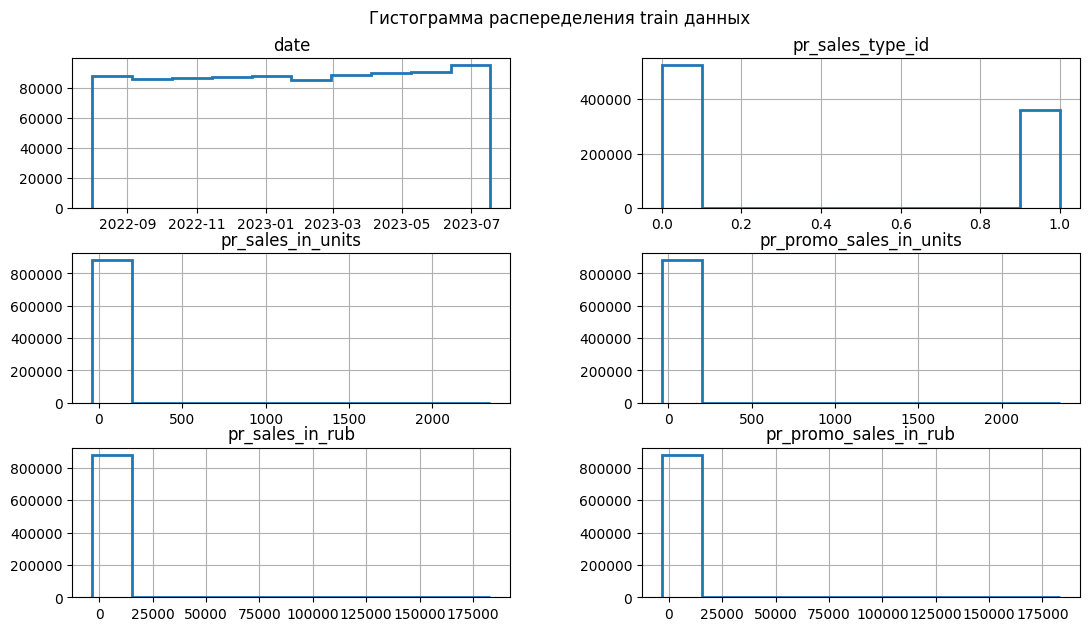

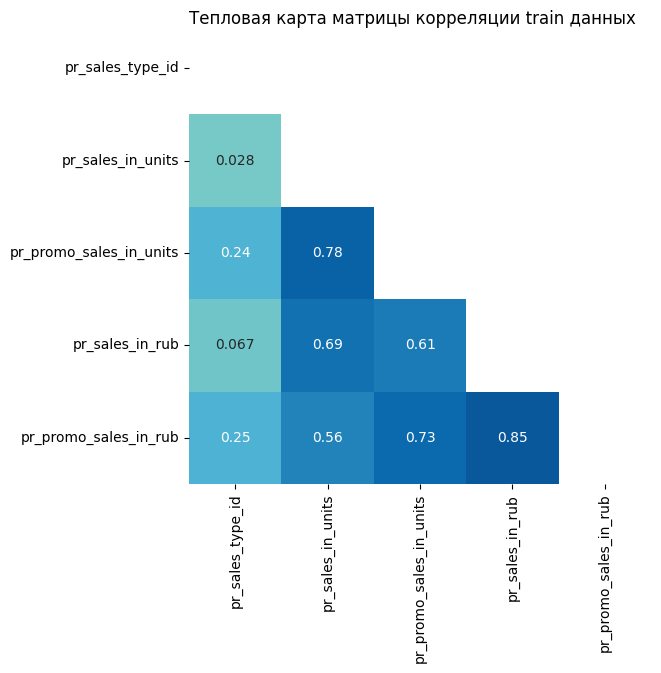

pr_sales_type_id  pr_sales_in_units  pr_promo_sales_in_units  \
count     883015.000000      883015.000000            883015.000000   
mean           0.406486           5.037956                 2.230010   
std            0.491178          13.402984                11.063288   
min            0.000000         -39.000000               -39.000000   
25%            0.000000           1.000000                 0.000000   
50%            0.000000           2.000000                 0.000000   
75%            1.000000           4.000000                 1.000000   
max            1.000000        2348.000000              2348.000000   

       pr_sales_in_rub  pr_promo_sales_in_rub  
count    883015.000000          883015.000000  
mean        596.705181             294.766561  
std        1577.366179            1402.764168  
min       -3373.000000           -3373.000000  
25%          98.000000               0.000000  
50%         224.000000               0.000000  
75%         540.000000             127.000000  
max      183265.000000          183265.000000

st_id                         pr_sku_id  \
0  c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   
1  42a0e188f5033bc65bf8d78622277c4e  68f441429e73dbd33b81f95da31576e9   
2  1ecfb463472ec9115b10c292ef8bc986  22988026fe85fde60d8bf777ab6bc3b4   
3  42a0e188f5033bc65bf8d78622277c4e  8e887cf8e64ab8e7173701a979476567   
4  16a5cdae362b8d27a1d8f8c7b78b4330  e6fc24ca846339d204b0b50e9f772484   

        date  pr_sales_type_id  pr_sales_in_units  pr_promo_sales_in_units  \
0 2022-10-20                 1                5.0                      5.0   
1 2023-01-29                 0                4.0                      0.0   
2 2023-03-02                 0                1.0                      0.0   
3 2023-04-05                 1                0.0                      0.0   
4 2023-02-17                 0                1.0                      0.0   

   pr_sales_in_rub  pr_promo_sales_in_rub  
0            825.0                  825.0  
1            196.0                    0.0  
2             78.0                    0.0  
3             69.0                   69.0  
4            161.0                    0.0

Размер данных:      (12, 7)
Количество явных дубликатов: 0
Наличие пропусков:           0
Пропущенные данные (в процентном соотношении):
st_id                0.0
st_city_id           0.0
st_division_code     0.0
st_type_format_id    0.0
st_type_loc_id       0.0
st_type_size_id      0.0
st_is_active         0.0
dtype: float64

Проверка структуры данных по магазинам:


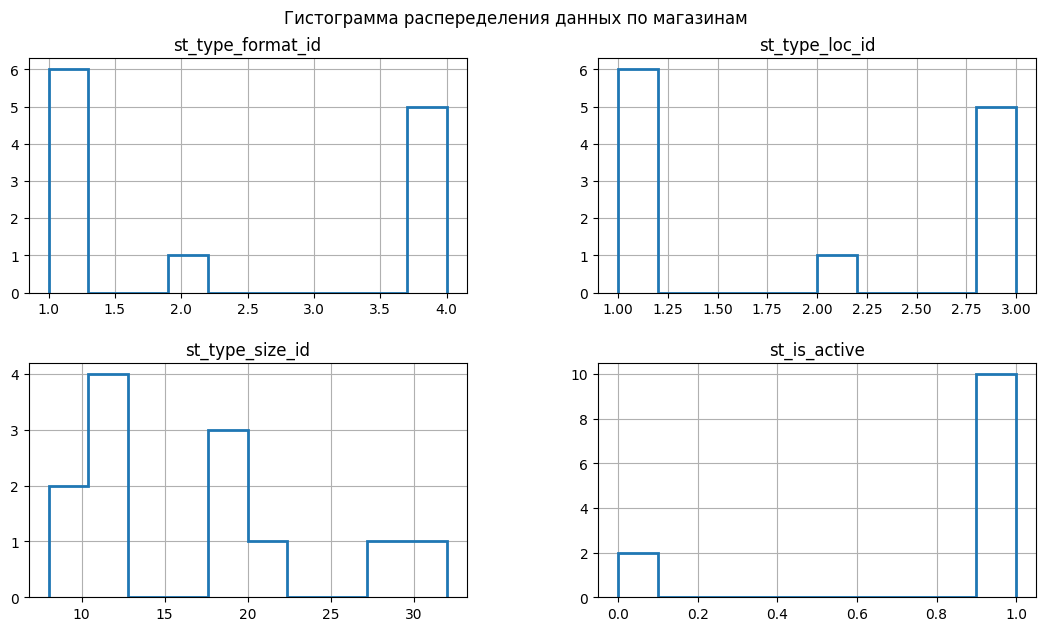

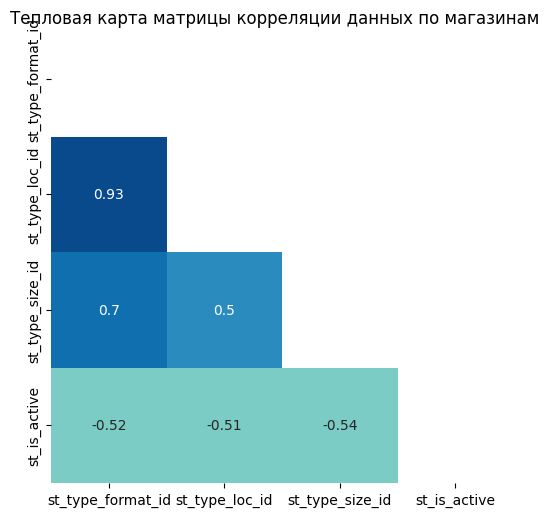

st_type_format_id  st_type_loc_id  st_type_size_id  st_is_active
count          12.000000       12.000000        12.000000     12.000000
mean            2.333333        1.916667        16.750000      0.833333
std             1.497473        0.996205         7.557356      0.389249
min             1.000000        1.000000         8.000000      0.000000
25%             1.000000        1.000000        12.000000      1.000000
50%             1.500000        1.500000        15.500000      1.000000
75%             4.000000        3.000000        19.250000      1.000000
max             4.000000        3.000000        32.000000      1.000000

st_id                        st_city_id  \
0  1aa057313c28fa4a40c5bc084b11d276  1587965fb4d4b5afe8428a4a024feb0d   
1  bd470ca955d9497bbcb808e59952fffc  955d864a62659945cc9434898e275deb   
2  6364d3f0f495b6ab9dcf8d3b5c6e0b01  b8b4b727d6f5d1b61fff7be687f7970f   
3  1ecfb463472ec9115b10c292ef8bc986  908c9a564a86426585b29f5335b619bc   
4  16a5cdae362b8d27a1d8f8c7b78b4330  c1f75cc0f7fe269dd0fd9bd5e24f9586   

                   st_division_code  st_type_format_id  st_type_loc_id  \
0  81b4dd343f5880df806d4c5d4a846c64                  4               3   
1  e26072c92d8fe0738df44d571d5f5e8b                  4               3   
2  da742b3cfca5388aaf9af28a726a3c30                  1               1   
3  429a86ff6336c144ddaf6144f52ab52c                  2               1   
4  296bd0cc6e735f9d7488ebc8fbc19130                  1               2   

   st_type_size_id  st_is_active  
0               19             0  
1               19             1  
2               12             1  
3               28             1  
4                8             1

In [8]:
research(data_train, 'train данных', figsize=(13, 7), silent=False)
research(data_st, 'данных по магазинам', figsize=(13, 7), silent=False)

In [9]:
research(data_pr, 'данных по товарной иерархии', figsize=((13, 7)), silent=True)
research(data_sample, 'sample датасет', figsize=((13, 7)), silent=True)

Размер данных:      (2050, 5)
Количество явных дубликатов: 0
Наличие пропусков:           0
Пропущенные данные (в процентном соотношении):
pr_sku_id       0.0
pr_group_id     0.0
pr_cat_id       0.0
pr_subcat_id    0.0
pr_uom_id       0.0
dtype: float64


pr_sku_id                       pr_group_id  \
0  fd064933250b0bfe4f926b867b0a5ec8  c74d97b01eae257e44aa9d5bade97baf   
1  71c9661741caf40a92a32d1cc8206c04  c74d97b01eae257e44aa9d5bade97baf   
2  00b72c2f01a1512cbb1d3f33319bac93  c74d97b01eae257e44aa9d5bade97baf   
3  9bc40cd2fe4f188f402bb41548c5e15c  c74d97b01eae257e44aa9d5bade97baf   
4  3a74a370c8eb032acb11ad9119242b8f  c74d97b01eae257e44aa9d5bade97baf   

                          pr_cat_id                      pr_subcat_id  \
0  1bc0249a6412ef49b07fe6f62e6dc8de  ca34f669ae367c87f0e75dcae0f61ee5   
1  c559da2ba967eb820766939a658022c8  e06f5ed77191826c212c30722f2cc5a2   
2  1bc0249a6412ef49b07fe6f62e6dc8de  d407a3ebb4ab9b0d68b224486f8b8dad   
3  1bc0249a6412ef49b07fe6f62e6dc8de  ca34f669ae367c87f0e75dcae0f61ee5   
4  c559da2ba967eb820766939a658022c8  e06f5ed77191826c212c30722f2cc5a2   

   pr_uom_id  
0         17  
1         17  
2         17  
3         17  
4         17

Размер данных:      (43694, 4)
Количество явных дубликатов: 0
Наличие пропусков:           0
Пропущенные данные (в процентном соотношении):
st_id        0.0
pr_sku_id    0.0
date         0.0
target       0.0
dtype: float64


st_id                         pr_sku_id  \
0  16a5cdae362b8d27a1d8f8c7b78b4330  0045ebdb1069ff4b3dd3efe628c39cd3   
1  16a5cdae362b8d27a1d8f8c7b78b4330  00661699f543753ec7e911a64b9fd2f6   
2  16a5cdae362b8d27a1d8f8c7b78b4330  0094042bfeae507dc7f62acc8e5ed03a   
3  16a5cdae362b8d27a1d8f8c7b78b4330  0169529ff660adcac9b7e354e0c4b882   
4  16a5cdae362b8d27a1d8f8c7b78b4330  01e4734745e97e52d3213449e1a05dd7   

        date  target  
0 2023-07-20       0  
1 2023-07-20       0  
2 2023-07-20       0  
3 2023-07-20       0  
4 2023-07-20       0

In [10]:
express_info(calendar, 'календарь')

Информация календарь:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   year     3653 non-null   int64         
 1   day      3653 non-null   int64         
 2   weekday  3653 non-null   int64         
 3   date     3653 non-null   datetime64[ns]
 4   calday   3653 non-null   int64         
 5   holiday  3653 non-null   int64         
 6   covid    3653 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 199.9 KB


year  day  weekday       date    calday  holiday  covid
0  2015    1        4 2015-01-01  20150101        1      0
1  2015    2        5 2015-02-01  20150102        1      0
2  2015    3        6 2015-03-01  20150103        1      0
3  2015    4        7 2015-04-01  20150104        1      0
4  2015    5        1 2015-05-01  20150105        1      0

### Предварительное изучение данных.

In [11]:
#в календарь праздников добавим `month`
calendar['month']=pd.DatetimeIndex(calendar['date']).month
calendar['month'] = pd.to_numeric(calendar['month'], errors='coerce')
calendar = calendar[['date','year', 'month', 'weekday', 'day', 'holiday',  'calday','covid']]
#удалим неинформативные признаки 'calday', 'covid'
calendar = calendar.drop(['calday', 'covid' ], axis=1)
express_info(calendar, 'календарь')

Информация календарь:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3653 non-null   datetime64[ns]
 1   year     3653 non-null   int64         
 2   month    3653 non-null   int64         
 3   weekday  3653 non-null   int64         
 4   day      3653 non-null   int64         
 5   holiday  3653 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 171.4 KB


date  year  month  weekday  day  holiday
0 2015-01-01  2015      1        4    1        1
1 2015-02-01  2015      2        5    2        1
2 2015-03-01  2015      3        6    3        1
3 2015-04-01  2015      4        7    4        1
4 2015-05-01  2015      5        1    5        1

In [12]:
print ('Начало временного ряда: ', data_train['date'].min())
print ('Конец временного ряда: ', data_train['date'].max())

Начало временного ряда:  2022-08-01 00:00:00
Конец временного ряда:  2023-07-18 00:00:00


####Выводы:
- пропусков и явных дубликатов в данных нет.
- тепловая карта показала, явную корреляцию в `pr_sales_in_units` и `pr_promo_sales_in_units`, `pr_sales_in_rub` и `pr_promo_sales_in_rub`, что логично, так как одни данные являются частью других (возможно при формировании признаков надо будет удалить один из столбцов в парах).
- Также проверка структуры данных по магазинам показала высокую корреляцию между форматом магазина и локацией. Видимо, от локации зависит тип магазина. Также формат магазина коррелирует с размером - тоже логично. Скорее всего при формировании признаков будем удалять формат магазина.
- Из анализа зависимости числовых явная линейная зависимость между количеством продаж и суммы продаж, что логично, также общих продаж от промопродаж, с большим количеством выбросов в 0 (надо будет более детально исследовать эту зависимость).
- Начало временного ряда:  2022-08-01
- Конец временного ряда:  2023-07-18

###   Предварительная подготовка данных. Отчистка от явно лишней информации.

In [13]:
data_merge = pd.merge(data_train, data_pr, on='pr_sku_id', how='left')
data_merge = pd.merge(data_merge, data_st, on='st_id', how='left')
data_merge.head(3)

st_id                         pr_sku_id  \
0  c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   
1  42a0e188f5033bc65bf8d78622277c4e  68f441429e73dbd33b81f95da31576e9   
2  1ecfb463472ec9115b10c292ef8bc986  22988026fe85fde60d8bf777ab6bc3b4   

        date  pr_sales_type_id  pr_sales_in_units  pr_promo_sales_in_units  \
0 2022-10-20                 1                5.0                      5.0   
1 2023-01-29                 0                4.0                      0.0   
2 2023-03-02                 0                1.0                      0.0   

   pr_sales_in_rub  pr_promo_sales_in_rub                       pr_group_id  \
0            825.0                  825.0  aab3238922bcc25a6f606eb525ffdc56   
1            196.0                    0.0  c74d97b01eae257e44aa9d5bade97baf   
2             78.0                    0.0  c74d97b01eae257e44aa9d5bade97baf   

                          pr_cat_id                      pr_subcat_id  \
0  28fc2782ea7ef51c1104ccf7b9bea13d  d29b5ce9c2883f0b7e90f79071a2ca82   
1  1bc0249a6412ef49b07fe6f62e6dc8de  68f204f3838bfee4ada868b66e6a0814   
2  f3173935ed8ac4bf073c1bcd63171f8a  5fd72b9fc7118bd36a137d7cea8c588a   

   pr_uom_id                        st_city_id  \
0          1  908c9a564a86426585b29f5335b619bc   
1         17  b8b4b727d6f5d1b61fff7be687f7970f   
2         17  908c9a564a86426585b29f5335b619bc   

                   st_division_code  st_type_format_id  st_type_loc_id  \
0  429a86ff6336c144ddaf6144f52ab52c                  1               1   
1  da742b3cfca5388aaf9af28a726a3c30                  1               1   
2  429a86ff6336c144ddaf6144f52ab52c                  2               1   

   st_type_size_id  st_is_active  
0                8             1  
1               12             1  
2               28             1

In [14]:
#Сохраним полученные данные
#calendar.to_csv('calendar.csv', index=False)

### Формирование общего датасета для дальнейшего исследование и предобработки.

In [15]:
# объеденим по общим столбцам
merged_df = pd.merge(data_train, data_pr, on='pr_sku_id', how='left')
merged_df = pd.merge(merged_df, data_st, on='st_id', how='left')
merged_df.head()

st_id                         pr_sku_id  \
0  c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   
1  42a0e188f5033bc65bf8d78622277c4e  68f441429e73dbd33b81f95da31576e9   
2  1ecfb463472ec9115b10c292ef8bc986  22988026fe85fde60d8bf777ab6bc3b4   
3  42a0e188f5033bc65bf8d78622277c4e  8e887cf8e64ab8e7173701a979476567   
4  16a5cdae362b8d27a1d8f8c7b78b4330  e6fc24ca846339d204b0b50e9f772484   

        date  pr_sales_type_id  pr_sales_in_units  pr_promo_sales_in_units  \
0 2022-10-20                 1                5.0                      5.0   
1 2023-01-29                 0                4.0                      0.0   
2 2023-03-02                 0                1.0                      0.0   
3 2023-04-05                 1                0.0                      0.0   
4 2023-02-17                 0                1.0                      0.0   

   pr_sales_in_rub  pr_promo_sales_in_rub                       pr_group_id  \
0            825.0                  825.0  aab3238922bcc25a6f606eb525ffdc56   
1            196.0                    0.0  c74d97b01eae257e44aa9d5bade97baf   
2             78.0                    0.0  c74d97b01eae257e44aa9d5bade97baf   
3             69.0                   69.0  aab3238922bcc25a6f606eb525ffdc56   
4            161.0                    0.0  c74d97b01eae257e44aa9d5bade97baf   

                          pr_cat_id                      pr_subcat_id  \
0  28fc2782ea7ef51c1104ccf7b9bea13d  d29b5ce9c2883f0b7e90f79071a2ca82   
1  1bc0249a6412ef49b07fe6f62e6dc8de  68f204f3838bfee4ada868b66e6a0814   
2  f3173935ed8ac4bf073c1bcd63171f8a  5fd72b9fc7118bd36a137d7cea8c588a   
3  28fc2782ea7ef51c1104ccf7b9bea13d  a13b7a6b8e80d44d044c257a08ecccca   
4  a368b0de8b91cfb3f91892fbf1ebd4b2  0d51481bbf77027ddb2c990cf97cd9dd   

   pr_uom_id                        st_city_id  \
0          1  908c9a564a86426585b29f5335b619bc   
1         17  b8b4b727d6f5d1b61fff7be687f7970f   
2         17  908c9a564a86426585b29f5335b619bc   
3          1  b8b4b727d6f5d1b61fff7be687f7970f   
4          1  c1f75cc0f7fe269dd0fd9bd5e24f9586   

                   st_division_code  st_type_format_id  st_type_loc_id  \
0  429a86ff6336c144ddaf6144f52ab52c                  1               1   
1  da742b3cfca5388aaf9af28a726a3c30                  1               1   
2  429a86ff6336c144ddaf6144f52ab52c                  2               1   
3  da742b3cfca5388aaf9af28a726a3c30                  1               1   
4  296bd0cc6e735f9d7488ebc8fbc19130                  1               2   

   st_type_size_id  st_is_active  
0                8             1  
1               12             1  
2               28             1  
3               12             1  
4                8             1

In [16]:
#Установим новые название колонок
merged_df.columns = ['store', 'sku', 'date', 'sales_type', 'sales_units',
       'sales_units_promo', 'sales_rub', 'sales_rub_promo',
       'group', 'category', 'subcategory', 'uom', 'city',
       'division', 'type_format', 'loc', 'size', 'is_active']

In [17]:
# сделаем дату индексом и переведем в объект datetime
merged_df.set_index('date', inplace=True)
#merged_df.index = pd.to_datetime(merged_df.index)

In [18]:
# сделаем дату индексом
calendar.set_index('date', inplace=True)
#calendar.index = pd.to_datetime(calendar.index)

In [19]:
# добавим календарь праздников к данным
data = pd.merge(calendar, merged_df, left_index=True, right_index=True)
data.head()

year  month  weekday  day  holiday  \
date                                             
2022-08-01  2022      8        6    8        1   
2022-08-01  2022      8        6    8        1   
2022-08-01  2022      8        6    8        1   
2022-08-01  2022      8        6    8        1   
2022-08-01  2022      8        6    8        1   

                                       store  \
date                                           
2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
2022-08-01  42a0e188f5033bc65bf8d78622277c4e   
2022-08-01  42a0e188f5033bc65bf8d78622277c4e   
2022-08-01  f7e6c85504ce6e82442c770f7c8606f0   

                                         sku  sales_type  sales_units  \
date                                                                    
2022-08-01  4ce0eb956648ab3ff6bb0afa3158cc42           1          0.0   
2022-08-01  a26de72f8ea9889b7332ed5f940d8b62           0         21.0   
2022-08-01  eb341a778d385ad6ebe16e90efb48c08           1          1.0   
2022-08-01  dce1f234d6424aa61f8e7ce0baffd9af           0          6.0   
2022-08-01  79122a5063b8a1261b8b1f03509ef957           1          1.0   

            sales_units_promo  ...                             group  \
date                           ...                                     
2022-08-01                0.0  ...  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01                0.0  ...  c74d97b01eae257e44aa9d5bade97baf   
2022-08-01                1.0  ...  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01                0.0  ...  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01                1.0  ...  c74d97b01eae257e44aa9d5bade97baf   

                                    category  \
date                                           
2022-08-01  9701a1c165dd9420816bfec5edd6c2b1   
2022-08-01  c559da2ba967eb820766939a658022c8   
2022-08-01  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-08-01  9701a1c165dd9420816bfec5edd6c2b1   
2022-08-01  c559da2ba967eb820766939a658022c8   

                                 subcategory uom  \
date                                               
2022-08-01  8afe22eeb3f3f68de994a3c60388858c   1   
2022-08-01  e06f5ed77191826c212c30722f2cc5a2  17   
2022-08-01  b3e70d072fc648f6934c288e44f5c35e   1   
2022-08-01  c01c475ac8d447730ece97d846cc4f25   1   
2022-08-01  89b0107c6d0aca5f15fa7a715f9e06e5   1   

                                        city  \
date                                           
2022-08-01  908c9a564a86426585b29f5335b619bc   
2022-08-01  908c9a564a86426585b29f5335b619bc   
2022-08-01  b8b4b727d6f5d1b61fff7be687f7970f   
2022-08-01  b8b4b727d6f5d1b61fff7be687f7970f   
2022-08-01  3202111cf90e7c816a472aaceb72b0df   

                                    division type_format loc  size  is_active  
date                                                                           
2022-08-01  429a86ff6336c144ddaf6144f52ab52c           1   1     8          1  
2022-08-01  429a86ff6336c144ddaf6144f52ab52c           1   1     8          1  
2022-08-01  da742b3cfca5388aaf9af28a726a3c30           1   1    12          1  
2022-08-01  da742b3cfca5388aaf9af28a726a3c30           1   1    12          1  
2022-08-01  32586311f16876abf92901085bd87b99           1   1    12          1  

[5 rows x 22 columns]

In [20]:
# изменим порядок столбцов на удобный
new_order = ['is_active', 'store', 'sku', 'sales_type', 'sales_units', 'sales_units_promo',
             'sales_rub', 'sales_rub_promo','group', 'category', 'subcategory', 'uom', 'division',
             'city', 'type_format', 'loc', 'size', 'year', 'month', 'day', 'weekday', 'holiday']
data = data[new_order]

In [21]:
express_info(data, 'по объедененному датасету')
#research(data, 'данных по объедененному датасету', figsize=(15, 10), silent=True)

Информация по объедененному датасету:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 883015 entries, 2022-08-01 to 2023-07-18
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   is_active          883015 non-null  int64  
 1   store              883015 non-null  object 
 2   sku                883015 non-null  object 
 3   sales_type         883015 non-null  int64  
 4   sales_units        883015 non-null  float64
 5   sales_units_promo  883015 non-null  float64
 6   sales_rub          883015 non-null  float64
 7   sales_rub_promo    883015 non-null  float64
 8   group              883015 non-null  object 
 9   category           883015 non-null  object 
 10  subcategory        883015 non-null  object 
 11  uom                883015 non-null  int64  
 12  division           883015 non-null  object 
 13  city               883015 non-null  object 
 14  type_format        883015 non-null  int64  
 1

is_active                             store  \
date                                                      
2022-08-01          1  c81e728d9d4c2f636f067f89cc14862c   
2022-08-01          1  c81e728d9d4c2f636f067f89cc14862c   
2022-08-01          1  42a0e188f5033bc65bf8d78622277c4e   
2022-08-01          1  42a0e188f5033bc65bf8d78622277c4e   
2022-08-01          1  f7e6c85504ce6e82442c770f7c8606f0   

                                         sku  sales_type  sales_units  \
date                                                                    
2022-08-01  4ce0eb956648ab3ff6bb0afa3158cc42           1          0.0   
2022-08-01  a26de72f8ea9889b7332ed5f940d8b62           0         21.0   
2022-08-01  eb341a778d385ad6ebe16e90efb48c08           1          1.0   
2022-08-01  dce1f234d6424aa61f8e7ce0baffd9af           0          6.0   
2022-08-01  79122a5063b8a1261b8b1f03509ef957           1          1.0   

            sales_units_promo  sales_rub  sales_rub_promo  \
date                                                        
2022-08-01                0.0       79.0             79.0   
2022-08-01                0.0      462.0              0.0   
2022-08-01                1.0      154.0            154.0   
2022-08-01                0.0      860.0              0.0   
2022-08-01                1.0       57.0             57.0   

                                       group  \
date                                           
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   

                                    category  ...  \
date                                          ...   
2022-08-01  9701a1c165dd9420816bfec5edd6c2b1  ...   
2022-08-01  c559da2ba967eb820766939a658022c8  ...   
2022-08-01  28fc2782ea7ef51c1104ccf7b9bea13d  ...   
2022-08-01  9701a1c165dd9420816bfec5edd6c2b1  ...   
2022-08-01  c559da2ba967eb820766939a658022c8  ...   

                                    division  \
date                                           
2022-08-01  429a86ff6336c144ddaf6144f52ab52c   
2022-08-01  429a86ff6336c144ddaf6144f52ab52c   
2022-08-01  da742b3cfca5388aaf9af28a726a3c30   
2022-08-01  da742b3cfca5388aaf9af28a726a3c30   
2022-08-01  32586311f16876abf92901085bd87b99   

                                        city type_format loc  size  year  \
date                                                                       
2022-08-01  908c9a564a86426585b29f5335b619bc           1   1     8  2022   
2022-08-01  908c9a564a86426585b29f5335b619bc           1   1     8  2022   
2022-08-01  b8b4b727d6f5d1b61fff7be687f7970f           1   1    12  2022   
2022-08-01  b8b4b727d6f5d1b61fff7be687f7970f           1   1    12  2022   
2022-08-01  3202111cf90e7c816a472aaceb72b0df           1   1    12  2022   

            month  day  weekday  holiday  
date                                      
2022-08-01      8    8        6        1  
2022-08-01      8    8        6        1  
2022-08-01      8    8        6        1  
2022-08-01      8    8        6        1  
2022-08-01      8    8        6        1  

[5 rows x 22 columns]

In [22]:
# наличие пропусков в индексе DataFrame
has_missing_index = data.index.isna().any()

if has_missing_index:
    print("В индексе есть пропущенные значения.")
else:
    print("Пропущенных значений в индексе нет.")

Пропущенных значений в индексе нет.


In [23]:
# проверим последовательность данных
print("Индекс монотонно возрастающий:", data.index.is_monotonic_increasing)

Индекс монотонно возрастающий: True


### Вывод:
- сразу подготовили данные таблицы к работе - добавили столбец с месяцем,удалили неинформативные признаки 'calday', 'covid' 'calday', 'covid'.
- объединили датасеты в один по дате.
- переименовали колонки:
```
['is_active', 'store', 'sku', 'sales_type', 'sales_units', 'sales_units_promo',
             'sales_rub', 'sales_rub_promo','group', 'category', 'subcategory', 'uom', 'division',
             'city', 'type_format', 'loc', 'size', 'year', 'month', 'day', 'weekday', 'holiday']
```

- проверили на монотонность и наличие пропущенных значений во временном ряду.

## 2. Исследовательский анализ:
    - Работа с аномалиями, пропусками и дубликатами.
    - формирования датасета для анализа.
    - Непосредственно анализ.

### **Активные магазины**
Определим активные магазины с которыми будем работать

In [24]:
#Напишем функцию
def plot_pie(data, title):
  graph = data.value_counts()\
  .plot.pie(legend=True,labeldistance=1.1, autopct='%1.2f%%', figsize=(5,5))
  plt.title(title)
  plt.show()

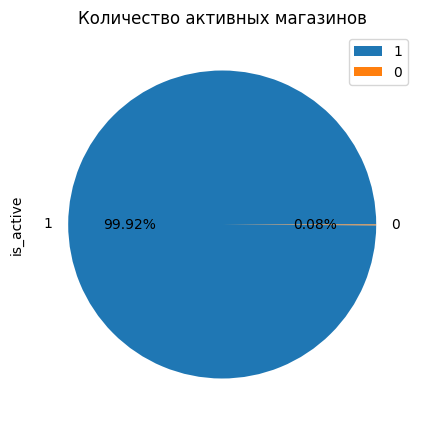

In [25]:
plot_pie(data['is_active'], 'Количество активных магазинов')
#1-активные, 0-неактивные

In [26]:
# список магазинов
list_store = data['store'].unique().tolist()

In [27]:
#Определим неактивные магазины
no_active_st_id = data[data['is_active'] != 1].groupby('store')['is_active'].sum()
no_active_st_id

store
1aa057313c28fa4a40c5bc084b11d276    0
62f91ce9b820a491ee78c108636db089    0
Name: is_active, dtype: int64

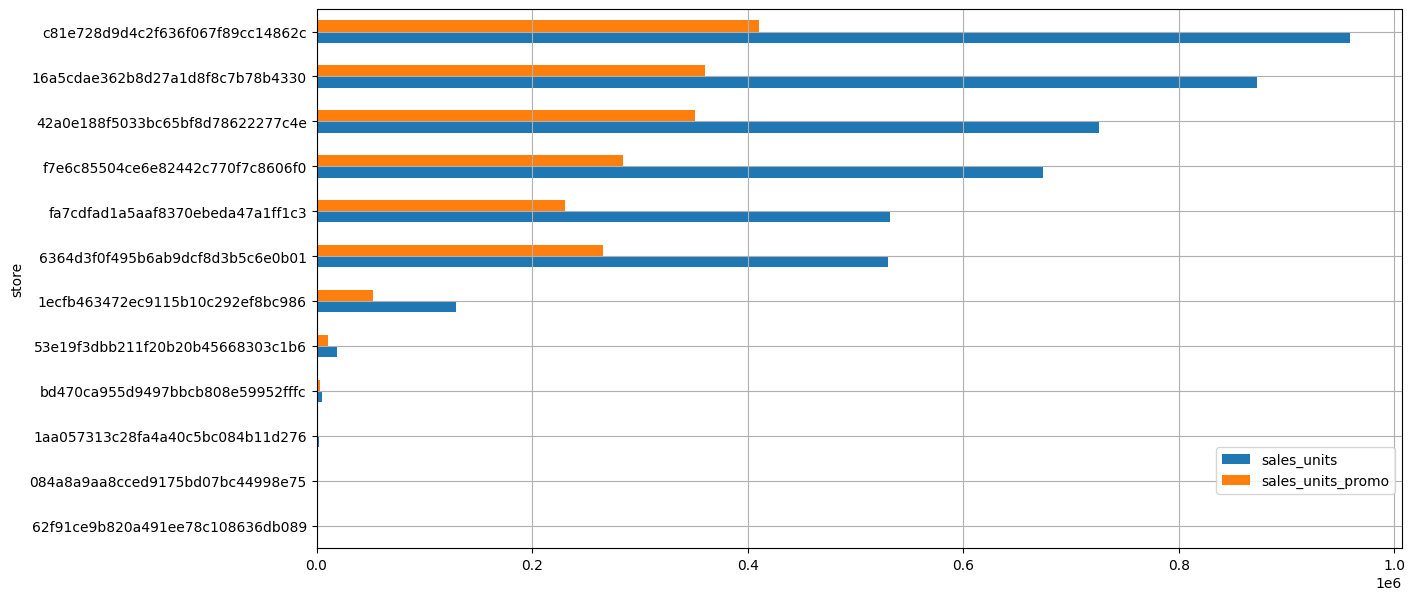

In [28]:
# продажи в магазинах
df_pivot = data.pivot_table(
    index=['store'], values=['sales_units', 'sales_units_promo'],
    aggfunc=sum).sort_values(by='sales_units', ascending=True)
# Визуализируем продажи в магазинах
ax = df_pivot.plot(kind='barh', grid=True, figsize=(14, 7))
ax.legend(loc='best', bbox_to_anchor=(1, 0.2));

In [29]:
# список для хранения данных о магазинах и их количестве дней работы
activ_store_data = []
store_data = []

for st in list_store:
    min_date = data.loc[data['store'] == st].index.min().date()
    max_date = data.loc[data['store'] == st].index.max().date()
    delta = max_date - min_date
    days = delta.days
    if days > 180:
        activ_store_data.append({'stores': st, 'days_worked': days})
    else:
        store_data.append({'stores': st, 'days_worked': days})

# сотируем магазины по количеству дней работы
a_sorted_stores= sorted(activ_store_data, key=lambda x: x['days_worked'], reverse=True)
sorted_stores = sorted(store_data, key=lambda x: x['days_worked'], reverse=True)

# сортируем магазины по дням работы
for store_info in sorted_stores:
    store = store_info['stores']
    days = store_info['days_worked']
    print("Магазин:", store, 'работал', days, 'дней')
    print("-" * 60)
print("=" * 60)
for store_info in a_sorted_stores:
    store = store_info['stores']
    days = store_info['days_worked']
    print("Магазин:", store, 'работал', days, 'дней')
    print("-" * 60)

Магазин: 084a8a9aa8cced9175bd07bc44998e75 работал 95 дней
------------------------------------------------------------
Магазин: 1aa057313c28fa4a40c5bc084b11d276 работал 30 дней
------------------------------------------------------------
Магазин: 62f91ce9b820a491ee78c108636db089 работал 15 дней
------------------------------------------------------------
Магазин: c81e728d9d4c2f636f067f89cc14862c работал 351 дней
------------------------------------------------------------
Магазин: 42a0e188f5033bc65bf8d78622277c4e работал 351 дней
------------------------------------------------------------
Магазин: f7e6c85504ce6e82442c770f7c8606f0 работал 351 дней
------------------------------------------------------------
Магазин: 6364d3f0f495b6ab9dcf8d3b5c6e0b01 работал 351 дней
------------------------------------------------------------
Магазин: 16a5cdae362b8d27a1d8f8c7b78b4330 работал 351 дней
------------------------------------------------------------
Магазин: fa7cdfad1a5aaf8370ebeda47a1ff1c3 р

#### Удалим магазины с малой активностью

In [30]:
# получим список идентификаторов магазинов из списка store_data
store_ids = [entry['stores'] for entry in store_data]

# cоздаем маску для строк на удаления
mask = data['store'].isin(store_ids)

In [31]:
activ_store = data[~data['store'].isin(store_ids)]

In [32]:
# удалим столбцец 'is_active'
activ_store = activ_store.drop('is_active', axis=1)

In [33]:
print('Исходные данные:' , len(data))
print('Очищенные данные:', len(activ_store))
print(f'Удалено {((len(data) - len(activ_store))/(len(data))):.2%} от исходных данных')

Исходные данные: 883015
Очищенные данные: 882248
Удалено 0.09% от исходных данных


#### Вывод:
- Проанализировали магазины на активность.
- Магазин, в котором наблюдаются наибольшие продажи `'c81e728d9d4c2f636f067f89cc14862c'` - в дальнейшем на нем будем тестировать модель.
- Выявили неактивные магазины и удалили их - их оказалось 3 шт;
- Адалили столбец 'st_is_active', так как теперь он неинформанивнен.

### **Исследуем признаки**
> напишем функцию исследования признаков

In [34]:
#напишем функцию для изучения данных в столбцах
def feed_size(data, state, name_state): #x_lim0,,  x_lim
    print(f'Статистические данные о распределении значений {name_state} ({state}):')
    display(data[f'{state}'].describe())

    plt.subplots(figsize=(12, 1))
    #plt.xlim([0,x_lim])#x_lim0,
    plt.title(f'Диаграмма рассеяния {name_state} ({state})')
    sns.boxplot(x=data[f'{state}'], palette='pastel', data=data[f'{state}'])
    plt.show()

    plt.figure(figsize=(12, 2))
    #sns.kdeplot(data[f'{state}'], fill=True, label=f'{state} {name_state}', alpha=0.6, shade=True)
    sns.histplot(data[f'{state}'], bins=150, color="seagreen", label=f'{name_state}', alpha=0.7, kde=True)
    #sns.distplot(data[f'{state}'], color="seagreen", label=f'{name_state}', fit=norm);
    #plt.xlim([0,x_lim]) #x_lim0,
    plt.xlabel(f'{state}')
    plt.ylabel(f'Распределение вероятности \nнепрерывной величины', fontsize=10)
    plt.legend(loc='upper right')
    plt.title(f'Гистограмма распределения {name_state} ({state})', fontsize=12)
    #fig = plt.figure()
    #res = stats.probplot(data[f'{state}'], plot=plt)
    plt.show()

#Функцияпо по построению гистограммы и функции нормального распределения
def graph(data, name):
    sns.distplot(data[name], fit=norm);
    #plt.xlim([0,55000])
    fig = plt.figure()
    plt.show()
    #проверим на нормальность
    res = stats.probplot(data[name], plot=plt)
    #Посчитаем Ассиметрию и Эксцесс
    print("Ассиметрия:%f" % data[name].skew())
    print("Эксцесс: %f" % data[name].kurt())
    print("Среднее : %f" % data[name].mean())
    print("Отклонение  %f" % data[name].var())

#### **Целевой признак - `pr_sales_in_units`**

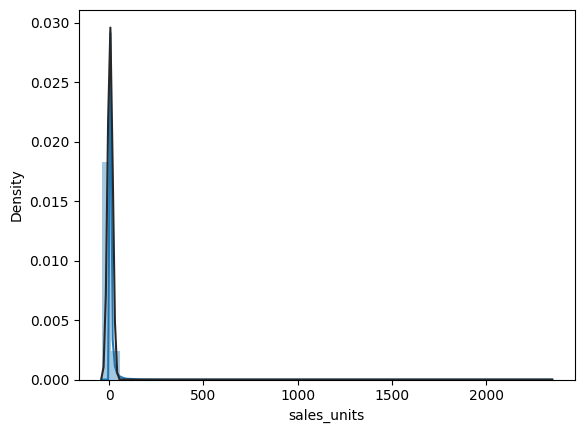

<Figure size 640x480 with 0 Axes>

Ассиметрия:31.566278
Эксцесс: 2882.753565
Среднее : 5.039692
Отклонение  179.788712


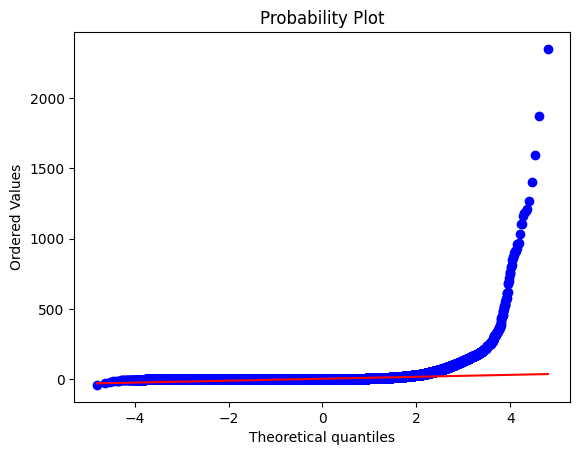

In [35]:
#graph(data)
graph(activ_store, 'sales_units')

Статистические данные о распределении значений общие продажи (sales_units):


count    882248.000000
mean          5.039692
std          13.408531
min         -39.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        2348.000000
Name: sales_units, dtype: float64

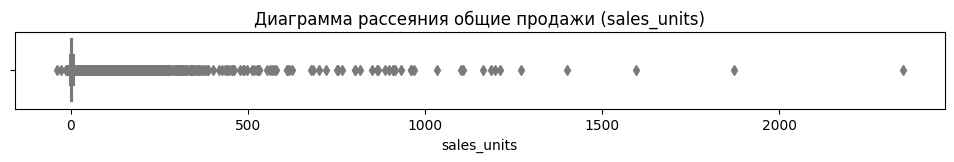

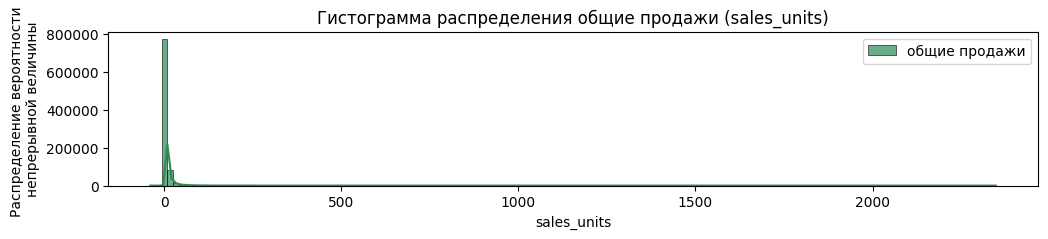

In [36]:
feed_size(activ_store, 'sales_units', 'общие продажи')#, 2000

#### Удалим отрицательные значения

In [37]:
#activ_store[activ_store['sales_in_units'] < 0] #.value_counts('pr_sales_in_units').sum() #count()

In [38]:
mask_negativ = ((activ_store['sales_units'] < 0) | (activ_store['sales_units_promo'] < 0) | (activ_store['sales_rub'] < 0)\
                | (activ_store['sales_rub_promo'] < 0))
# удаляем строки, соответствующие маске, из activ_store
activ_store = activ_store[~mask_negativ]

In [39]:
print('Исходные данные:' , len(data))
print('Очищенные данные:', len(activ_store))
print(f'Удалено {((len(data) - len(activ_store))/(len(data))):.2%} от исходных данных')

Исходные данные: 883015
Очищенные данные: 882169
Удалено 0.10% от исходных данных


#### **Нулевые значения в целевом признаке**

In [40]:
# строки с нулевым значением в столбце число проданных товаров
null_pr_sales_in_units = activ_store[activ_store['sales_units'] == 0]
null_pr_sales_in_units

store  \
date                                           
2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
2022-08-01  42a0e188f5033bc65bf8d78622277c4e   
2022-08-01  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
...                                      ...   
2023-07-18  f7e6c85504ce6e82442c770f7c8606f0   
2023-07-18  42a0e188f5033bc65bf8d78622277c4e   
2023-07-18  f7e6c85504ce6e82442c770f7c8606f0   
2023-07-18  42a0e188f5033bc65bf8d78622277c4e   
2023-07-18  c81e728d9d4c2f636f067f89cc14862c   

                                         sku  sales_type  sales_units  \
date                                                                    
2022-08-01  4ce0eb956648ab3ff6bb0afa3158cc42           1          0.0   
2022-08-01  a08abd96f9e056ad8cf9db4ae5f5754a           0          0.0   
2022-08-01  f5a455e5fea834c85429331d934c40fa           0          0.0   
2022-08-01  0f6ef309087f70a6f933eb0ec50745b4           1          0.0   
2022-08-01  fd123209467a1e417afbf89f3b7525a5           0          0.0   
...                                      ...         ...          ...   
2023-07-18  a4680e47cdf0ef37aeb19717a9d1968c           0          0.0   
2023-07-18  6bebdb943dc661b7af1e9469a8caeb3f           0          0.0   
2023-07-18  f26a7266746690b16a77b3073651d75d           1          0.0   
2023-07-18  4cae0c39b837072ea25f1c1545de0018           0          0.0   
2023-07-18  dce1f234d6424aa61f8e7ce0baffd9af           1          0.0   

            sales_units_promo  sales_rub  sales_rub_promo  \
date                                                        
2022-08-01                0.0       79.0             79.0   
2022-08-01                0.0       29.0              0.0   
2022-08-01                0.0       68.0              0.0   
2022-08-01                0.0       84.0             84.0   
2022-08-01                0.0       84.0              0.0   
...                       ...        ...              ...   
2023-07-18                0.0      112.0              0.0   
2023-07-18                0.0       40.0              0.0   
2023-07-18                0.0      106.0            106.0   
2023-07-18                0.0       28.0              0.0   
2023-07-18                0.0       43.0             43.0   

                                       group  \
date                                           
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01  6512bd43d9caa6e02c990b0a82652dca   
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01  6512bd43d9caa6e02c990b0a82652dca   
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   
...                                      ...   
2023-07-18  aab3238922bcc25a6f606eb525ffdc56   
2023-07-18  c74d97b01eae257e44aa9d5bade97baf   
2023-07-18  aab3238922bcc25a6f606eb525ffdc56   
2023-07-18  c74d97b01eae257e44aa9d5bade97baf   
2023-07-18  aab3238922bcc25a6f606eb525ffdc56   

                                    category  \
date                                           
2022-08-01  9701a1c165dd9420816bfec5edd6c2b1   
2022-08-01  b59c67bf196a4758191e42f76670ceba   
2022-08-01  46771d1f432b42343f56f791422a4991   
2022-08-01  e58cc5ca94270acaceed13bc82dfedf7   
2022-08-01  f3173935ed8ac4bf073c1bcd63171f8a   
...                                      ...   
2023-07-18  9701a1c165dd9420816bfec5edd6c2b1   
2023-07-18  a368b0de8b91cfb3f91892fbf1ebd4b2   
2023-07-18  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-07-18  1bc0249a6412ef49b07fe6f62e6dc8de   
2023-07-18  9701a1c165dd9420816bfec5edd6c2b1   

                                 subcategory  ...  \
date                                          ...   
2022-08-01  8afe22eeb3f3f68de994a3c60388858c  ...   
2022-08-01  11fb95ff05cc28bb107e4a920c60b6cf  ...   
2022-08-01  38cc804f2e8d4b18785b84c68517eadf  ...   
2022-08-01  c0a667df8f0d6ee98dda972b0870fabf  ...   
2022-08-01  271bfd185d8c11ed902a1c87e43f2eb7  ...   
...                                      ...  ...

In [41]:
# строки с нулевым значением в столбце число проданных товаров
null_pr_sales_in_rub = activ_store[activ_store['sales_rub'] == 0]
null_pr_sales_in_rub

store  \
date                                           
2022-08-01  f7e6c85504ce6e82442c770f7c8606f0   
2022-08-02  6364d3f0f495b6ab9dcf8d3b5c6e0b01   
2022-08-03  f7e6c85504ce6e82442c770f7c8606f0   
2022-08-03  c81e728d9d4c2f636f067f89cc14862c   
2022-08-05  1ecfb463472ec9115b10c292ef8bc986   
...                                      ...   
2023-07-16  1ecfb463472ec9115b10c292ef8bc986   
2023-07-16  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2023-07-16  1ecfb463472ec9115b10c292ef8bc986   
2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2023-07-18  1ecfb463472ec9115b10c292ef8bc986   

                                         sku  sales_type  sales_units  \
date                                                                    
2022-08-01  568221292bd68ebdd821521ce60a8110           0          0.0   
2022-08-02  a70a600d7c593ca50cc6639cd64ed71a           0          0.0   
2022-08-03  93deb104b43143bfe41a3e74e303f6de           1          1.0   
2022-08-03  b5f95dc9fce7c3181497a01d26836700           0          0.0   
2022-08-05  a5ca6d3e4b6bae0610473f4383fc8881           1          2.0   
...                                      ...         ...          ...   
2023-07-16  a8523ad41b5e8d48531cd6aeef1a9edd           0          0.0   
2023-07-16  22988026fe85fde60d8bf777ab6bc3b4           1          1.0   
2023-07-16  d1be4d17aa2698e849ee276a30ed1ad1           0          0.0   
2023-07-18  01e4734745e97e52d3213449e1a05dd7           1          1.0   
2023-07-18  1cfd4c9cd7289a63dc2492f2b0200868           1          1.0   

            sales_units_promo  sales_rub  sales_rub_promo  \
date                                                        
2022-08-01                0.0        0.0              0.0   
2022-08-02                0.0        0.0              0.0   
2022-08-03                1.0        0.0              0.0   
2022-08-03                0.0        0.0              0.0   
2022-08-05                2.0        0.0              0.0   
...                       ...        ...              ...   
2023-07-16                0.0        0.0              0.0   
2023-07-16                1.0        0.0              0.0   
2023-07-16                0.0        0.0              0.0   
2023-07-18                1.0        0.0              0.0   
2023-07-18                1.0        0.0              0.0   

                                       group  \
date                                           
2022-08-01  6512bd43d9caa6e02c990b0a82652dca   
2022-08-02  c51ce410c124a10e0db5e4b97fc2af39   
2022-08-03  c74d97b01eae257e44aa9d5bade97baf   
2022-08-03  c74d97b01eae257e44aa9d5bade97baf   
2022-08-05  aab3238922bcc25a6f606eb525ffdc56   
...                                      ...   
2023-07-16  aab3238922bcc25a6f606eb525ffdc56   
2023-07-16  c74d97b01eae257e44aa9d5bade97baf   
2023-07-16  aab3238922bcc25a6f606eb525ffdc56   
2023-07-18  aab3238922bcc25a6f606eb525ffdc56   
2023-07-18  c74d97b01eae257e44aa9d5bade97baf   

                                    category  \
date                                           
2022-08-01  c9f95a0a5af052bffce5c89917335f67   
2022-08-02  2df45244f09369e16ea3f9117ca45157   
2022-08-03  1bc0249a6412ef49b07fe6f62e6dc8de   
2022-08-03  f3173935ed8ac4bf073c1bcd63171f8a   
2022-08-05  28fc2782ea7ef51c1104ccf7b9bea13d   
...                                      ...   
2023-07-16  46771d1f432b42343f56f791422a4991   
2023-07-16  f3173935ed8ac4bf073c1bcd63171f8a   
2023-07-16  46771d1f432b42343f56f791422a4991   
2023-07-18  3de2334a314a7a72721f1f74a6cb4cee   
2023-07-18  1bc0249a6412ef49b07fe6f62e6dc8de   

                                 subcategory  ...  \
date                                          ...   
2022-08-01  ae67c7640ebb8ead39d9f7a7594ca8f9  ...   
2022-08-02  a6b626d2738e74999cc3fdbdddfdb49f  ...   
2022-08-03  d407a3ebb4ab9b0d68b224486f8b8dad  ...   
2022-08-03  bf7098fa7a7f267d4cd5a90f4b2cd8fa  ...   
2022-08-05  a13b7a6b8e80d44d044c257a08ecccca  ...   
...                                      ...  ...

#### Заполним нули в столбце sales_units

In [42]:
# меням 0 на пропуски
activ_store['sales_units'] = activ_store['sales_units'].replace(0, np.nan)
# заменим пропуски на значение
activ_store['sales_units'] = activ_store['sales_units'].fillna(method='ffill')

In [43]:
# первую стороку заполним средним значением
activ_store['sales_units'] = activ_store['sales_units'].fillna(activ_store['sales_units'].mean())

# приведем к целым значениям
activ_store['sales_units'] = activ_store['sales_units'].astype(int)
activ_store['sales_units_promo'] = activ_store['sales_units_promo'].astype(int)

#### Заполним нули в столбце pr_sales_in_rub

In [44]:
# меням 0 на пропуски
activ_store['sales_rub'] = activ_store['sales_rub'].replace(0, np.nan)
# заменим пропуски на значение
activ_store['sales_rub'] = activ_store['sales_rub'].fillna(method='ffill')

In [45]:
# первую стороку заполним средним значением
activ_store['sales_rub'] = activ_store['sales_rub'].fillna(activ_store['sales_rub'].mean())

In [46]:
# Проверим количество нулей в целевом признаке
activ_store[activ_store['sales_units'] == 0].value_counts('sales_units').sum()

0

In [47]:
activ_store.reset_index()

date                             store  \
0      2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
1      2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
2      2022-08-01  42a0e188f5033bc65bf8d78622277c4e   
3      2022-08-01  42a0e188f5033bc65bf8d78622277c4e   
4      2022-08-01  f7e6c85504ce6e82442c770f7c8606f0   
...           ...                               ...   
882164 2023-07-18  1ecfb463472ec9115b10c292ef8bc986   
882165 2023-07-18  6364d3f0f495b6ab9dcf8d3b5c6e0b01   
882166 2023-07-18  42a0e188f5033bc65bf8d78622277c4e   
882167 2023-07-18  c81e728d9d4c2f636f067f89cc14862c   
882168 2023-07-18  6364d3f0f495b6ab9dcf8d3b5c6e0b01   

                                     sku  sales_type  sales_units  \
0       4ce0eb956648ab3ff6bb0afa3158cc42           1            5   
1       a26de72f8ea9889b7332ed5f940d8b62           0           21   
2       eb341a778d385ad6ebe16e90efb48c08           1            1   
3       dce1f234d6424aa61f8e7ce0baffd9af           0            6   
4       79122a5063b8a1261b8b1f03509ef957           1            1   
...                                  ...         ...          ...   
882164  382fcb7b0b5750896a5bef348f19bddc           1            7   
882165  b6871caaf03565202e4c3bafef2af7c6           1            1   
882166  a7a9eb3ffb9634e37c50995c34da34d0           0            2   
882167  ced0c1a84924c982a6403870c54b99ca           0           11   
882168  083e7f594409e946662187b13b13868a           0            1   

        sales_units_promo  sales_rub  sales_rub_promo  \
0                       0       79.0             79.0   
1                       0      462.0              0.0   
2                       1      154.0            154.0   
3                       0      860.0              0.0   
4                       1       57.0             57.0   
...                   ...        ...              ...   
882164                  7      198.0            198.0   
882165                  1      100.0            100.0   
882166                  0       83.0              0.0   
882167                  0      401.0              0.0   
882168                  0       29.0              0.0   

                                   group                          category  \
0       aab3238922bcc25a6f606eb525ffdc56  9701a1c165dd9420816bfec5edd6c2b1   
1       c74d97b01eae257e44aa9d5bade97baf  c559da2ba967eb820766939a658022c8   
2       aab3238922bcc25a6f606eb525ffdc56  28fc2782ea7ef51c1104ccf7b9bea13d   
3       aab3238922bcc25a6f606eb525ffdc56  9701a1c165dd9420816bfec5edd6c2b1   
4       c74d97b01eae257e44aa9d5bade97baf  c559da2ba967eb820766939a658022c8   
...                                  ...                               ...   
882164  c74d97b01eae257e44aa9d5bade97baf  1bc0249a6412ef49b07fe6f62e6dc8de   
882165  c74d97b01eae257e44aa9d5bade97baf  f3173935ed8ac4bf073c1bcd63171f8a   
882166  c74d97b01eae257e44aa9d5bade97baf  1bc0249a6412ef49b07fe6f62e6dc8de   
882167  c74d97b01eae257e44aa9d5bade97baf  c559da2ba967eb820766939a658022c8   
882168  c74d97b01eae257e44aa9d5bade97baf  c559da2ba967eb820766939a658022c8   

        ...                          division  \
0       ...  429a86ff6336c144ddaf6144f52ab52c   
1       ...  429a86ff6336c144ddaf6144f52ab52c   
2       ...  da742b3cfca5388aaf9af28a726a3c30   
3       ...  da742b3cfca5388aaf9af28a726a3c30   
4       ...  32586311f16876abf92901085bd87b99   
...     ...                               ...   
882164  ...  429a86ff6336c144ddaf6144f52ab52c   
882165  ...  da742b3cfca5388aaf9af28a726a3c30   
882166  ...  da742b3cfca5388aaf9af28a726a3c30   
882167  ...  429a86ff6336c144ddaf6144f52ab52c   
882168  ...  da742b3cfca5388aaf9af28a726a3c30   

                                    city type_format loc  size  year  month  \
0       908c9a564a86426585b29f5335b619bc           1   1     8  2022      8   
1       908c9a564a86426585b29f5335b619bc           1   1     8  2022      8   
2       b8b4b727d6f5d1b61fff7be687f7970f           1   1    12  2022      8

**Вывод:**
- Распределение целевых значений отличается от нормального.
- Имеет заметную положительную асимметрию.
- Является остроконечным.
- наблюдаются отрицательные значения - мы не можем определить причину, поэтому удаляем их.
- Проверили на нулевые значения в столбце целевого признака - заполнили нули значениями из строк ниже.

### **Исследуем дополнительные признаки**

Исследуем признаки `sales_units_promo`, `sales_type`, `date` и `sales_rub_promo`.
- `date` – дата;
- `sales_type` – флаг наличия промо;
- `sales_rub` – общие продажи товаров в руб;
- ``sales_units_promo`` – число проданных товаров с признаком промо;
- `sales_rub_promo` – продажи с признаком промо в руб;

#### Отношения с непрерывными признаками

In [48]:
#напишем функцию scatter plot
#var=[]
def scatter_plot(data, var_target, var):
    data = pd.concat([data[var_target], data[var]], axis=1)
    data.plot.scatter(x=var, y=var_target); #, xlim=(0,25000), ylim=(0,175000)

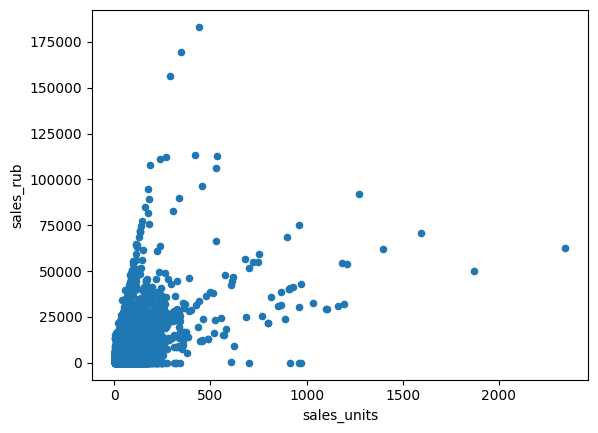

In [49]:
#scatter plot 'sales_units'/'sales_rub'
scatter_plot(activ_store, 'sales_rub', 'sales_units')

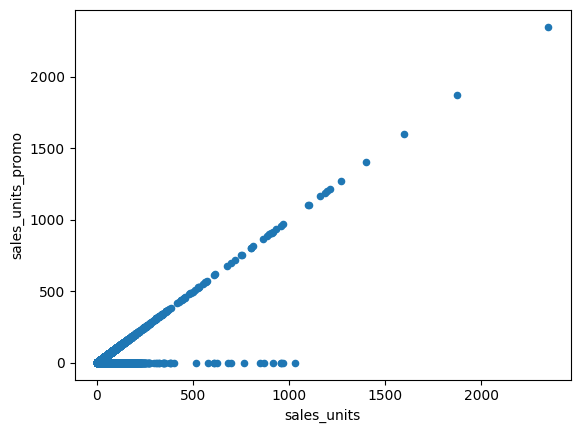

In [50]:
#scatter plot sales_units_promo/'sales_units'
scatter_plot(activ_store, 'sales_units_promo', 'sales_units')

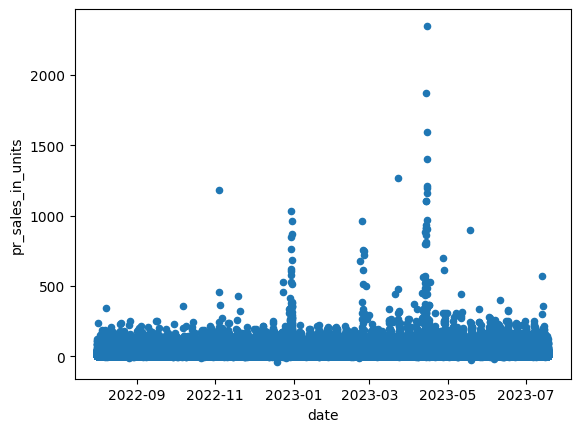

In [51]:
#scatter pr_sales_in_units/date
scatter_plot(data_train, 'pr_sales_in_units', 'date')

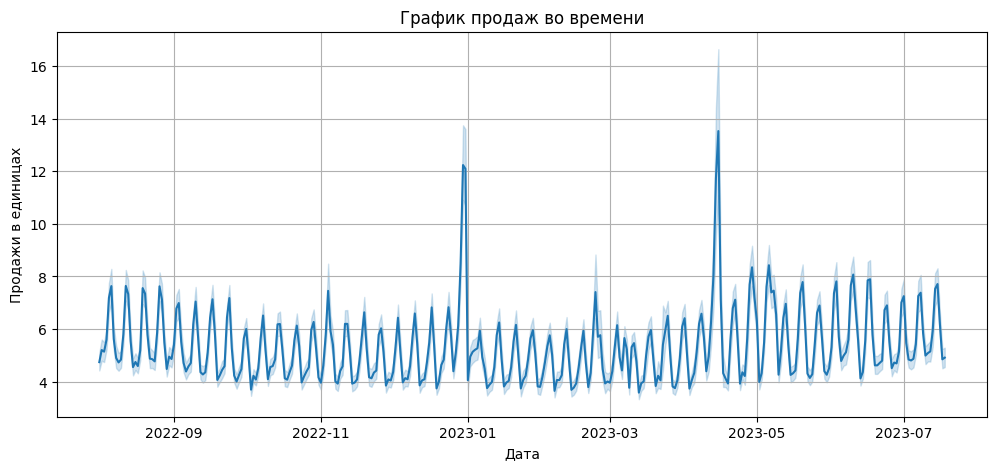

In [52]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=activ_store, x=activ_store.index, y="sales_units")
#sns.lineplot(data=activ_store, x=activ_store.index, y="pr_sales_in_units_log")
plt.xlabel("Дата")
plt.ylabel("Продажи в единицах")
plt.title("График продаж во времени")
plt.grid(True)
plt.show()

### **Анализ временных рядов**

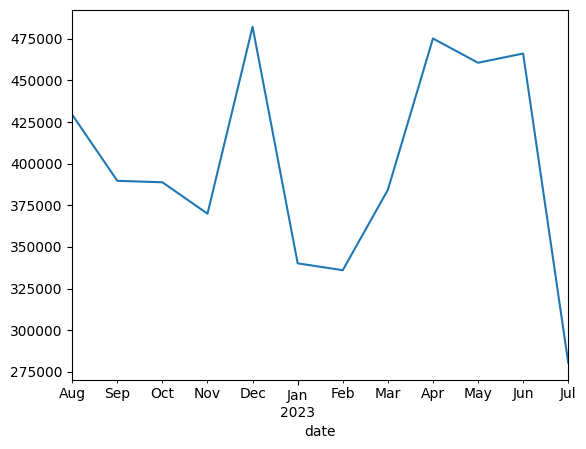

In [53]:
activ_store_m = activ_store['sales_units'].resample('1M').sum()
#activ_store_ml = activ_store['pr_sales_in_units_log'].resample('1M').sum() #.mean()
#activ_store_ml.plot()
activ_store_m.plot();

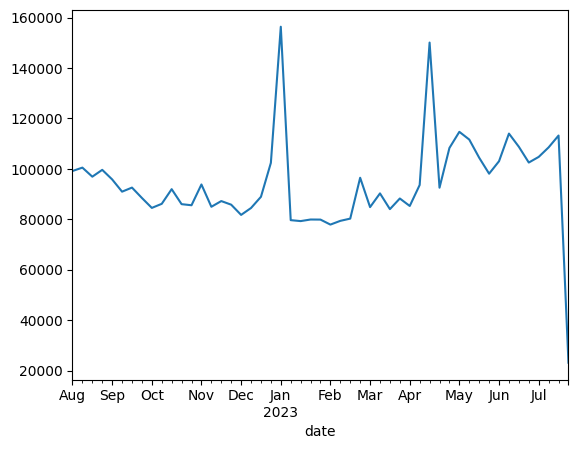

In [54]:
data_w = activ_store['sales_units'].resample('1W').sum()
#data_wl = activ_store['pr_sales_in_units_log'].resample('1W').sum()
#data_w1.plot()
data_w.plot();

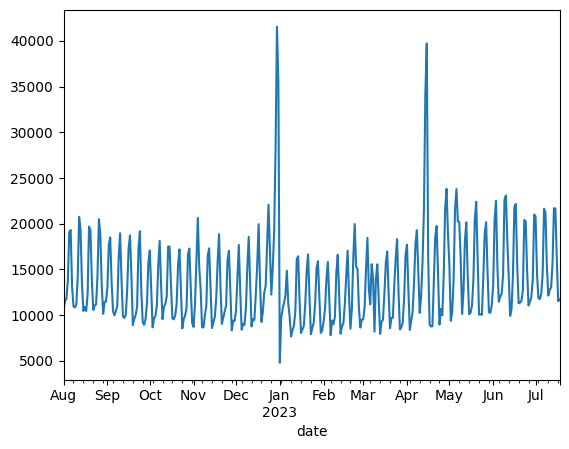

In [55]:
#activ_store['pr_sales_in_units_res'] = activ_store['pr_sales_in_units'].resample('1D').sum()
#activ_store['pr_sales_in_units_lres'] = activ_store['pr_sales_in_units_log'].resample('1D').sum()
#activ_store['pr_sales_in_units_lres'].plot()
data_d = activ_store['sales_units'].resample('1D').sum()
data_d.plot();

#### Посмотрим поведение ресемплированных данных за разные пероды времени

In [56]:
def res_graph (data, name, period):
    figsize = (15,4)
    data.plot(figsize=figsize)
    plt.title(f'{name} за {period}')
    plt.xlabel(f'{period}')
    plt.ylabel('Кол-во заказов')
    plt.show()

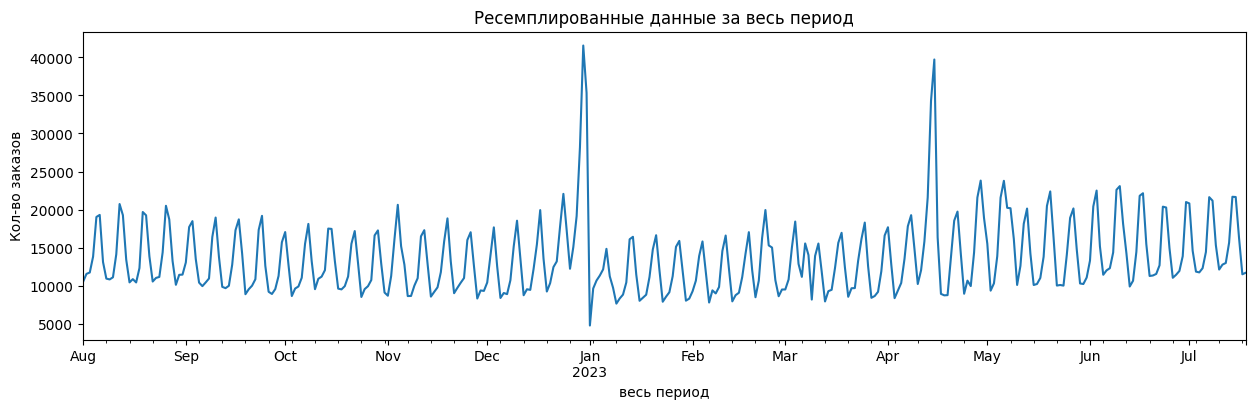

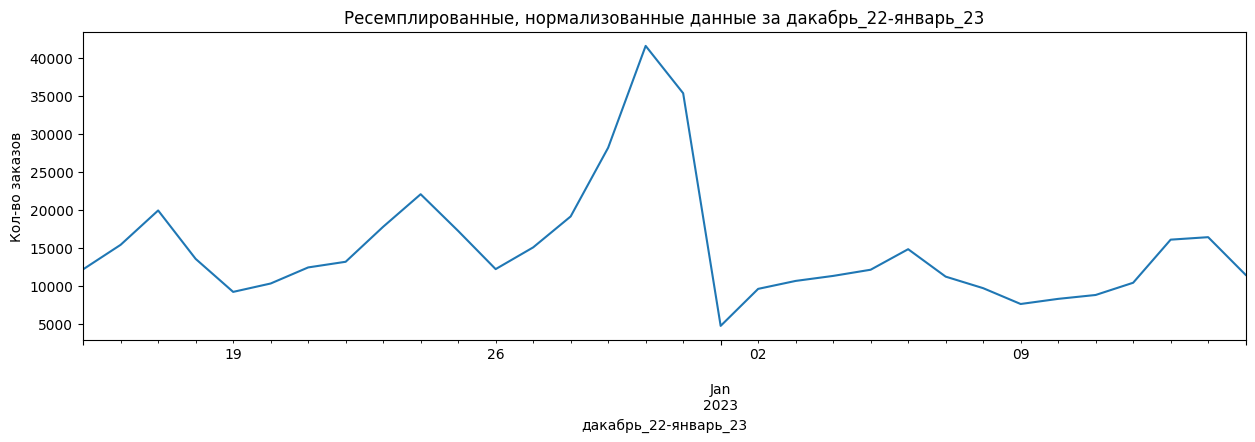

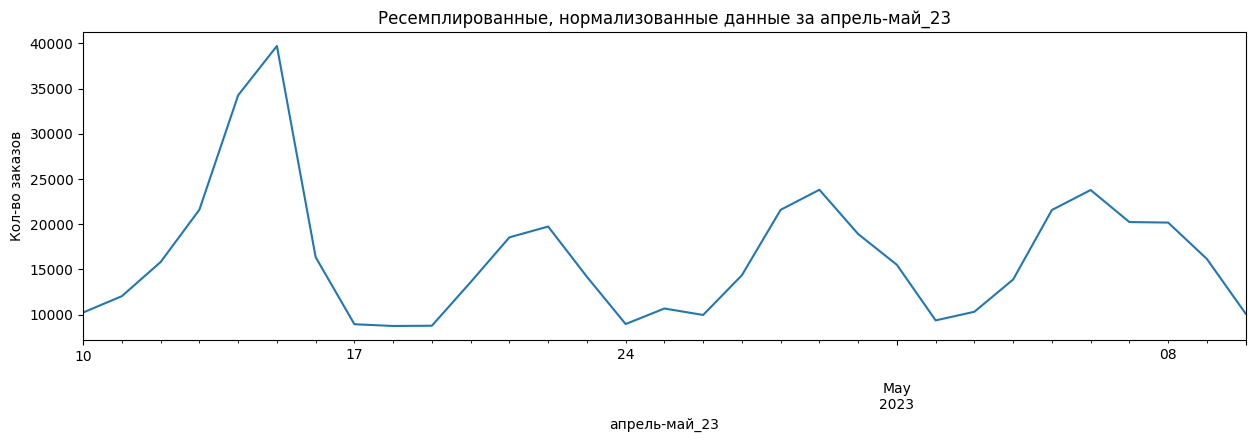

In [57]:
res_graph (data_d , 'Ресемплированные данные', 'весь период')
res_graph (data_d['2022-12-15':'2023-01-15'], 'Ресемплированные, нормализованные данные', 'дакабрь_22-январь_23')
res_graph (data_d['2023-04-10':'2023-05-10'], 'Ресемплированные, нормализованные данные', 'апрель-май_23')

#### Вывод:
- после ресемплировании дат по количеству продаж, наблюдается явная сезонность, самый большой всплеск продаж - в декабре, а также май, июнь, что явно совпадает с государственными праздниками.
> Явные выбросы по продажам в районе НГ (c 29 по 31 декабря), в апреле, видимо Пасха (13-15 апреля) и майских праздников (27-29 мая).
- Видим линейную зависимость общих продаж и продаж с промо.
- Имеет смысл ресемплировать по дням - для более точного прогноза.

#### **Проверим сезонность**
- decomposed.trend — тренд;
- decomposed.seasonal — сезонная составляющая;
- decomposed.weights — веса, используются для уменьшения влияния выбросов.

Text(0.5, 1.0, 'Weights')

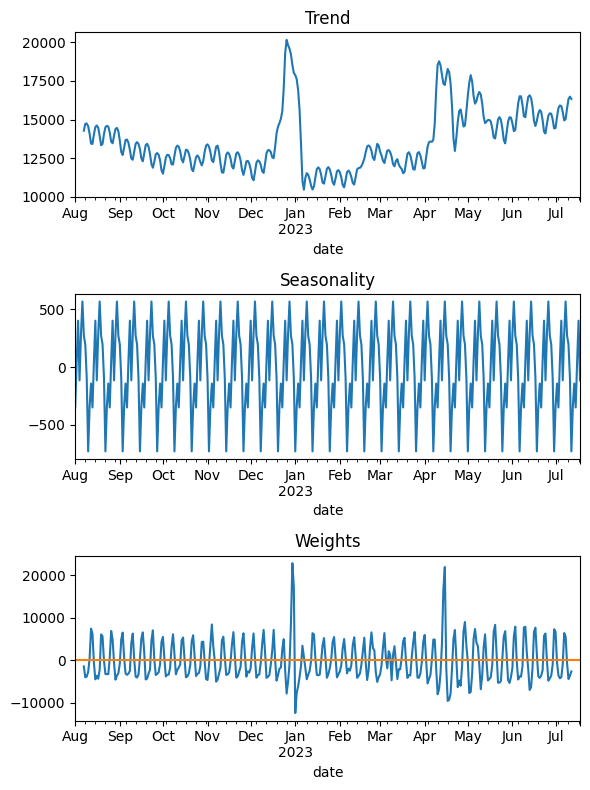

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(data_d, period=12) #activ_store['pr_sales_in_units']

plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()
decomposed.weights.plot(ax=plt.gca())
plt.title('Weights')

In [59]:
def seasonal_graph(data, date1, date2):
    #data_time = data.interpolate()
    decomposed = seasonal_decompose(data, period=12)
    plt.figure(figsize=(6, 8))
    plt.subplot(411)
    decomposed.seasonal[f'{date1}':f'{date2}'].plot(ax=plt.gca()) #2018-07-02
    plt.title('Seasonality')

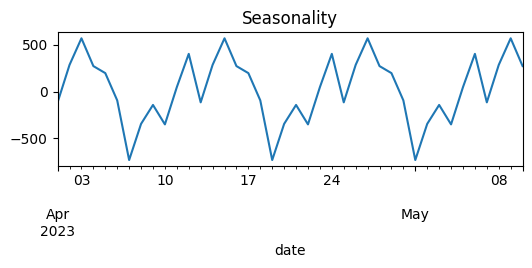

In [60]:
seasonal_graph(data_d, '2023-04-01', '2023-05-10')
#seasonal_graph(data_dl, '2023-04-01', '2023-05-10')

####**Выводы:**
- Тренд ровный, совсем немного растущий вверх, но наблюдаются явные выбросы.
- При более детальном рассмотрении графика сезонности наблюдается цикличность в промежутке **2 недели**.

#### **Скользящее среднее и стандартное отклонение**
**Стационарность ряда**
Проверим на стационарность ряда.
Найдём скользящее **среднее** и  скользящее **стандартное отклонение** (англ. rolling standard deviation, rolling std) — стандартное отклонение по скользящему окну, размер окна возьмем равное 14:

In [61]:
def res_graph1 (data, name, name1, name2, name3, period, period1, period2):
    figsize = (15,4)
    data[name1][period1:period2].plot(figsize=figsize, label=name1)
    data[name2][period1:period2].plot(figsize=figsize, label=name2)
    data[name3][period1:period2].plot(figsize=figsize, label=name3)
    plt.title(f'{name} за {period}')
    plt.xlabel(f'{period}')
    plt.ylabel('Значение')
    plt.legend()
    plt.show()

In [62]:
activ_store1 = activ_store.copy()
activ_store1['sales_units_res'] = activ_store1['sales_units'].resample('1D').sum()
activ_store1['mean'] = activ_store1['sales_units_res'].rolling(14).mean()
activ_store1['std'] = activ_store1['sales_units_res'].rolling(14).std()

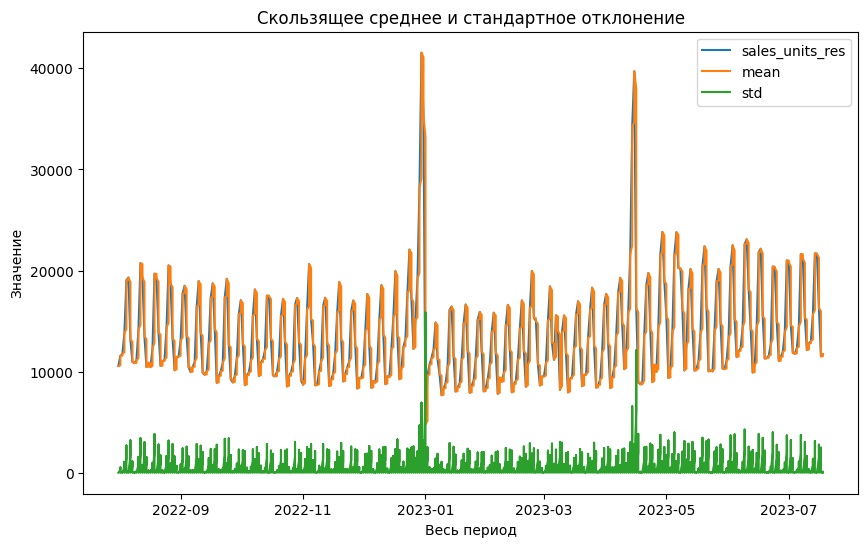

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(activ_store1.index, activ_store1['sales_units_res'], label='sales_units_res')
plt.plot(activ_store1.index, activ_store1['mean'], label='mean')
plt.plot(activ_store1.index, activ_store1['std'], label='std')
plt.title('Скользящее среднее и стандартное отклонение')
plt.xlabel('Весь период')
plt.ylabel('Значение')
plt.legend()
plt.show()

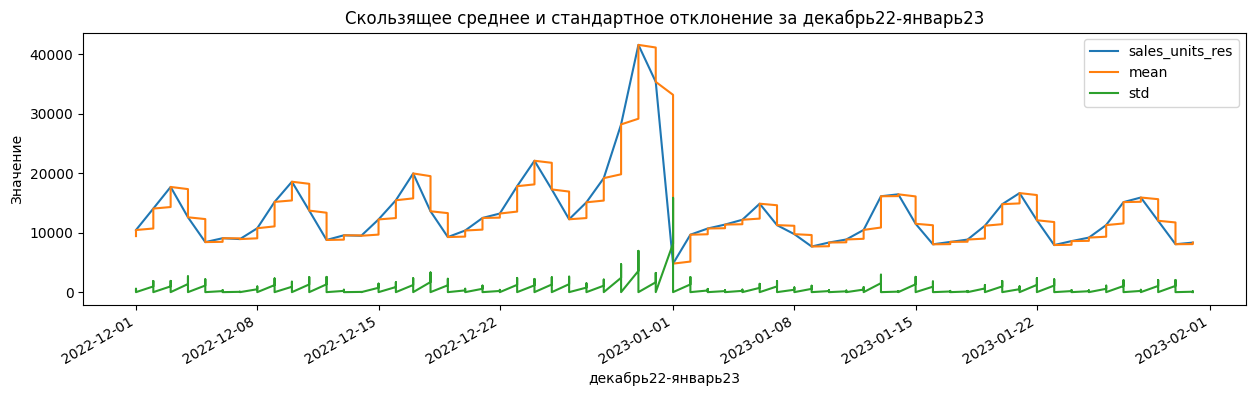

In [64]:
res_graph1 (activ_store1, 'Скользящее среднее и стандартное отклонение', \
            'sales_units_res', 'mean', 'std','декабрь22-январь23', '2022-12-01','2023-01-31')

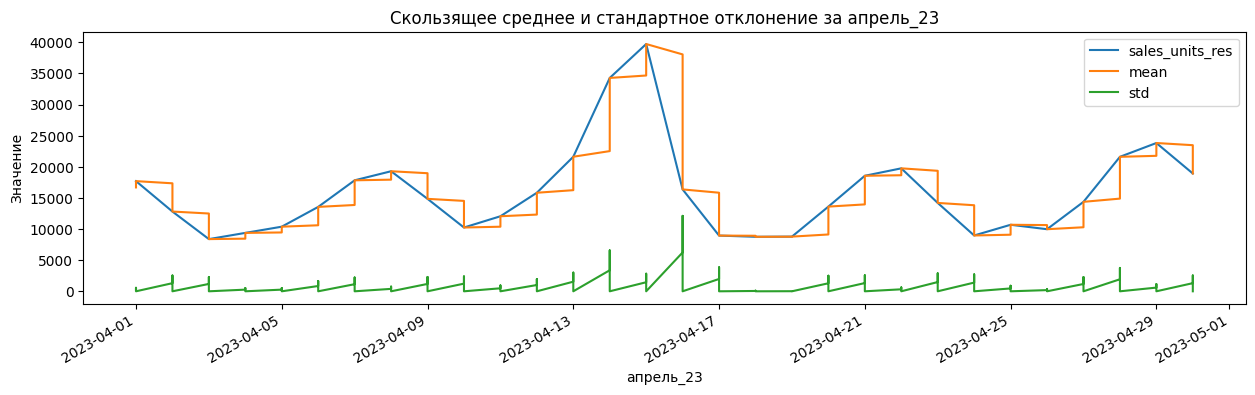

In [65]:
res_graph1 (activ_store1, 'Скользящее среднее и стандартное отклонение', \
            'sales_units_res', 'mean', 'std','апрель_23', '2023-04-01','2023-04-30')

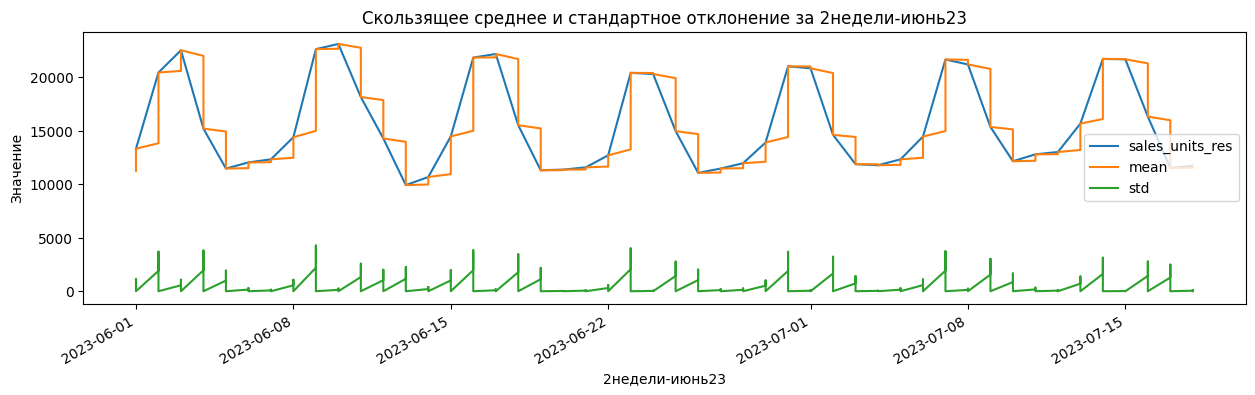

In [66]:
res_graph1 (activ_store1, 'Скользящее среднее и стандартное отклонение', \
            'sales_units_res', 'mean', 'std','2недели-июнь23', '2023-06-01','2023-08-15')

## 3. Анализ данных, формирование признаков:   
- Удаление неинформативных признаков, генерация ряда признаков, по необходимости.
- Разделение общего датасета на выборки для обучения и проверки модели.
- Кодирование и масштабирование признаков, стандартизация данных, по необходимости.

### Проведем анализ магазинов и товаров

In [67]:
# маркер товаров продающихся по штучно = 1, на вес = 0
activ_store['uom'] = activ_store['uom'].apply(lambda x: 0 if x != 1 else x)
express_info(activ_store, 'данных по объедененному датасету')

Информация данных по объедененному датасету:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 882169 entries, 2022-08-01 to 2023-07-18
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   store              882169 non-null  object 
 1   sku                882169 non-null  object 
 2   sales_type         882169 non-null  int64  
 3   sales_units        882169 non-null  int64  
 4   sales_units_promo  882169 non-null  int64  
 5   sales_rub          882169 non-null  float64
 6   sales_rub_promo    882169 non-null  float64
 7   group              882169 non-null  object 
 8   category           882169 non-null  object 
 9   subcategory        882169 non-null  object 
 10  uom                882169 non-null  int64  
 11  division           882169 non-null  object 
 12  city               882169 non-null  object 
 13  type_format        882169 non-null  int64  
 14  loc                882169 non-null  int

store  \
date                                           
2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
2022-08-01  42a0e188f5033bc65bf8d78622277c4e   
2022-08-01  42a0e188f5033bc65bf8d78622277c4e   
2022-08-01  f7e6c85504ce6e82442c770f7c8606f0   

                                         sku  sales_type  sales_units  \
date                                                                    
2022-08-01  4ce0eb956648ab3ff6bb0afa3158cc42           1            5   
2022-08-01  a26de72f8ea9889b7332ed5f940d8b62           0           21   
2022-08-01  eb341a778d385ad6ebe16e90efb48c08           1            1   
2022-08-01  dce1f234d6424aa61f8e7ce0baffd9af           0            6   
2022-08-01  79122a5063b8a1261b8b1f03509ef957           1            1   

            sales_units_promo  sales_rub  sales_rub_promo  \
date                                                        
2022-08-01                  0       79.0             79.0   
2022-08-01                  0      462.0              0.0   
2022-08-01                  1      154.0            154.0   
2022-08-01                  0      860.0              0.0   
2022-08-01                  1       57.0             57.0   

                                       group  \
date                                           
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   

                                    category  \
date                                           
2022-08-01  9701a1c165dd9420816bfec5edd6c2b1   
2022-08-01  c559da2ba967eb820766939a658022c8   
2022-08-01  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-08-01  9701a1c165dd9420816bfec5edd6c2b1   
2022-08-01  c559da2ba967eb820766939a658022c8   

                                 subcategory  ...  \
date                                          ...   
2022-08-01  8afe22eeb3f3f68de994a3c60388858c  ...   
2022-08-01  e06f5ed77191826c212c30722f2cc5a2  ...   
2022-08-01  b3e70d072fc648f6934c288e44f5c35e  ...   
2022-08-01  c01c475ac8d447730ece97d846cc4f25  ...   
2022-08-01  89b0107c6d0aca5f15fa7a715f9e06e5  ...   

                                    division  \
date                                           
2022-08-01  429a86ff6336c144ddaf6144f52ab52c   
2022-08-01  429a86ff6336c144ddaf6144f52ab52c   
2022-08-01  da742b3cfca5388aaf9af28a726a3c30   
2022-08-01  da742b3cfca5388aaf9af28a726a3c30   
2022-08-01  32586311f16876abf92901085bd87b99   

                                        city type_format  loc  size  year  \
date                                                                        
2022-08-01  908c9a564a86426585b29f5335b619bc           1    1     8  2022   
2022-08-01  908c9a564a86426585b29f5335b619bc           1    1     8  2022   
2022-08-01  b8b4b727d6f5d1b61fff7be687f7970f           1    1    12  2022   
2022-08-01  b8b4b727d6f5d1b61fff7be687f7970f           1    1    12  2022   
2022-08-01  3202111cf90e7c816a472aaceb72b0df           1    1    12  2022   

            month  day  weekday  holiday  
date                                      
2022-08-01      8    8        6        1  
2022-08-01      8    8        6        1  
2022-08-01      8    8        6        1  
2022-08-01      8    8        6        1  
2022-08-01      8    8        6        1  

[5 rows x 21 columns]

#### Тип продаж

In [68]:
# сделаем группировку и агрегацию по товарам
#grouped = activ_store.groupby('sku')
sales_type_sorted = activ_store.groupby('sku')[['sales_units', 'sales_units_promo']]\
                    .agg(['sum']).sort_values(by=('sales_units', 'sum'), ascending=False)
# добавим столбец с долей товаров с промо в процентах
sales_type_sorted['promo_part'] = ((sales_type_sorted[('sales_units_promo', 'sum')] / sales_type_sorted[('sales_units', 'sum')])).round(3)
sales_type_sorted.head()

sales_units sales_units_promo promo_part
                                         sum               sum           
sku                                                                      
62d4af457ba2540ce0898a211c0cd17a      125034             20982      0.168
ced0c1a84924c982a6403870c54b99ca      121620             40695      0.335
c0e3f3bd815a862433bc3399c487926b      117922             21899      0.186
4b083e10f6cd2f4360c5425d05be6386       91237             75979      0.833
d5bfeecaaa47887a4b92d17fa55c2e18       81877             10913      0.133

In [69]:
# сортируем по столбцу 'promo_part' в порядке убывания
promo_part_type_sorted = sales_type_sorted.sort_values(by='promo_part', ascending=False)
promo_part_type_sorted.head()

sales_units sales_units_promo promo_part
                                         sum               sum           
sku                                                                      
541748288e850fe30b1f42b558221fec           6                 6        1.0
40f8a2d253c36e0c0a6bacd8804d1e0c           2                 2        1.0
8a83012840a59f8e2edf61d9f7a38982          55                55        1.0
236f43797d8ff0ac7bacb3a6caeb7cd5           2                 2        1.0
4b720d804b03d973b2888fdb874c5670          11                11        1.0

### Добавим долю продаж промо в таблицу activ_store

In [70]:
activ_store['promo_part'] = activ_store['sku'].map(
    activ_store.groupby('sku')[['sales_units', 'sales_units_promo']]
    .agg({'sales_units': 'sum', 'sales_units_promo': 'sum'})
    .eval('sales_units_promo / sales_units').round(3))
activ_store.head()

store  \
date                                           
2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
2022-08-01  42a0e188f5033bc65bf8d78622277c4e   
2022-08-01  42a0e188f5033bc65bf8d78622277c4e   
2022-08-01  f7e6c85504ce6e82442c770f7c8606f0   

                                         sku  sales_type  sales_units  \
date                                                                    
2022-08-01  4ce0eb956648ab3ff6bb0afa3158cc42           1            5   
2022-08-01  a26de72f8ea9889b7332ed5f940d8b62           0           21   
2022-08-01  eb341a778d385ad6ebe16e90efb48c08           1            1   
2022-08-01  dce1f234d6424aa61f8e7ce0baffd9af           0            6   
2022-08-01  79122a5063b8a1261b8b1f03509ef957           1            1   

            sales_units_promo  sales_rub  sales_rub_promo  \
date                                                        
2022-08-01                  0       79.0             79.0   
2022-08-01                  0      462.0              0.0   
2022-08-01                  1      154.0            154.0   
2022-08-01                  0      860.0              0.0   
2022-08-01                  1       57.0             57.0   

                                       group  \
date                                           
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   

                                    category  \
date                                           
2022-08-01  9701a1c165dd9420816bfec5edd6c2b1   
2022-08-01  c559da2ba967eb820766939a658022c8   
2022-08-01  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-08-01  9701a1c165dd9420816bfec5edd6c2b1   
2022-08-01  c559da2ba967eb820766939a658022c8   

                                 subcategory  ...  \
date                                          ...   
2022-08-01  8afe22eeb3f3f68de994a3c60388858c  ...   
2022-08-01  e06f5ed77191826c212c30722f2cc5a2  ...   
2022-08-01  b3e70d072fc648f6934c288e44f5c35e  ...   
2022-08-01  c01c475ac8d447730ece97d846cc4f25  ...   
2022-08-01  89b0107c6d0aca5f15fa7a715f9e06e5  ...   

                                        city type_format loc  size  year  \
date                                                                       
2022-08-01  908c9a564a86426585b29f5335b619bc           1   1     8  2022   
2022-08-01  908c9a564a86426585b29f5335b619bc           1   1     8  2022   
2022-08-01  b8b4b727d6f5d1b61fff7be687f7970f           1   1    12  2022   
2022-08-01  b8b4b727d6f5d1b61fff7be687f7970f           1   1    12  2022   
2022-08-01  3202111cf90e7c816a472aaceb72b0df           1   1    12  2022   

            month  day  weekday  holiday  promo_part  
date                                                  
2022-08-01      8    8        6        1       0.063  
2022-08-01      8    8        6        1       0.204  
2022-08-01      8    8        6        1       0.364  
2022-08-01      8    8        6        1       0.414  
2022-08-01      8    8        6        1       0.122  

[5 rows x 22 columns]

In [71]:
# общие продажи без выделения промо
pr_sales_type_id = activ_store[activ_store['sales_type'] != 1]
pr_sales_type_id.head()

store  \
date                                           
2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
2022-08-01  42a0e188f5033bc65bf8d78622277c4e   
2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
2022-08-01  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   

                                         sku  sales_type  sales_units  \
date                                                                    
2022-08-01  a26de72f8ea9889b7332ed5f940d8b62           0           21   
2022-08-01  dce1f234d6424aa61f8e7ce0baffd9af           0            6   
2022-08-01  3f33017a9ce4fbff701facaeae7a7549           0            1   
2022-08-01  6d8bf88f6daf3b37de081afcf75ec6cf           0           17   
2022-08-01  517b5edeb76505d48bb945abce481959           0            1   

            sales_units_promo  sales_rub  sales_rub_promo  \
date                                                        
2022-08-01                  0      462.0              0.0   
2022-08-01                  0      860.0              0.0   
2022-08-01                  0       65.0              0.0   
2022-08-01                  0     1012.0              0.0   
2022-08-01                  0      214.0              0.0   

                                       group  \
date                                           
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   

                                    category  \
date                                           
2022-08-01  c559da2ba967eb820766939a658022c8   
2022-08-01  9701a1c165dd9420816bfec5edd6c2b1   
2022-08-01  1bc0249a6412ef49b07fe6f62e6dc8de   
2022-08-01  c559da2ba967eb820766939a658022c8   
2022-08-01  186a157b2992e7daed3677ce8e9fe40f   

                                 subcategory  ...  \
date                                          ...   
2022-08-01  e06f5ed77191826c212c30722f2cc5a2  ...   
2022-08-01  c01c475ac8d447730ece97d846cc4f25  ...   
2022-08-01  ca34f669ae367c87f0e75dcae0f61ee5  ...   
2022-08-01  e06f5ed77191826c212c30722f2cc5a2  ...   
2022-08-01  aa36dc1d45661519a5bf923429776a83  ...   

                                        city type_format loc  size  year  \
date                                                                       
2022-08-01  908c9a564a86426585b29f5335b619bc           1   1     8  2022   
2022-08-01  b8b4b727d6f5d1b61fff7be687f7970f           1   1    12  2022   
2022-08-01  c1f75cc0f7fe269dd0fd9bd5e24f9586           1   2     8  2022   
2022-08-01  885fe656777008c335ac96072a45be15           1   1    12  2022   
2022-08-01  c1f75cc0f7fe269dd0fd9bd5e24f9586           1   2     8  2022   

            month  day  weekday  holiday  promo_part  
date                                                  
2022-08-01      8    8        6        1       0.204  
2022-08-01      8    8        6        1       0.414  
2022-08-01      8    8        6        1       0.211  
2022-08-01      8    8        6        1       0.425  
2022-08-01      8    8        6        1       0.335  

[5 rows x 22 columns]

###  Оставим товары, которые продавались без промо

In [72]:
# удалим строки с промо, но только те, у которых есть продажи без промо
activ_store = activ_store[~(activ_store['sales_type'] == 1) & (activ_store['sku']\
             .isin(activ_store.loc[activ_store['sales_type'] == 0, 'sku']))]

# удалим столбцы
activ_store = activ_store.drop(['sales_type', 'sales_units_promo', 'sales_rub_promo'], axis=1)
activ_store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 523495 entries, 2022-08-01 to 2023-07-18
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   store        523495 non-null  object 
 1   sku          523495 non-null  object 
 2   sales_units  523495 non-null  int64  
 3   sales_rub    523495 non-null  float64
 4   group        523495 non-null  object 
 5   category     523495 non-null  object 
 6   subcategory  523495 non-null  object 
 7   uom          523495 non-null  int64  
 8   division     523495 non-null  object 
 9   city         523495 non-null  object 
 10  type_format  523495 non-null  int64  
 11  loc          523495 non-null  int64  
 12  size         523495 non-null  int64  
 13  year         523495 non-null  int64  
 14  month        523495 non-null  int64  
 15  day          523495 non-null  int64  
 16  weekday      523495 non-null  int64  
 17  holiday      523495 non-null  int64  
 18  promo_pa

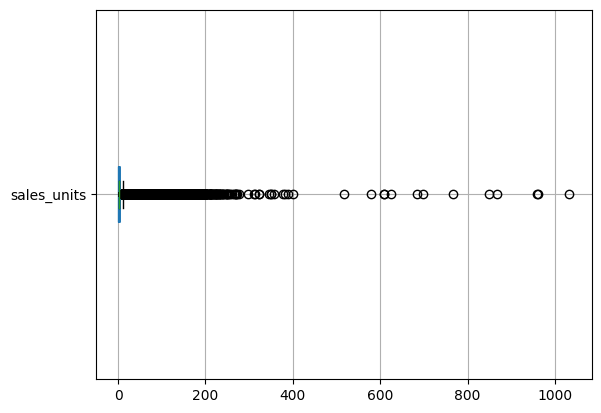

In [73]:
# общий боксплот
activ_store[['sales_units']].boxplot(vert=False, patch_artist=True, notch=True);

In [74]:
Q1 = activ_store.sales_units.quantile(0.25)
Q3 = activ_store.sales_units.quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print('Верхняя граница:', upper)
print('Нижняя граница:', lower)

Верхняя граница: 11.0
Нижняя граница: -5.0


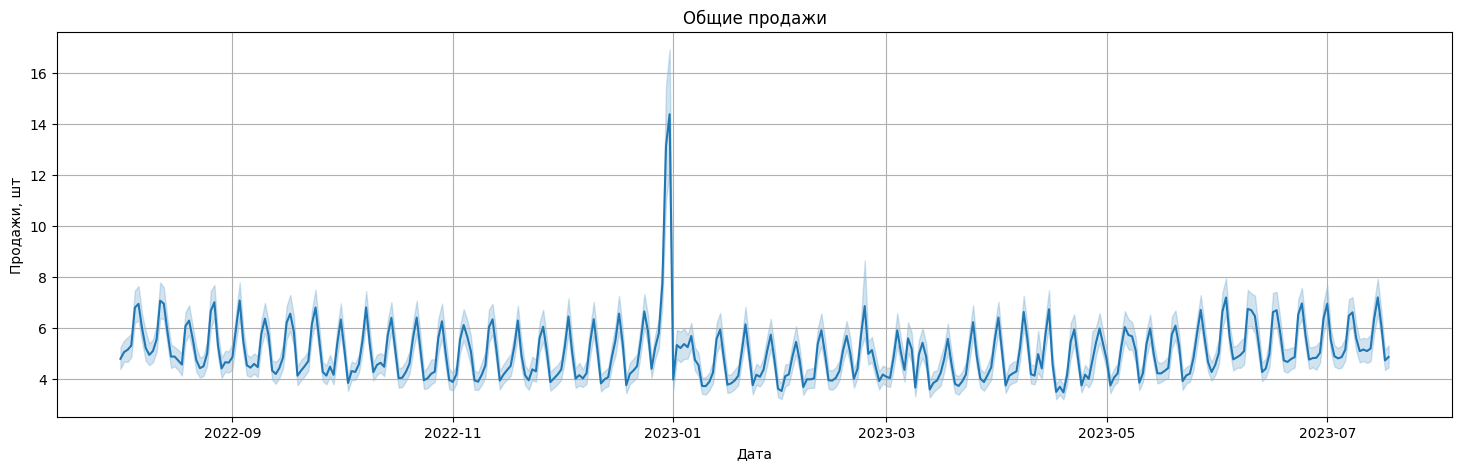

In [75]:
# общие продажи
plt.figure(figsize=(18, 5))
sns.lineplot(data=activ_store, x=activ_store.index, y="sales_units")
plt.xlabel("Дата")
plt.ylabel("Продажи, шт")
plt.title("Общие продажи")
plt.grid(True)
plt.show()

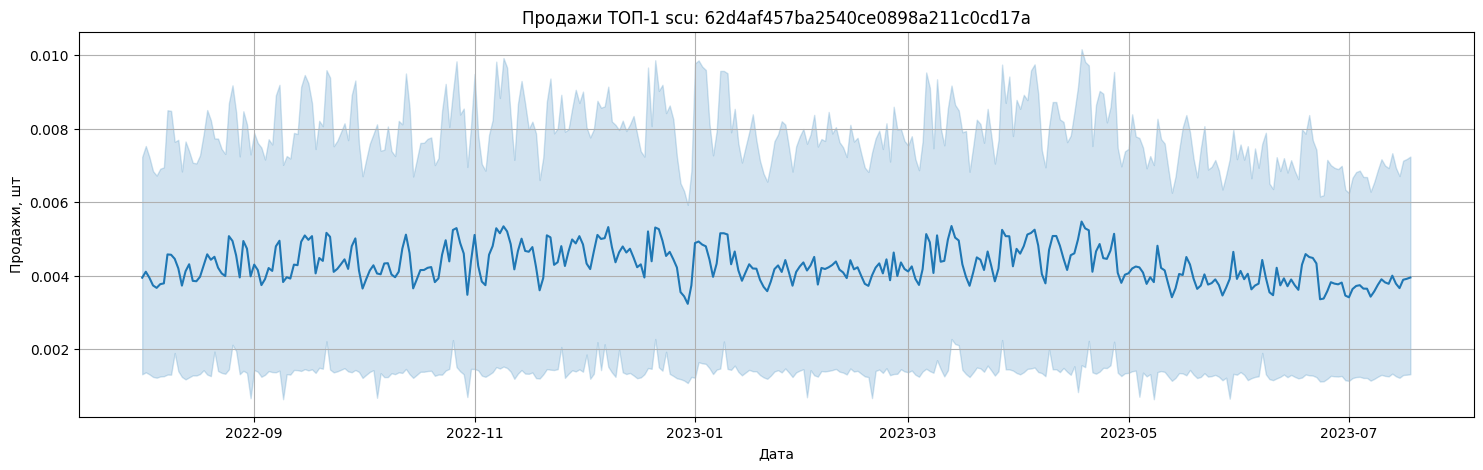

In [76]:
# самый популярный товар
plt.figure(figsize=(18, 5))
sns.lineplot(data=activ_store, x=activ_store.index, y=(activ_store['sku'] == '62d4af457ba2540ce0898a211c0cd17a'))
plt.xlabel("Дата")
plt.ylabel("Продажи, шт")
plt.title("Продажи ТОП-1 scu: 62d4af457ba2540ce0898a211c0cd17a")
plt.grid(True)
plt.show()

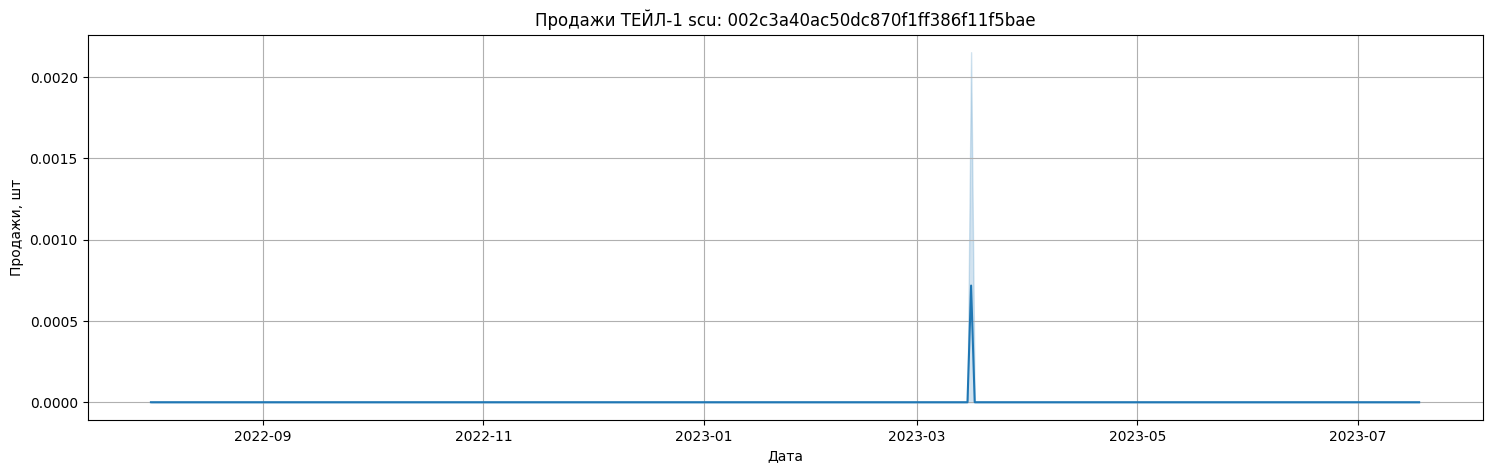

In [77]:
# самый не популярный товар
plt.figure(figsize=(18, 5))
sns.lineplot(data=activ_store, x=activ_store.index, y=(activ_store['sku'] == '002c3a40ac50dc870f1ff386f11f5bae'))
plt.xlabel("Дата")
plt.ylabel("Продажи, шт")
plt.title("Продажи ТЕЙЛ-1 scu: 002c3a40ac50dc870f1ff386f11f5bae")
plt.grid(True)
plt.show()

#### Вывод:
- Мы видим, что ряд продаж товаров `sales_in_units` совпадает полностью `_sales_units_promo`.
- Добавили в общую таблицу признаки доля продаж промо `promo_part`.
- оставили товары, которые продавались без промо.
- удалили неявные дубликаты продаж, где одноременно были продажи товаров с промо и без.
- установили в признаке `pr_uom_id`  маркеры товаров продающихся поштучно = 1, на вес = 0.
- проснализировали продажи популярных и непопулярных товаров - имеет смысл в будущем строить отдельную модель продаж товаров в праздники, так как некоторые товары продаются только в период праздников.

#### Добавляем признак цена за единицу товара - 'price_units'

In [78]:
# цена за единицу товара
activ_store['price_units'] = (activ_store['sales_rub'] / activ_store['sales_units']).round(2)

#### Проведем нормализацию числовых признаков:
- `sales_units`, `price_units`, `sales_rub`
- Сформируем целевой признак `'sales_units_stand'`

In [79]:
# нормализация продажи в штуках
sales_units_mean = activ_store.sales_units.mean()
sales_units_sd = activ_store.sales_units.std()

activ_store['sales_units_stand'] = (activ_store.sales_units - sales_units_mean) / sales_units_sd

In [80]:
# нормализация продажи в рублях
sales_rub_mean = activ_store.sales_rub.mean()
sales_rub_sd = activ_store.sales_rub.std()

activ_store['sales_rub_stand'] = (activ_store.sales_rub - sales_rub_mean) / sales_rub_sd

In [81]:
# нормализация доли промо продажи в рублях за штуку
price_units_mean = activ_store.price_units.mean()
price_units_sd = activ_store.price_units.std()

activ_store['price_units_stand'] = (activ_store.price_units - price_units_mean) / price_units_sd

In [82]:
activ_store.head()

store  \
date                                           
2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
2022-08-01  42a0e188f5033bc65bf8d78622277c4e   
2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
2022-08-01  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   

                                         sku  sales_units  sales_rub  \
date                                                                   
2022-08-01  a26de72f8ea9889b7332ed5f940d8b62           21      462.0   
2022-08-01  dce1f234d6424aa61f8e7ce0baffd9af            6      860.0   
2022-08-01  3f33017a9ce4fbff701facaeae7a7549            1       65.0   
2022-08-01  6d8bf88f6daf3b37de081afcf75ec6cf           17     1012.0   
2022-08-01  517b5edeb76505d48bb945abce481959            1      214.0   

                                       group  \
date                                           
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   

                                    category  \
date                                           
2022-08-01  c559da2ba967eb820766939a658022c8   
2022-08-01  9701a1c165dd9420816bfec5edd6c2b1   
2022-08-01  1bc0249a6412ef49b07fe6f62e6dc8de   
2022-08-01  c559da2ba967eb820766939a658022c8   
2022-08-01  186a157b2992e7daed3677ce8e9fe40f   

                                 subcategory  uom  \
date                                                
2022-08-01  e06f5ed77191826c212c30722f2cc5a2    0   
2022-08-01  c01c475ac8d447730ece97d846cc4f25    1   
2022-08-01  ca34f669ae367c87f0e75dcae0f61ee5    0   
2022-08-01  e06f5ed77191826c212c30722f2cc5a2    0   
2022-08-01  aa36dc1d45661519a5bf923429776a83    1   

                                    division  \
date                                           
2022-08-01  429a86ff6336c144ddaf6144f52ab52c   
2022-08-01  da742b3cfca5388aaf9af28a726a3c30   
2022-08-01  296bd0cc6e735f9d7488ebc8fbc19130   
2022-08-01  296bd0cc6e735f9d7488ebc8fbc19130   
2022-08-01  296bd0cc6e735f9d7488ebc8fbc19130   

                                        city  ...  year  month  day  weekday  \
date                                          ...                              
2022-08-01  908c9a564a86426585b29f5335b619bc  ...  2022      8    8        6   
2022-08-01  b8b4b727d6f5d1b61fff7be687f7970f  ...  2022      8    8        6   
2022-08-01  c1f75cc0f7fe269dd0fd9bd5e24f9586  ...  2022      8    8        6   
2022-08-01  885fe656777008c335ac96072a45be15  ...  2022      8    8        6   
2022-08-01  c1f75cc0f7fe269dd0fd9bd5e24f9586  ...  2022      8    8        6   

            holiday  promo_part  price_units  sales_units_stand  \
date                                                              
2022-08-01        1       0.204        22.00           1.458935   
2022-08-01        1       0.414       143.33           0.083276   
2022-08-01        1       0.211        65.00          -0.375277   
2022-08-01        1       0.425        59.53           1.092093   
2022-08-01        1       0.335       214.00          -0.375277   

            sales_rub_stand  price_units_stand  
date                                            
2022-08-01        -0.045953          -0.895639  
2022-08-01         0.338182           0.062514  
2022-08-01        -0.429122          -0.556065  
2022-08-01         0.484887          -0.599262  
2022-08-01        -0.285313           0.620601  

[5 rows x 23 columns]

Вывод:
- создали новый признак  по прадажам в рублях за единицу товара`'price_units'`.
- Стандартизировали признаки `sales_units`, `price_units`, `sales_rub`, в том числе `'sales_units_stand' - целевой`, `'price_units_stand'`, `'sales_rub_stand'` - стандартизировав исходные.

### Исследуем числовые и категориальные признаки

* Выделим числовые признаки и сохраним их в отдельную таблицу numeric
* Выделим категориальные признаки и сохраним их в отдельную таблицу categorical

In [83]:
numeric = activ_store[activ_store.select_dtypes(include='number').columns]
numeric.head(2)

sales_units  sales_rub  uom  type_format  loc  size  year  month  \
date                                                                           
2022-08-01           21      462.0    0            1    1     8  2022      8   
2022-08-01            6      860.0    1            1    1    12  2022      8   

            day  weekday  holiday  promo_part  price_units  sales_units_stand  \
date                                                                            
2022-08-01    8        6        1       0.204        22.00           1.458935   
2022-08-01    8        6        1       0.414       143.33           0.083276   

            sales_rub_stand  price_units_stand  
date                                            
2022-08-01        -0.045953          -0.895639  
2022-08-01         0.338182           0.062514

In [84]:
categorical = activ_store[activ_store.select_dtypes(include='object').columns]
categorical.head(2)

store  \
date                                           
2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
2022-08-01  42a0e188f5033bc65bf8d78622277c4e   

                                         sku  \
date                                           
2022-08-01  a26de72f8ea9889b7332ed5f940d8b62   
2022-08-01  dce1f234d6424aa61f8e7ce0baffd9af   

                                       group  \
date                                           
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   

                                    category  \
date                                           
2022-08-01  c559da2ba967eb820766939a658022c8   
2022-08-01  9701a1c165dd9420816bfec5edd6c2b1   

                                 subcategory  \
date                                           
2022-08-01  e06f5ed77191826c212c30722f2cc5a2   
2022-08-01  c01c475ac8d447730ece97d846cc4f25   

                                    division                              city  
date                                                                            
2022-08-01  429a86ff6336c144ddaf6144f52ab52c  908c9a564a86426585b29f5335b619bc  
2022-08-01  da742b3cfca5388aaf9af28a726a3c30  b8b4b727d6f5d1b61fff7be687f7970f

In [85]:
categorical.columns.tolist()

['store', 'sku', 'group', 'category', 'subcategory', 'division', 'city']

In [86]:
categorical_columns = categorical.columns.tolist()

for column in categorical_columns:
    unique_count = activ_store[column].sort_values().nunique()
    print(f'Количество уникальных значений в столбце {column}',':', unique_count)

Количество уникальных значений в столбце store : 9
Количество уникальных значений в столбце sku : 1946
Количество уникальных значений в столбце group : 9
Количество уникальных значений в столбце category : 43
Количество уникальных значений в столбце subcategory : 167
Количество уникальных значений в столбце division : 5
Количество уникальных значений в столбце city : 6


In [87]:
numeric_columns = numeric.columns.tolist()

for column in numeric_columns:
    unique_count = activ_store[column].sort_values().nunique()
    print(f'Количество уникальных значений в столбце {column}',':', unique_count)

Количество уникальных значений в столбце sales_units : 261
Количество уникальных значений в столбце sales_rub : 8059
Количество уникальных значений в столбце uom : 2
Количество уникальных значений в столбце type_format : 3
Количество уникальных значений в столбце loc : 3
Количество уникальных значений в столбце size : 5
Количество уникальных значений в столбце year : 2
Количество уникальных значений в столбце month : 12
Количество уникальных значений в столбце day : 31
Количество уникальных значений в столбце weekday : 7
Количество уникальных значений в столбце holiday : 2
Количество уникальных значений в столбце promo_part : 702
Количество уникальных значений в столбце price_units : 23634
Количество уникальных значений в столбце sales_units_stand : 261
Количество уникальных значений в столбце sales_rub_stand : 8059
Количество уникальных значений в столбце price_units_stand : 23634


### Продажи по дням в шт и рублях

In [88]:
# список для построения графиков
sales_graph_list = ['sales_units','price_units','sales_rub']

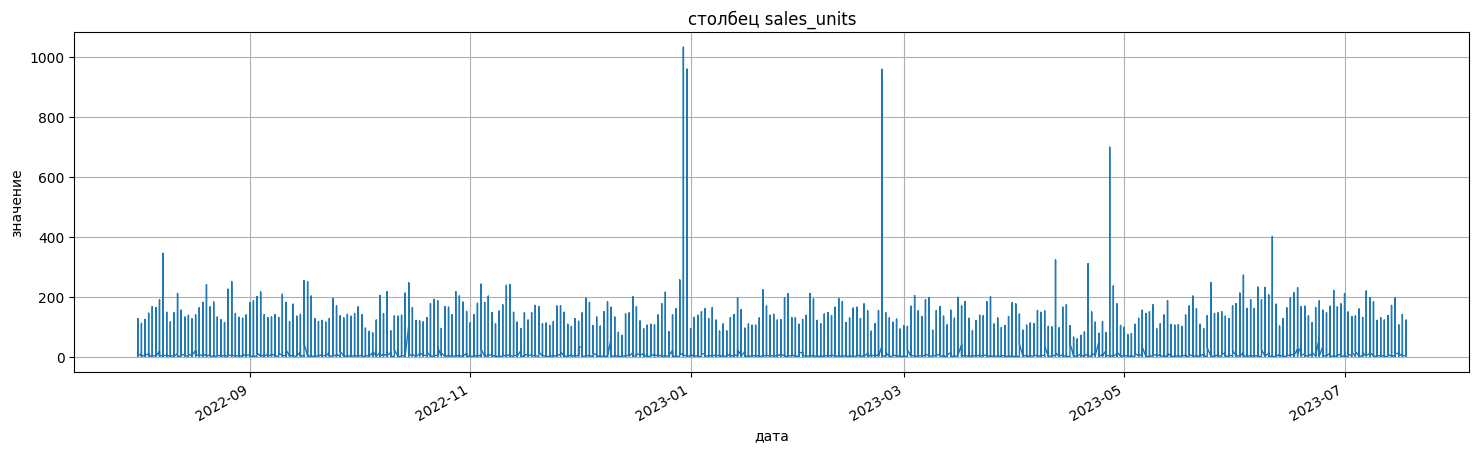

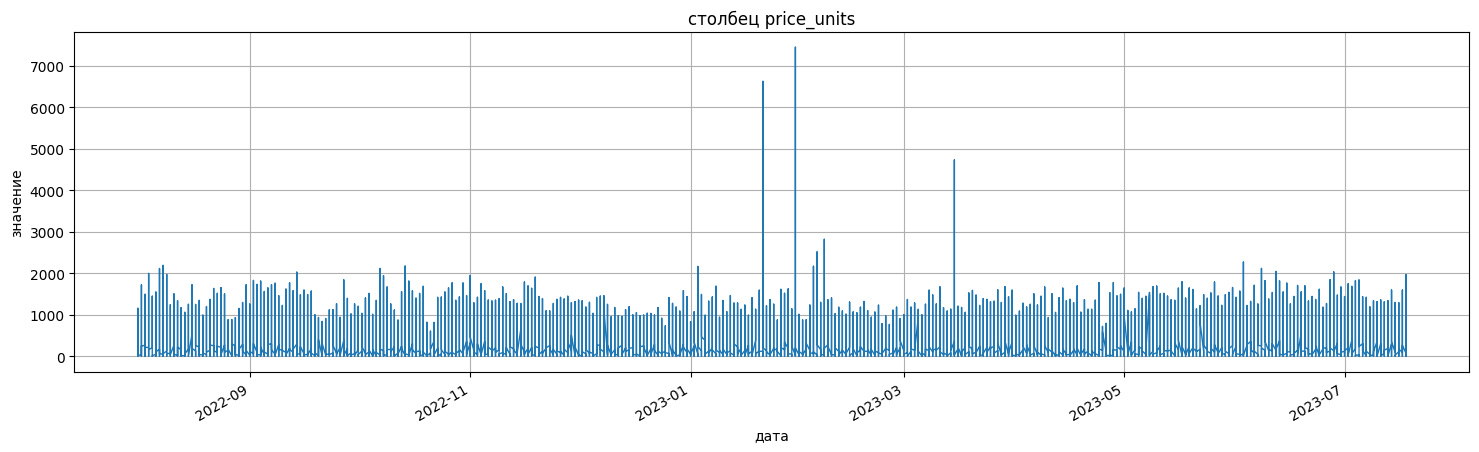

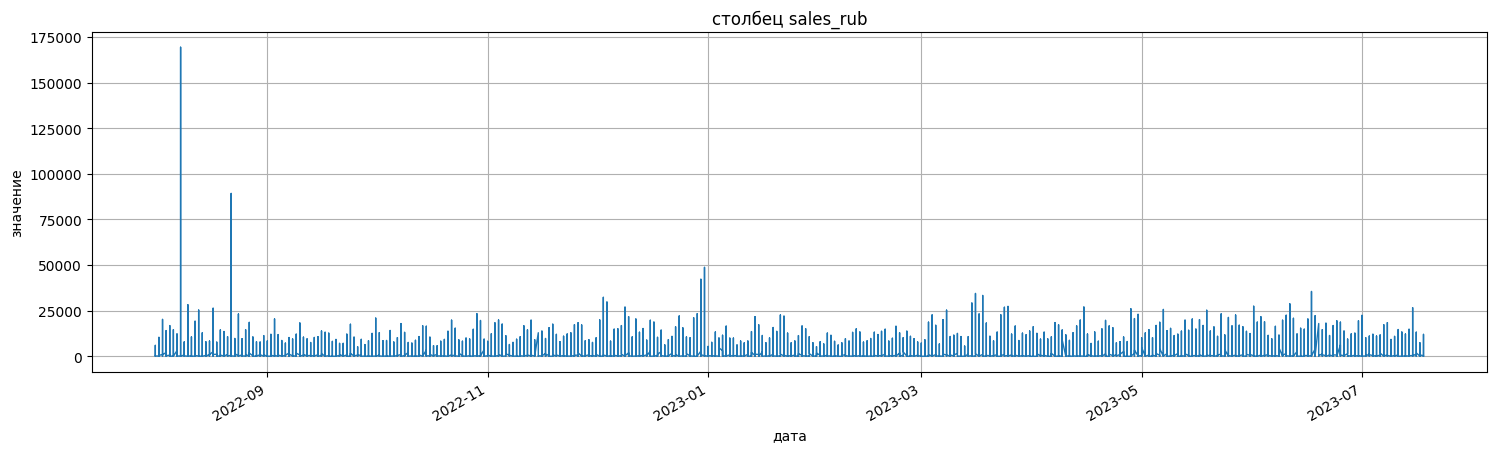

In [89]:
# цикл для построения графиков
for column in sales_graph_list:
    plt.figure(figsize=(18, 5))
    activ_store[column].plot(label=column, figsize=(18, 5), linewidth=1)
    #sns.lineplot(x=df.index, y=df[column])
    plt.title((f'столбец {column}'))
    plt.xlabel('дата')
    plt.ylabel('значение')
    plt.grid(True)
    plt.show()

In [90]:
activ_store[['price_units', 'sales_units', 'sales_rub']].describe().style.format("{:,.2f}")

### Построим корреляционную матрицу для смешанного набора признаков

In [91]:
numeric.columns

Index(['sales_units', 'sales_rub', 'uom', 'type_format', 'loc', 'size', 'year',
       'month', 'day', 'weekday', 'holiday', 'promo_part', 'price_units',
       'sales_units_stand', 'sales_rub_stand', 'price_units_stand'],
      dtype='object')

### Продажи товаров по категориям

In [92]:
categorical.columns

Index(['store', 'sku', 'group', 'category', 'subcategory', 'division', 'city'], dtype='object')

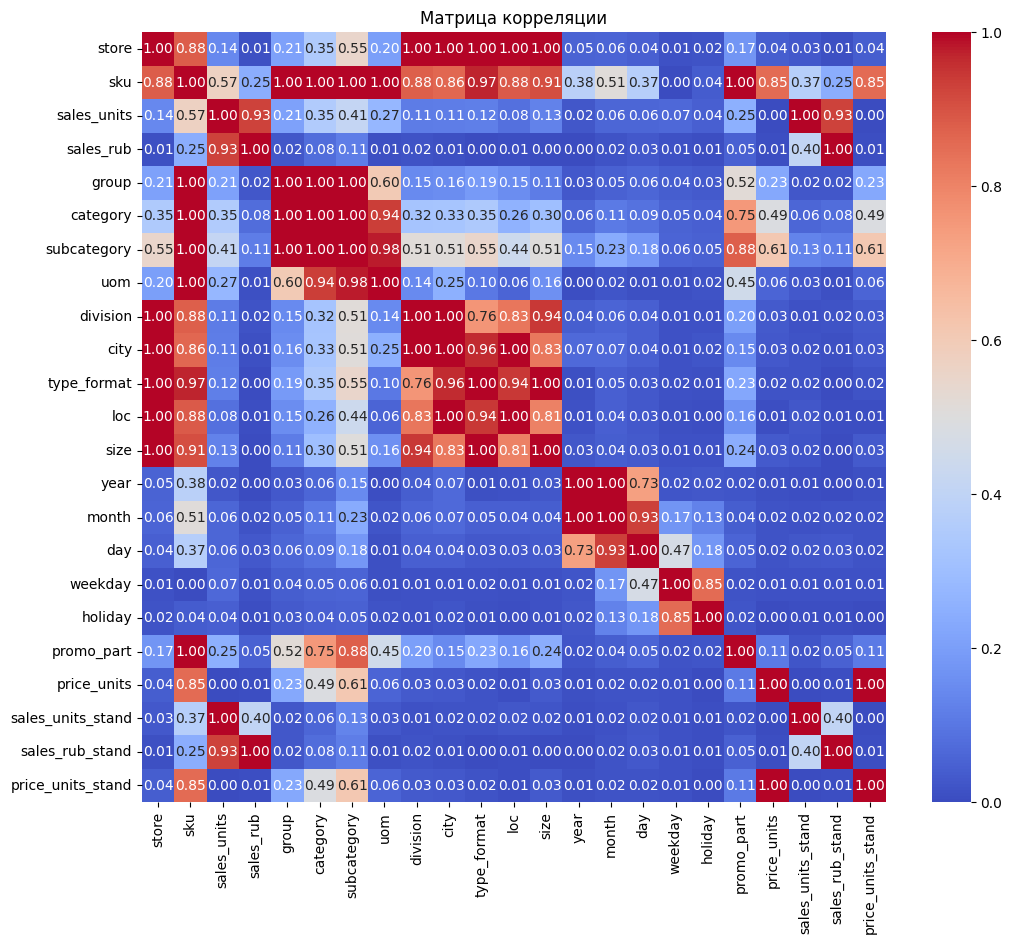

CPU times: user 18.7 s, sys: 1.8 s, total: 20.5 s
Wall time: 1min 49s


In [93]:
%%time
interval_cols = ['promo_part', 'price_units', 'sales_units_stand',
                 'sales_rub', 'sales_rub_stand', 'price_units_stand']
phik_matrix = activ_store.phik_matrix(interval_cols=interval_cols)
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Матрица корреляции')
plt.show()

### Добавим новые признаки:
- по группам товаров
- категориям, подкатегориям
- доли продаж товаров по категориям в шт и руб

#### Группы товаров

In [94]:
# сделаем группировку и агрегацию по группам
grouped = activ_store.groupby('group')
pr_group_id = grouped[['sales_units', 'sales_rub']].agg(['sum'])
# сорртировака по сумме
pr_group_id_sorted = pr_group_id.sort_values(by=('sales_rub', 'sum'), ascending=False)
pr_group_id_sorted

sales_units    sales_rub
                                         sum          sum
group                                                    
aab3238922bcc25a6f606eb525ffdc56      784443  116420699.0
c74d97b01eae257e44aa9d5bade97baf     1429696   68732479.0
6512bd43d9caa6e02c990b0a82652dca      251265   42369796.0
c51ce410c124a10e0db5e4b97fc2af39       67576   20630412.0
c20ad4d76fe97759aa27a0c99bff6710      114730   14681318.0
32bb90e8976aab5298d5da10fe66f21d        7900    2084682.0
1ff1de774005f8da13f42943881c655f        9549    1808134.0
98f13708210194c475687be6106a3b84         432      49854.0
3c59dc048e8850243be8079a5c74d079          28       1607.0

#### Категории товаров

In [95]:
# сделаем группировку и агрегацию по подкатегориям
grouped = activ_store.groupby('category')
pr_cat_id = grouped[['sales_units', 'sales_rub']].agg(['sum'])
# сорртировака по сумме
pr_cat_id_sorted = pr_cat_id.sort_values(by=('sales_rub', 'sum'), ascending=False)
pr_cat_id_sorted.head()

sales_units   sales_rub
                                         sum         sum
category                                                
28fc2782ea7ef51c1104ccf7b9bea13d      264803  47632120.0
c559da2ba967eb820766939a658022c8      896770  34467161.0
9701a1c165dd9420816bfec5edd6c2b1      199439  29745727.0
e58cc5ca94270acaceed13bc82dfedf7      146346  22770289.0
186a157b2992e7daed3677ce8e9fe40f      152587  21213278.0

#### Подкатегории товаров

In [96]:
# сделаем группировку и агрегацию по подкатегориям
grouped = activ_store.groupby('subcategory')
pr_subcat_id = grouped[['sales_units', 'sales_rub']].agg(['sum'])
# сорртировака по сумме
pr_subcat_id_sorted = pr_subcat_id.sort_values(by=('sales_rub', 'sum'), ascending=False)
pr_subcat_id_sorted.head()

sales_units   sales_rub
                                         sum         sum
subcategory                                             
aa36dc1d45661519a5bf923429776a83      145260  20155924.0
c93c26cd49ea08e6b8984351d4164575       82805  16039692.0
7a8aebb07d6e8ba9da453ec0f3f359a4       54720  12285820.0
d29b5ce9c2883f0b7e90f79071a2ca82       58444  11153125.0
e06f5ed77191826c212c30722f2cc5a2      327731  10998687.0

#### Добавим доли продаж товаров по категориям в шт и руб

In [97]:
#напишем функцию по формированию признаков долей
def sales_share(data, name_col, name, columns_to_process):
    for column in columns_to_process:
        unique_counts = data.groupby(column)['sku'].nunique()# количество уникальных товаров в каждой категории/типа магазина
        sales_sum = data.groupby(column)[name_col].sum() # сумма продаж для каждой категории/типа магазина
        sku_sales = unique_counts / sales_sum # доля продаж уникальных товаров в каждой категории/типа магазина
        # доля продаж уникальных товаров в таблицу
        data[f'sales_share_{column}_{name}'] = data[column].map(sku_sales)
    return data

In [98]:
# перебор по категориям
columns_to_process = ['group', 'category', 'subcategory']
#Добавим доли продаж товаров по категориям в шт
activ_store = sales_share(activ_store, 'sales_units', 'unit', columns_to_process)
#Добавим доли продаж товаров по категориям в rub
activ_store = sales_share(activ_store, 'sales_rub', 'rub', columns_to_process)
activ_store.head(3)

store  \
date                                           
2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
2022-08-01  42a0e188f5033bc65bf8d78622277c4e   
2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   

                                         sku  sales_units  sales_rub  \
date                                                                   
2022-08-01  a26de72f8ea9889b7332ed5f940d8b62           21      462.0   
2022-08-01  dce1f234d6424aa61f8e7ce0baffd9af            6      860.0   
2022-08-01  3f33017a9ce4fbff701facaeae7a7549            1       65.0   

                                       group  \
date                                           
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   

                                    category  \
date                                           
2022-08-01  c559da2ba967eb820766939a658022c8   
2022-08-01  9701a1c165dd9420816bfec5edd6c2b1   
2022-08-01  1bc0249a6412ef49b07fe6f62e6dc8de   

                                 subcategory  uom  \
date                                                
2022-08-01  e06f5ed77191826c212c30722f2cc5a2    0   
2022-08-01  c01c475ac8d447730ece97d846cc4f25    1   
2022-08-01  ca34f669ae367c87f0e75dcae0f61ee5    0   

                                    division  \
date                                           
2022-08-01  429a86ff6336c144ddaf6144f52ab52c   
2022-08-01  da742b3cfca5388aaf9af28a726a3c30   
2022-08-01  296bd0cc6e735f9d7488ebc8fbc19130   

                                        city  ...  price_units  \
date                                          ...                
2022-08-01  908c9a564a86426585b29f5335b619bc  ...        22.00   
2022-08-01  b8b4b727d6f5d1b61fff7be687f7970f  ...       143.33   
2022-08-01  c1f75cc0f7fe269dd0fd9bd5e24f9586  ...        65.00   

            sales_units_stand  sales_rub_stand  price_units_stand  \
date                                                                
2022-08-01           1.458935        -0.045953          -0.895639   
2022-08-01           0.083276         0.338182           0.062514   
2022-08-01          -0.375277        -0.429122          -0.556065   

            sales_share_group_unit  sales_share_category_unit  \
date                                                            
2022-08-01                0.000516                   0.000270   
2022-08-01                0.000885                   0.001078   
2022-08-01                0.000516                   0.000665   

            sales_share_subcategory_unit  sales_share_group_rub  \
date                                                              
2022-08-01                      0.000101               0.000011   
2022-08-01                      0.001175               0.000006   
2022-08-01                      0.000724               0.000011   

            sales_share_category_rub  sales_share_subcategory_rub  
date                                                               
2022-08-01                  0.000007                     0.000003  
2022-08-01                  0.000007                     0.000010  
2022-08-01                  0.000016                     0.000019  

[3 rows x 29 columns]

In [99]:
# оценим доли продаж scu в группах товаров и сортируем в порядке убывания долей
activ_store.groupby('group')[['sku', 'sales_share_group_unit']].apply(lambda x: x.sort_values(ascending=False, by='sales_share_group_unit'))

sku  \
group                            date                                           
1ff1de774005f8da13f42943881c655f 2022-08-01  a97a38f8bcdf16c8d11f2010bb409da5   
                                 2023-03-13  70f6f2543cdaf69fb2f89317e23a0929   
                                 2023-03-12  70f6f2543cdaf69fb2f89317e23a0929   
                                 2023-03-12  45bd6ffd65dc1b68ea59c9ec5f4590f9   
                                 2023-03-12  09b6f670e4f5648aef001e34f7945990   
...                                                                       ...   
c74d97b01eae257e44aa9d5bade97baf 2022-11-25  d5bfeecaaa47887a4b92d17fa55c2e18   
                                 2022-11-25  cff633e270708ced01bc585eb1421667   
                                 2022-11-25  1edb148e94ceddc5abaa91ad4814a737   
                                 2022-11-25  22988026fe85fde60d8bf777ab6bc3b4   
                                 2023-07-18  083e7f594409e946662187b13b13868a   

                                             sales_share_group_unit  
group                            date                                
1ff1de774005f8da13f42943881c655f 2022-08-01                0.003665  
                                 2023-03-13                0.003665  
                                 2023-03-12                0.003665  
                                 2023-03-12                0.003665  
                                 2023-03-12                0.003665  
...                                                             ...  
c74d97b01eae257e44aa9d5bade97baf 2022-11-25                0.000516  
                                 2022-11-25                0.000516  
                                 2022-11-25                0.000516  
                                 2022-11-25                0.000516  
                                 2023-07-18                0.000516  

[523495 rows x 2 columns]

In [100]:
# оценим доли продаж scu в группах товаров и сортируем в порядке убывания долей
activ_store.groupby('group')[['sku', 'sales_share_group_rub']].apply(lambda x: x.sort_values(ascending=False, by='sales_share_group_rub'))

sku  \
group                            date                                           
1ff1de774005f8da13f42943881c655f 2022-08-01  a97a38f8bcdf16c8d11f2010bb409da5   
                                 2023-03-13  70f6f2543cdaf69fb2f89317e23a0929   
                                 2023-03-12  70f6f2543cdaf69fb2f89317e23a0929   
                                 2023-03-12  45bd6ffd65dc1b68ea59c9ec5f4590f9   
                                 2023-03-12  09b6f670e4f5648aef001e34f7945990   
...                                                                       ...   
c74d97b01eae257e44aa9d5bade97baf 2022-11-25  d5bfeecaaa47887a4b92d17fa55c2e18   
                                 2022-11-25  cff633e270708ced01bc585eb1421667   
                                 2022-11-25  1edb148e94ceddc5abaa91ad4814a737   
                                 2022-11-25  22988026fe85fde60d8bf777ab6bc3b4   
                                 2023-07-18  083e7f594409e946662187b13b13868a   

                                             sales_share_group_rub  
group                            date                               
1ff1de774005f8da13f42943881c655f 2022-08-01               0.000019  
                                 2023-03-13               0.000019  
                                 2023-03-12               0.000019  
                                 2023-03-12               0.000019  
                                 2023-03-12               0.000019  
...                                                            ...  
c74d97b01eae257e44aa9d5bade97baf 2022-11-25               0.000011  
                                 2022-11-25               0.000011  
                                 2022-11-25               0.000011  
                                 2022-11-25               0.000011  
                                 2023-07-18               0.000011  

[523495 rows x 2 columns]

In [101]:
# группы товара
activ_store.pivot_table(index=['group'],
               values=['sales_rub'],
               aggfunc=[np.mean, len, sum]
              ).sort_values(by=('sum', 'sales_rub'), ascending=False)

mean       len          sum
                                   sales_rub sales_rub    sales_rub
group                                                              
aab3238922bcc25a6f606eb525ffdc56  602.457522    193243  116420699.0
c74d97b01eae257e44aa9d5bade97baf  284.318100    241745   68732479.0
6512bd43d9caa6e02c990b0a82652dca  990.457618     42778   42369796.0
c51ce410c124a10e0db5e4b97fc2af39  943.881228     21857   20630412.0
c20ad4d76fe97759aa27a0c99bff6710  868.768448     16899   14681318.0
32bb90e8976aab5298d5da10fe66f21d  750.966138      2776    2084682.0
1ff1de774005f8da13f42943881c655f  450.008462      4018    1808134.0
98f13708210194c475687be6106a3b84  294.994083       169      49854.0
3c59dc048e8850243be8079a5c74d079  160.700000        10       1607.0

#### Проанализируем общие продажи по группам, по категориям и по подкатегориям в штуках

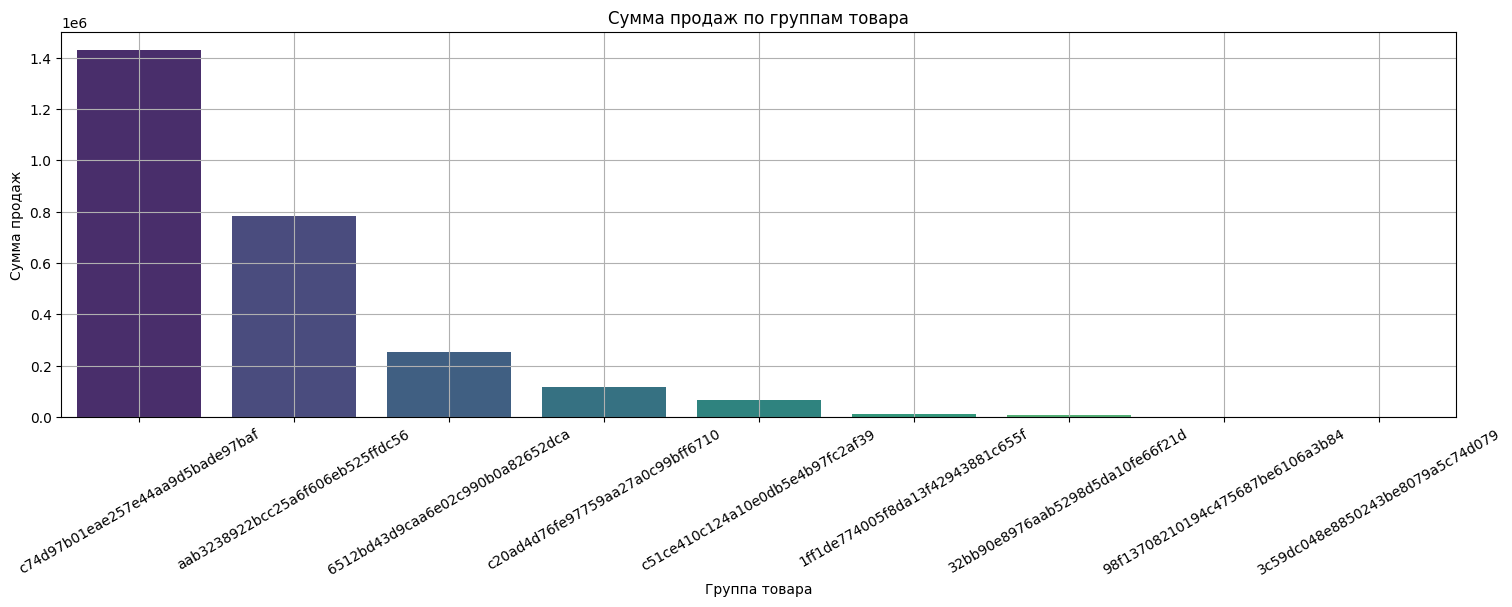

In [102]:
# группы
pivot_table = activ_store.pivot_table(index=['group'],
                                      values=['sales_units'],
                                      aggfunc=[np.mean, len, sum]
                                      ).sort_values(by=('sum', 'sales_units'), ascending=False)
plt.figure(figsize=(18, 5))
sns.barplot(x=pivot_table.index, y=('sum', 'sales_units'), data=pivot_table, palette="viridis")

plt.title('Сумма продаж по группам товара')
plt.xlabel('Группа товара')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=30)
plt.grid(True)

plt.show()

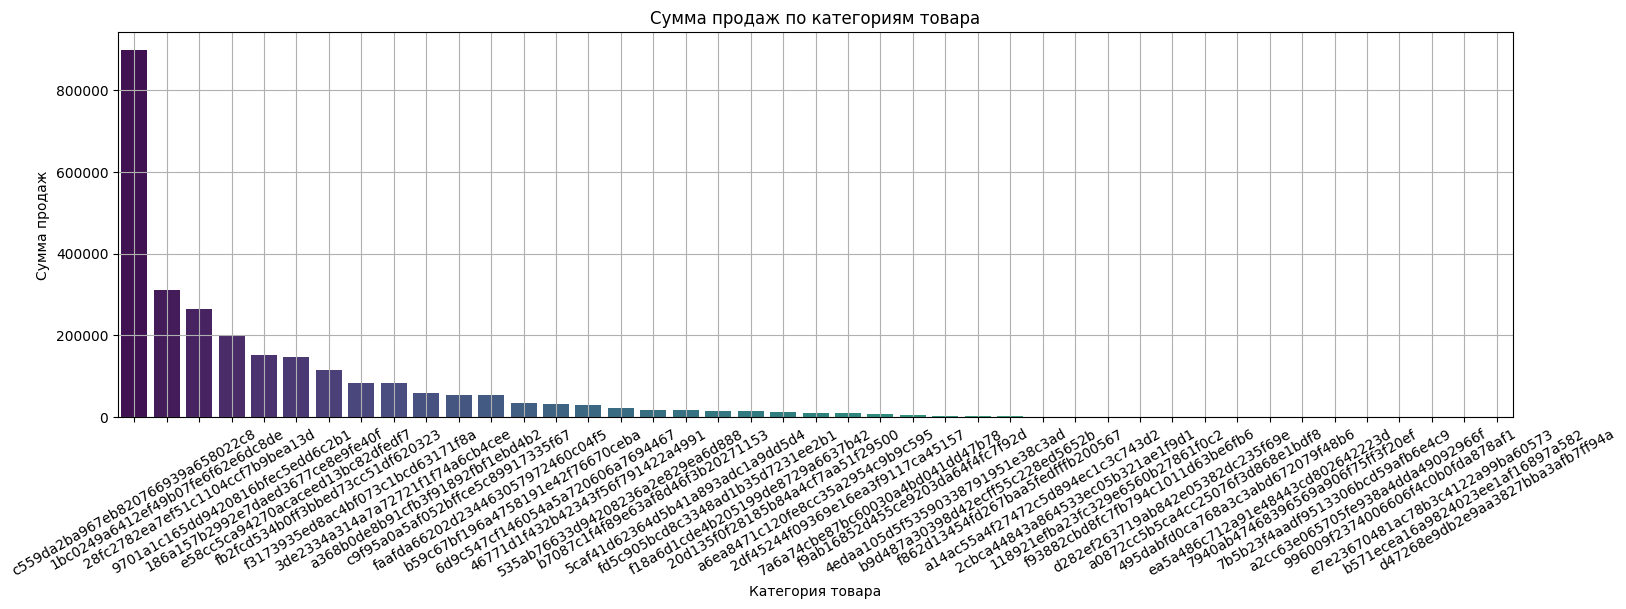

In [103]:
# категории
pivot_table = activ_store.pivot_table(index=['category'],
                                      values=['sales_units'],
                                      aggfunc=[np.mean, len, sum]
                                      ).sort_values(by=('sum', 'sales_units'), ascending=False)
plt.figure(figsize=(18, 5))
sns.barplot(x=pivot_table.index, y=('sum', 'sales_units'), data=pivot_table, palette="viridis")

plt.title('Сумма продаж по категориям товара')
plt.xlabel('Категория товара')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=30)
plt.grid(True)

plt.show()

In [104]:
# подкатегории
activ_store.pivot_table(index=['subcategory'],
               values=['sales_units'],
               aggfunc=[np.mean, len, sum]
              ).sort_values(by=('len', 'sales_units'), ascending=False).round()

mean         len         sum
                                 sales_units sales_units sales_units
subcategory                                                         
e06f5ed77191826c212c30722f2cc5a2        15.0       22428      327731
c01c475ac8d447730ece97d846cc4f25         3.0       16697       50206
ca34f669ae367c87f0e75dcae0f61ee5         4.0       16074       59411
8afe22eeb3f3f68de994a3c60388858c         3.0       15637       41027
7a8aebb07d6e8ba9da453ec0f3f359a4         4.0       15230       54720
...                                      ...         ...         ...
16d222a5fac9d8d7a3ee790f9ee46af5        19.0           2          38
c6e0511febe73b0911198c2b79d27ec0         1.0           2           2
ce08fca7bb075a8acc942e3f575346b0         2.0           2           5
f586ff8517e916e591bc2afd108b732b         3.0           1           3
a4244e0fd6c2493b1393823d1abaec5b         2.0           1           2

[167 rows x 3 columns]

#### Продажи по типам магазинов

In [105]:
type_graph_list = ['type_format','loc','size','uom']

type_format    type_format
1     0.939216
2     0.051097
4     0.009687


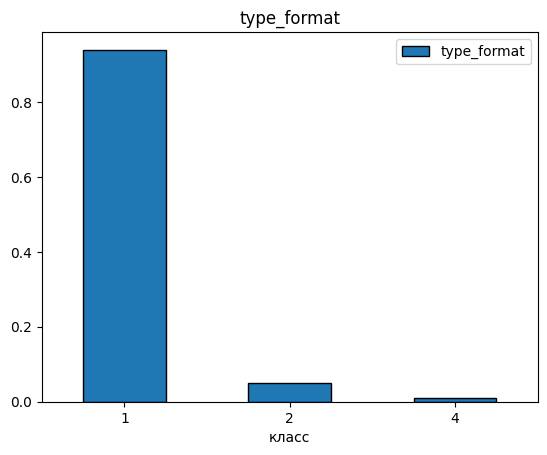

loc         loc
1  0.803798
2  0.186516
3  0.009687


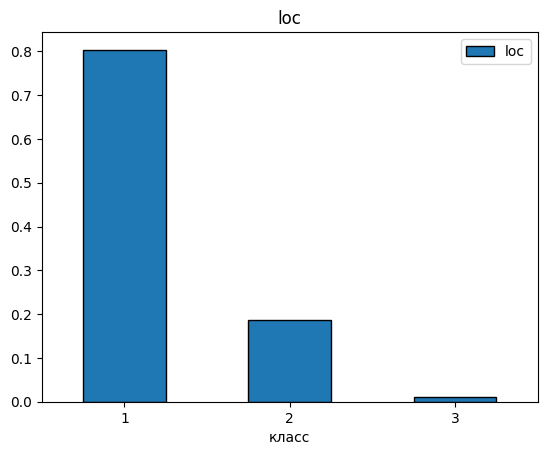

size         size
12  0.565579
8   0.373637
28  0.051097
20  0.007958
19  0.001729


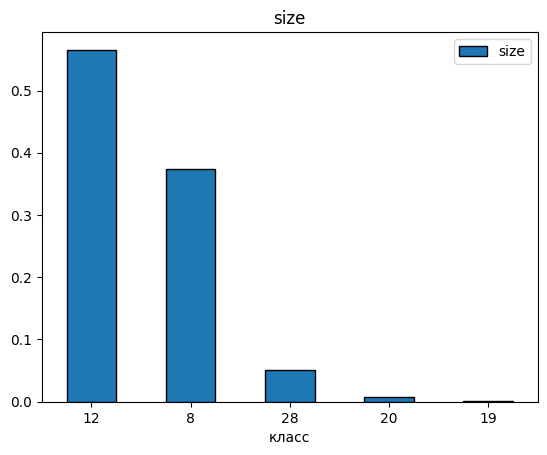

uom         uom
1  0.619303
0  0.380697


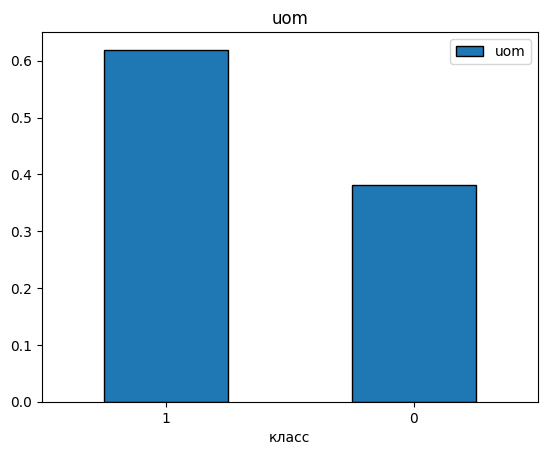

In [106]:
for column in type_graph_list:
    class_frequency = activ_store[column].value_counts(normalize= True).to_frame()
    print(f'{column}',class_frequency)
    ax = class_frequency.plot(kind='bar', rot=0, edgecolor='black', linewidth=1)
    ax.set_xlabel('класс')
    ax.set_title(f'{column}')
    plt.show()

##### Суммы продаж магазинов в рублях

In [107]:
activ_store.pivot_table(index=['sku'],
               values=['sales_rub'],
               aggfunc=[np.mean, len, sum]
              ).sort_values(by=('len', 'sales_rub'), ascending=False).sort_values(by=('sum', 'sales_rub'), ascending=False).round()

mean       len         sum
                                 sales_rub sales_rub   sales_rub
sku                                                             
c0e3f3bd815a862433bc3399c487926b    7560.0      1639  12390585.0
c7b711619071c92bef604c7ad68380dd    2609.0      1843   4807865.0
67797f1f0f02ec5ccd5e3abd2d4e5b81    2603.0      1691   4401548.0
ced0c1a84924c982a6403870c54b99ca    1318.0      2061   2716498.0
4695acecbef4734453cf9bc0be67ffe4    3830.0       684   2620036.0
...                                    ...       ...         ...
ac3a9c95767b01bdb4bdfdbec835b24b      33.0         1        33.0
9859c09401e6a000fb502c507afa866c      30.0         1        30.0
48bb4fc3b178d1131f477296faebf138      30.0         1        30.0
672981bfc413b6063b1dcbb8c1a39e61      27.0         1        27.0
ed13e9303dfe637db6d4a327534f72b4      16.0         1        16.0

[1946 rows x 3 columns]

##### Продажи по локациям

In [108]:
# сделаем группировку и агрегацию по локациям магазинов
grouped = activ_store.groupby('loc')
st_type_loc = grouped[['sales_units', 'sales_rub']].agg(['sum'])
# сорртировака по сумме
st_type_loc_sorted = st_type_loc.sort_values(by=('sales_units', 'sum'), ascending=False)
st_type_loc_sorted

sales_units    sales_rub
            sum          sum
loc                         
1       2103264  211728824.0
2        551323   54449786.0
3         11032     600371.0

##### Продажи по размерам

In [109]:
# сделаем группировку и агрегацию по размерам магазинов
grouped = activ_store.groupby('size')
st_type_size = grouped[['sales_units', 'sales_rub']].agg(['sum'])
# сорртировака по сумме
st_type_size_sorted = st_type_size.sort_values(by=('sales_units', 'sum'), ascending=False)
st_type_size_sorted

sales_units    sales_rub
             sum          sum
size                         
12       1452064  148260566.0
8        1121617  112459747.0
28         80906    5458297.0
20          9298     520370.0
19          1734      80001.0

##### Продажи по форматам

In [110]:
# сделаем группировку и агрегацию по локациям магазинов
grouped = activ_store.groupby('type_format')
st_type_format = grouped[['sales_units', 'sales_rub']].agg(['sum'])
# сорртировака по сумме
st_type_format_sorted = st_type_format.sort_values(by=('sales_units', 'sum'), ascending=False)
st_type_format_sorted

sales_units    sales_rub
                    sum          sum
type_format                         
1               2573681  260720313.0
2                 80906    5458297.0
4                 11032     600371.0

#### Добавим признаки - **доли продаж** в штуках и в рублях для каждого **sku**

In [111]:
# перебор по магазинам
columns_to_process_sku = ['store', 'sku','year', 'weekday', 'month',
                              'division', 'city', 'type_format', 'loc','size']
#Добавим доли продаж товаров по магазинам в шт
activ_store = sales_share(activ_store, 'sales_units', 'sku_unit', columns_to_process_sku)
#Добавим доли продаж товаров по магазинам в rub
activ_store = sales_share(activ_store, 'sales_rub', 'sku_rub', columns_to_process_sku)

In [112]:
activ_store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 523495 entries, 2022-08-01 to 2023-07-18
Data columns (total 49 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   store                             523495 non-null  object 
 1   sku                               523495 non-null  object 
 2   sales_units                       523495 non-null  int64  
 3   sales_rub                         523495 non-null  float64
 4   group                             523495 non-null  object 
 5   category                          523495 non-null  object 
 6   subcategory                       523495 non-null  object 
 7   uom                               523495 non-null  int64  
 8   division                          523495 non-null  object 
 9   city                              523495 non-null  object 
 10  type_format                       523495 non-null  int64  
 11  loc                               52

#### Магазины
Сформируем списки:
- магазинов с самыми высокими продажами;
- магазинов в принципе;
- словарь для уникальных sku товаров для каждого магазина
- словарь для уникальных sku для каждой категории


In [113]:
# scu и магазин с самими высокими продажами в шт
#sku_st = activ_store[(activ_store['st_id'] == 'c81e728d9d4c2f636f067f89cc14862c') & (activ_store['pr_sku_id'] == '62d4af457ba2540ce0898a211c0cd17a')]
#sku_st.reset_index()

In [114]:
unique_count = activ_store['sku'].nunique()
print(f"Количество уникальных значений в столбце 'sku': {unique_count}")

Количество уникальных значений в столбце 'sku': 1946


In [115]:
top_st_list = activ_store['store'].unique().tolist()
top_st_list

['c81e728d9d4c2f636f067f89cc14862c',
 '42a0e188f5033bc65bf8d78622277c4e',
 '16a5cdae362b8d27a1d8f8c7b78b4330',
 'fa7cdfad1a5aaf8370ebeda47a1ff1c3',
 'f7e6c85504ce6e82442c770f7c8606f0',
 '6364d3f0f495b6ab9dcf8d3b5c6e0b01',
 '1ecfb463472ec9115b10c292ef8bc986',
 'bd470ca955d9497bbcb808e59952fffc',
 '53e19f3dbb211f20b20b45668303c1b6']

In [116]:
# словарь для уникальных sku для каждого магазина
unique_sku_counts = {}
for st in top_st_list:
    filtered_st = activ_store[activ_store['store'] == st]
    unique_count = filtered_st['sku'].nunique()
    unique_sku_counts[st] = unique_count

# сртируем словарь по убыванию
sorted_unique_sku_counts = dict(sorted(unique_sku_counts.items(), key=lambda item: item[1], reverse=True))

for st, unique_count in sorted_unique_sku_counts.items():
    print(f"Количество уникальных sku для store = {st}: {unique_count}")


Количество уникальных sku для store = c81e728d9d4c2f636f067f89cc14862c: 1046
Количество уникальных sku для store = 42a0e188f5033bc65bf8d78622277c4e: 995
Количество уникальных sku для store = 16a5cdae362b8d27a1d8f8c7b78b4330: 935
Количество уникальных sku для store = f7e6c85504ce6e82442c770f7c8606f0: 920
Количество уникальных sku для store = 6364d3f0f495b6ab9dcf8d3b5c6e0b01: 850
Количество уникальных sku для store = fa7cdfad1a5aaf8370ebeda47a1ff1c3: 788
Количество уникальных sku для store = 1ecfb463472ec9115b10c292ef8bc986: 248
Количество уникальных sku для store = 53e19f3dbb211f20b20b45668303c1b6: 100
Количество уникальных sku для store = bd470ca955d9497bbcb808e59952fffc: 66


In [117]:
list_cat = activ_store['category'].unique().tolist()

In [118]:
# словарь для уникальных sku для каждой категории
unique_sku_counts = {}

for cat in list_cat:
    filtered_cat = activ_store[activ_store['category'] == cat]
    unique_count = filtered_cat['sku'].nunique()
    unique_sku_counts[cat] = unique_count

# сортируем словарь по убыванию
sorted_unique_sku_counts = dict(sorted(unique_sku_counts.items(), key=lambda item: item[1], reverse=True))

for cat, unique_count in sorted_unique_sku_counts.items():
    print(f"Количество уникальных sku для category = {cat}: {unique_count}")

Количество уникальных sku для category = c559da2ba967eb820766939a658022c8: 242
Количество уникальных sku для category = 9701a1c165dd9420816bfec5edd6c2b1: 215
Количество уникальных sku для category = 1bc0249a6412ef49b07fe6f62e6dc8de: 206
Количество уникальных sku для category = 28fc2782ea7ef51c1104ccf7b9bea13d: 165
Количество уникальных sku для category = 46771d1f432b42343f56f791422a4991: 108
Количество уникальных sku для category = f3173935ed8ac4bf073c1bcd63171f8a: 103
Количество уникальных sku для category = e58cc5ca94270acaceed13bc82dfedf7: 95
Количество уникальных sku для category = a368b0de8b91cfb3f91892fbf1ebd4b2: 80
Количество уникальных sku для category = 3de2334a314a7a72721f1f74a6cb4cee: 77
Количество уникальных sku для category = fb2fcd534b0ff3bbed73cc51df620323: 69
Количество уникальных sku для category = 535ab76633d94208236a2e829ea6d888: 60
Количество уникальных sku для category = b7087c1f4f89e63af8d46f3b20271153: 43
Количество уникальных sku для category = b59c67bf196a47581

#### Группировка дата - магазин - scu - количество

In [119]:
# пропуски в процентах
def lost(data):
    if data.isna().sum().sum()>0:
        display(
            (round(data.isna().mean()*100,3))
            .to_frame()
            .rename(columns = {0:'Пропуски'})
            .query('Пропуски > 0')
            .sort_values(by = 'Пропуски', ascending = False)
            .style.background_gradient('coolwarm'))
    else:
        print('Пропусков нет')

In [120]:
lost(activ_store)

Пропусков нет


In [121]:
# группировка продаж по датам и магазинам
groop_day_activ_store = activ_store.groupby([pd.Grouper(freq='D'), 'store', 'sku'])['sales_units'].sum().reset_index()
groop_day_activ_store.head()

date                             store  \
0 2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
1 2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
2 2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
3 2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
4 2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   

                                sku  sales_units  
0  00661699f543753ec7e911a64b9fd2f6            1  
1  0094042bfeae507dc7f62acc8e5ed03a            4  
2  033013f94a18c066e8b3d610bed34bee            4  
3  04bbb07b1057b09d04209991f3eadd8f            1  
4  0570ab7d07a4f2587f1ad4c4ed77e333           14

### Кластеризация

In [122]:
# создадим копию данных
clast_activ_store=activ_store.copy()

In [123]:
# переведем столбцы в категориальные признаки
clast_activ_store['type_format'] = clast_activ_store['type_format'].astype('object')
clast_activ_store['loc'] = clast_activ_store['loc'].astype('object')
clast_activ_store['size'] = clast_activ_store['size'].astype('object')

In [124]:
# список числовых столбцов
numeric_columns = clast_activ_store.select_dtypes(include=['number']).columns

# переберем столбцы и преобразуем их в 'category', если они не являются числовыми
for column in clast_activ_store.columns:
    if column not in numeric_columns:
        clast_activ_store[column] = clast_activ_store[column].astype('category')

In [125]:
# категориальные признаки
cat_features = clast_activ_store.select_dtypes(include='category').columns
cat_features

Index(['store', 'sku', 'group', 'category', 'subcategory', 'division', 'city',
       'type_format', 'loc', 'size'],
      dtype='object')

In [126]:
# численные признаки
num_features = clast_activ_store.select_dtypes(exclude='category').columns
num_features

Index(['sales_units', 'sales_rub', 'uom', 'year', 'month', 'day', 'weekday',
       'holiday', 'promo_part', 'price_units', 'sales_units_stand',
       'sales_rub_stand', 'price_units_stand', 'sales_share_group_unit',
       'sales_share_category_unit', 'sales_share_subcategory_unit',
       'sales_share_group_rub', 'sales_share_category_rub',
       'sales_share_subcategory_rub', 'sales_share_store_sku_unit',
       'sales_share_sku_sku_unit', 'sales_share_year_sku_unit',
       'sales_share_weekday_sku_unit', 'sales_share_month_sku_unit',
       'sales_share_division_sku_unit', 'sales_share_city_sku_unit',
       'sales_share_type_format_sku_unit', 'sales_share_loc_sku_unit',
       'sales_share_size_sku_unit', 'sales_share_store_sku_rub',
       'sales_share_sku_sku_rub', 'sales_share_year_sku_rub',
       'sales_share_weekday_sku_rub', 'sales_share_month_sku_rub',
       'sales_share_division_sku_rub', 'sales_share_city_sku_rub',
       'sales_share_type_format_sku_rub', 'sales_sha

In [127]:
# объекты для преобразования категориальных и числовых признаков
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# объект ColumnTransformer для комбинирования преобразований
preprocessor = make_column_transformer(
    (num_transformer, num_features),
    (cat_transformer, cat_features),
    remainder='passthrough'  # остальные столбцы без изменений
)

# получим преобразованные данные
kmeans_data = preprocessor.fit_transform(clast_activ_store)

In [128]:
%%time
#диапазон количества кластеров
#k_values = range(1, 21)
#inertias = []

# вычисление инерции для каждого значения количества кластеров
#for k in k_values:
#    kmeans = KMeans(n_clusters=k)
#    kmeans.fit(kmeans_data)  # Здесь замените 'X' на ваш датасет 'activ_store'
#    inertias.append(kmeans.inertia_)

# график инерции
#plt.figure(figsize=(18, 5))
#plt.plot(k_values, inertias, marker='o', linestyle='-')
#plt.xlabel('Количество кластеров')
#plt.ylabel('Инерция')
#plt.title('Определение оптимального количества кластеров')
#plt.show()

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs


Вывод:
- на основании анализа данных кластеризации будем рассматривать модель на 11 кластерах

#### Новые признаки на основании кластеризации

In [129]:
def clast_futures(data, name_col, name, columns_to_process):
    for column in columns_to_process:
        #new_column_name = f'avg_sales_by_{column}_{name}'
        data[f'avg_sales_by_{column}_{name}'] = data.groupby(column)[name_col].transform('mean')

    # средние продажи по выходным и праздникам в рублях/шт
    data[f'avg_holiday_sales_{name}'] = data[name_col] * data['holiday']
    return data

In [130]:
columns_to_process_cl = ['store', 'sku','year', 'weekday', 'month', 'category', 'subcategory',
                              'division', 'city', 'type_format', 'loc','size']
# средние продажи в рублях
clast_activ_store = clast_futures(clast_activ_store, 'sales_rub', 'rub', columns_to_process_cl)
# средние продажи в шт
clast_activ_store = clast_futures(clast_activ_store, 'sales_units', 'units', columns_to_process_cl)
clast_activ_store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 523495 entries, 2022-08-01 to 2023-07-18
Data columns (total 75 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   store                             523495 non-null  category
 1   sku                               523495 non-null  category
 2   sales_units                       523495 non-null  int64   
 3   sales_rub                         523495 non-null  float64 
 4   group                             523495 non-null  category
 5   category                          523495 non-null  category
 6   subcategory                       523495 non-null  category
 7   uom                               523495 non-null  int64   
 8   division                          523495 non-null  category
 9   city                              523495 non-null  category
 10  type_format                       523495 non-null  category
 11  loc                    

In [131]:
# группируем данные по 'sku' и 'store' и считаем сумму продаж
sku_sales_sum = clast_activ_store.groupby(['sku', 'store'])['sales_units'].sum().reset_index()
n_clusters = 11  # количество кластеров
# таблица с количеством продаж 'pr_sales_in_units'
X = sku_sales_sum[['sales_units']]
# KMeans с количеством кластеров
kmeans = KMeans(n_clusters=n_clusters)
# кластеризация
sku_sales_sum['cluster'] = kmeans.fit_predict(X)
# признаки для кластеризации
cluster_features = ['sales_units', 'avg_sales_by_store_units', 'avg_sales_by_sku_units',
                    'avg_sales_by_weekday_units', 'avg_sales_by_month_units', 'avg_holiday_sales_units']
# масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clast_activ_store[cluster_features])
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clast_activ_store['cluster'] = kmeans.fit_predict(X_scaled)
# соединим с исходной таблицей activ_store
clast_activ_store = clast_activ_store.reset_index().merge(sku_sales_sum[['sku', 'store', 'cluster']],\
                                                          on=['sku', 'store', 'cluster'], how='left').set_index('date')# обновленной таблицы
clast_activ_store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 523495 entries, 2022-08-01 to 2023-07-18
Data columns (total 76 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   store                             523495 non-null  category
 1   sku                               523495 non-null  category
 2   sales_units                       523495 non-null  int64   
 3   sales_rub                         523495 non-null  float64 
 4   group                             523495 non-null  category
 5   category                          523495 non-null  category
 6   subcategory                       523495 non-null  category
 7   uom                               523495 non-null  int64   
 8   division                          523495 non-null  category
 9   city                              523495 non-null  category
 10  type_format                       523495 non-null  category
 11  loc                    

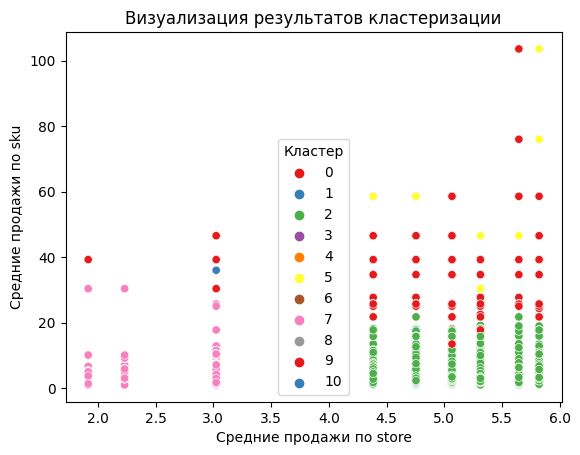

In [132]:
# диаграмма рассеяния для двух признаков
sns.scatterplot(data=clast_activ_store, x='avg_sales_by_store_units', y='avg_sales_by_sku_units', hue='cluster', palette='Set1')
plt.xlabel('Средние продажи по store')
plt.ylabel('Средние продажи по sku')
plt.title('Визуализация результатов кластеризации')
plt.legend(title='Кластер')
plt.show()

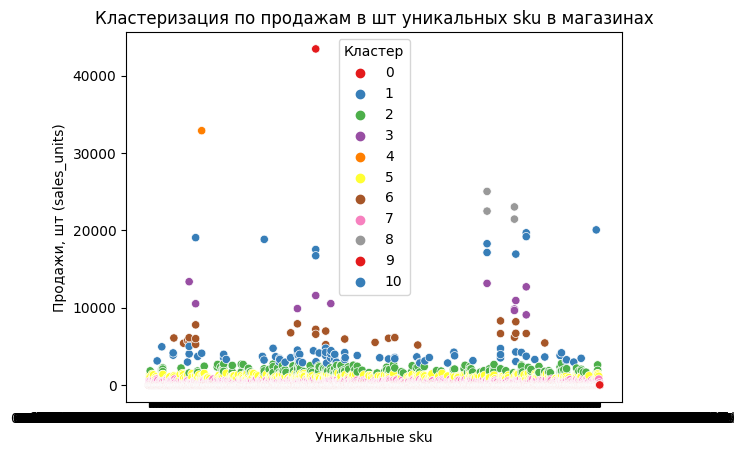

In [133]:
# scatter plot для кластеризации
sns.scatterplot(data=sku_sales_sum, y='sales_units', x='sku', hue='cluster', palette='Set1')
plt.ylabel('Продажи, шт (sales_units)')
plt.xlabel('Уникальные sku')
plt.title('Кластеризация по продажам в шт уникальных sku в магазинах')
plt.legend(title='Кластер')
plt.show()

#### Оценим статистики для кластеров

In [134]:
list_clast = np.sort(clast_activ_store['cluster'].unique())
list_clast

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [135]:
cluster_stats = {}

for clast in list_clast:
    cluster_data = clast_activ_store[clast_activ_store['cluster'] == clast]['sales_units'].describe().to_frame()
    cluster_stats[clast] = cluster_data

# Создаем DataFrame для всех статистик
combined_stats = pd.concat(cluster_stats, axis=1)

# Добавляем названия кластеров в качестве индекса
combined_stats.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
combined_stats

0            1              2            3             4   \
         sales_units  sales_units    sales_units  sales_units   sales_units   
count  123884.000000  2258.000000  107233.000000   317.000000  97305.000000   
mean        3.673880    64.603189       3.859157   180.709779      3.088844   
std         3.879296    19.100838       4.303876   130.313489      3.277322   
min         1.000000    35.000000       1.000000   109.000000      1.000000   
25%         1.000000    50.000000       1.000000   127.000000      1.000000   
50%         2.000000    60.000000       2.000000   146.000000      2.000000   
75%         4.000000    76.000000       4.000000   177.000000      4.000000   
max        51.000000   121.000000      59.000000  1033.000000     50.000000   

                5             6             7             8            9   \
       sales_units   sales_units   sales_units   sales_units  sales_units   
count  2081.000000  11798.000000  31146.000000  90808.000000  9947.000000   
mean     92.641999     22.694694      2.781063      3.577581    23.346135   
std      38.419873     11.412649      2.907313      3.514509    15.532305   
min      21.000000      7.000000      1.000000      1.000000     1.000000   
25%      67.000000     15.000000      1.000000      1.000000    11.000000   
50%      83.000000     19.000000      2.000000      2.000000    22.000000   
75%     110.000000     27.000000      4.000000      4.000000    33.000000   
max     383.000000     91.000000     62.000000     39.000000    73.000000   

                 10  
        sales_units  
count  46718.000000  
mean       4.038700  
std        4.240854  
min        1.000000  
25%        1.000000  
50%        3.000000  
75%        5.000000  
max       45.000000

In [136]:
clast_activ_store[(clast_activ_store['store'] == 'c81e728d9d4c2f636f067f89cc14862c') & (clast_activ_store['sku'] == '62d4af457ba2540ce0898a211c0cd17a')].head()

store  \
date                                           
2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
2022-08-02  c81e728d9d4c2f636f067f89cc14862c   
2022-08-03  c81e728d9d4c2f636f067f89cc14862c   
2022-08-04  c81e728d9d4c2f636f067f89cc14862c   
2022-08-05  c81e728d9d4c2f636f067f89cc14862c   

                                         sku  sales_units  sales_rub  \
date                                                                   
2022-08-01  62d4af457ba2540ce0898a211c0cd17a           89     1294.0   
2022-08-02  62d4af457ba2540ce0898a211c0cd17a           77     1118.0   
2022-08-03  62d4af457ba2540ce0898a211c0cd17a           70     1022.0   
2022-08-04  62d4af457ba2540ce0898a211c0cd17a           71     1031.0   
2022-08-05  62d4af457ba2540ce0898a211c0cd17a           86     1255.0   

                                       group  \
date                                           
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   
2022-08-02  c74d97b01eae257e44aa9d5bade97baf   
2022-08-03  c74d97b01eae257e44aa9d5bade97baf   
2022-08-04  c74d97b01eae257e44aa9d5bade97baf   
2022-08-05  c74d97b01eae257e44aa9d5bade97baf   

                                    category  \
date                                           
2022-08-01  c559da2ba967eb820766939a658022c8   
2022-08-02  c559da2ba967eb820766939a658022c8   
2022-08-03  c559da2ba967eb820766939a658022c8   
2022-08-04  c559da2ba967eb820766939a658022c8   
2022-08-05  c559da2ba967eb820766939a658022c8   

                                 subcategory  uom  \
date                                                
2022-08-01  e06f5ed77191826c212c30722f2cc5a2    0   
2022-08-02  e06f5ed77191826c212c30722f2cc5a2    0   
2022-08-03  e06f5ed77191826c212c30722f2cc5a2    0   
2022-08-04  e06f5ed77191826c212c30722f2cc5a2    0   
2022-08-05  e06f5ed77191826c212c30722f2cc5a2    0   

                                    division  \
date                                           
2022-08-01  429a86ff6336c144ddaf6144f52ab52c   
2022-08-02  429a86ff6336c144ddaf6144f52ab52c   
2022-08-03  429a86ff6336c144ddaf6144f52ab52c   
2022-08-04  429a86ff6336c144ddaf6144f52ab52c   
2022-08-05  429a86ff6336c144ddaf6144f52ab52c   

                                        city  ... avg_sales_by_month_units  \
date                                          ...                            
2022-08-01  908c9a564a86426585b29f5335b619bc  ...                 5.474063   
2022-08-02  908c9a564a86426585b29f5335b619bc  ...                 5.474063   
2022-08-03  908c9a564a86426585b29f5335b619bc  ...                 5.474063   
2022-08-04  908c9a564a86426585b29f5335b619bc  ...                 5.474063   
2022-08-05  908c9a564a86426585b29f5335b619bc  ...                 5.474063   

           avg_sales_by_category_units avg_sales_by_subcategory_units  \
date                                                                    
2022-08-01                    8.457461                      14.612582   
2022-08-02                    8.457461                      14.612582   
2022-08-03                    8.457461                      14.612582   
2022-08-04                    8.457461                      14.612582   
2022-08-05                    8.457461                      14.612582   

            avg_sales_by_division_units  avg_sales_by_city_units  \
date                                                               
2022-08-01                     5.221882                 5.221882   
2022-08-02                     5.221882                 5.221882   
2022-08-03                     5.221882                 5.221882   
2022-08-04                     5.221882                 5.221882   
2022-08-05                     5.221882                 5.221882   

            avg_sales_by_type_format_units  avg_sales_by_loc_units  \
date                                                                 
2022-08-01                        5.234517                4.998441   
2022-08-02                        5.234517                4.998441  

In [137]:
clast_activ_store[(clast_activ_store['sku'] == '62d4af457ba2540ce0898a211c0cd17a') & (clast_activ_store['cluster'] == 3)].head()

store  \
date                                           
2022-08-03  16a5cdae362b8d27a1d8f8c7b78b4330   
2022-08-05  16a5cdae362b8d27a1d8f8c7b78b4330   
2022-08-13  16a5cdae362b8d27a1d8f8c7b78b4330   
2022-08-14  16a5cdae362b8d27a1d8f8c7b78b4330   
2022-08-20  16a5cdae362b8d27a1d8f8c7b78b4330   

                                         sku  sales_units  sales_rub  \
date                                                                   
2022-08-03  62d4af457ba2540ce0898a211c0cd17a          124     1795.0   
2022-08-05  62d4af457ba2540ce0898a211c0cd17a          167     2419.0   
2022-08-13  62d4af457ba2540ce0898a211c0cd17a          155     2244.0   
2022-08-14  62d4af457ba2540ce0898a211c0cd17a          132     1920.0   
2022-08-20  62d4af457ba2540ce0898a211c0cd17a          240     3484.0   

                                       group  \
date                                           
2022-08-03  c74d97b01eae257e44aa9d5bade97baf   
2022-08-05  c74d97b01eae257e44aa9d5bade97baf   
2022-08-13  c74d97b01eae257e44aa9d5bade97baf   
2022-08-14  c74d97b01eae257e44aa9d5bade97baf   
2022-08-20  c74d97b01eae257e44aa9d5bade97baf   

                                    category  \
date                                           
2022-08-03  c559da2ba967eb820766939a658022c8   
2022-08-05  c559da2ba967eb820766939a658022c8   
2022-08-13  c559da2ba967eb820766939a658022c8   
2022-08-14  c559da2ba967eb820766939a658022c8   
2022-08-20  c559da2ba967eb820766939a658022c8   

                                 subcategory  uom  \
date                                                
2022-08-03  e06f5ed77191826c212c30722f2cc5a2    0   
2022-08-05  e06f5ed77191826c212c30722f2cc5a2    0   
2022-08-13  e06f5ed77191826c212c30722f2cc5a2    0   
2022-08-14  e06f5ed77191826c212c30722f2cc5a2    0   
2022-08-20  e06f5ed77191826c212c30722f2cc5a2    0   

                                    division  \
date                                           
2022-08-03  296bd0cc6e735f9d7488ebc8fbc19130   
2022-08-05  296bd0cc6e735f9d7488ebc8fbc19130   
2022-08-13  296bd0cc6e735f9d7488ebc8fbc19130   
2022-08-14  296bd0cc6e735f9d7488ebc8fbc19130   
2022-08-20  296bd0cc6e735f9d7488ebc8fbc19130   

                                        city  ... avg_sales_by_month_units  \
date                                          ...                            
2022-08-03  c1f75cc0f7fe269dd0fd9bd5e24f9586  ...                 5.474063   
2022-08-05  c1f75cc0f7fe269dd0fd9bd5e24f9586  ...                 5.474063   
2022-08-13  c1f75cc0f7fe269dd0fd9bd5e24f9586  ...                 5.474063   
2022-08-14  c1f75cc0f7fe269dd0fd9bd5e24f9586  ...                 5.474063   
2022-08-20  c1f75cc0f7fe269dd0fd9bd5e24f9586  ...                 5.474063   

           avg_sales_by_category_units avg_sales_by_subcategory_units  \
date                                                                    
2022-08-03                    8.457461                      14.612582   
2022-08-05                    8.457461                      14.612582   
2022-08-13                    8.457461                      14.612582   
2022-08-14                    8.457461                      14.612582   
2022-08-20                    8.457461                      14.612582   

            avg_sales_by_division_units  avg_sales_by_city_units  \
date                                                               
2022-08-03                     5.275925                 5.646487   
2022-08-05                     5.275925                 5.646487   
2022-08-13                     5.275925                 5.646487   
2022-08-14                     5.275925                 5.646487   
2022-08-20                     5.275925                 5.646487   

            avg_sales_by_type_format_units  avg_sales_by_loc_units  \
date                                                                 
2022-08-03                        5.234517                5.646487   
2022-08-05                        5.234517                5.646487  

## Сравним продажи выбранного scu в магазине с продажами его кластера

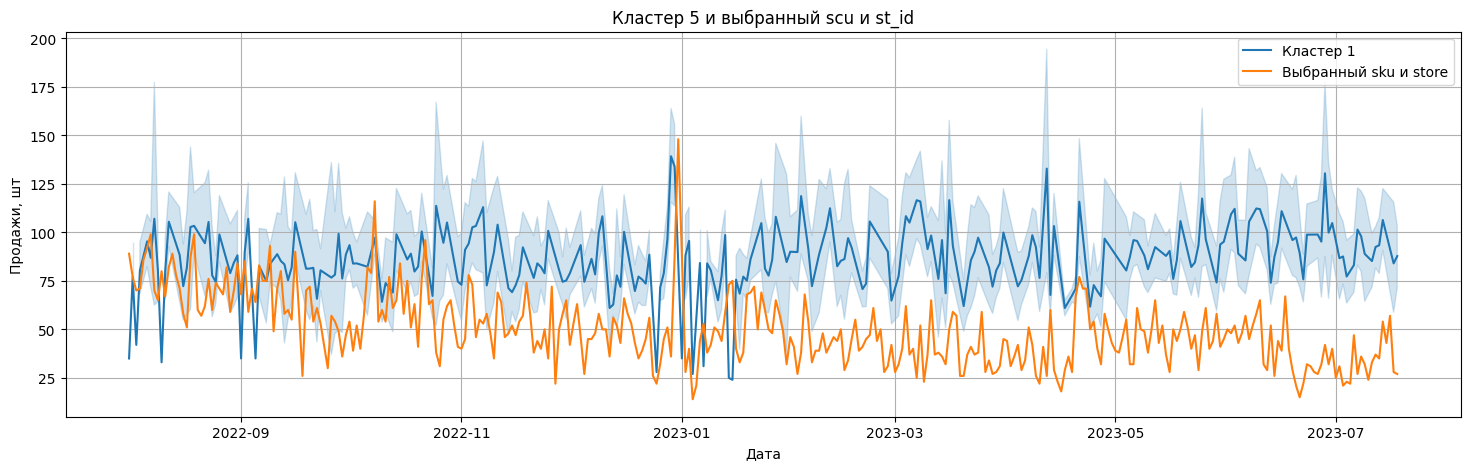

In [138]:
plt.figure(figsize=(18, 5))
# фильтруем данные для выбранного кластера
filtered_data_cl = clast_activ_store[clast_activ_store['cluster'] == 5]
filtered_data_scu = clast_activ_store[(clast_activ_store['sku'] == '62d4af457ba2540ce0898a211c0cd17a') & (clast_activ_store['store'] == 'c81e728d9d4c2f636f067f89cc14862c')]

sns.lineplot(data=filtered_data_cl, x=filtered_data_cl.index, y='sales_units', label='Кластер 1')
sns.lineplot(data=filtered_data_scu, x=filtered_data_scu.index, y='sales_units', label='Выбранный sku и store')

plt.xlabel("Дата")
plt.ylabel("Продажи, шт")
plt.title('Кластер 5 и выбранный scu и st_id')
plt.grid(True)

plt.legend()
plt.show()

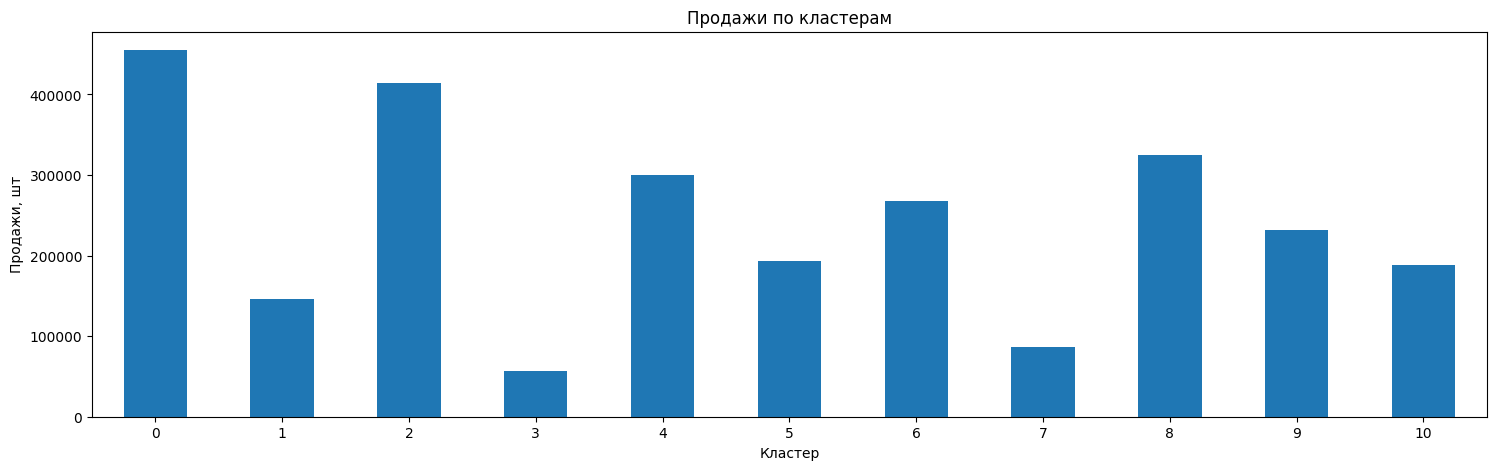

In [139]:
# группируем данные по столбцу 'cluster' и считаем сумму продаж
cluster_sales = clast_activ_store.groupby('cluster')['sales_units'].sum()

# график
plt.figure(figsize=(18, 5))
cluster_sales.plot(kind='bar')
plt.xlabel('Кластер')
plt.ylabel('Продажи, шт')
plt.title('Продажи по кластерам')
plt.xticks(rotation=0)
plt.show()

### Ресемплинг по кластерам

In [140]:
clast_activ_store.head(3)

store  \
date                                           
2022-08-01  c81e728d9d4c2f636f067f89cc14862c   
2022-08-01  42a0e188f5033bc65bf8d78622277c4e   
2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   

                                         sku  sales_units  sales_rub  \
date                                                                   
2022-08-01  a26de72f8ea9889b7332ed5f940d8b62           21      462.0   
2022-08-01  dce1f234d6424aa61f8e7ce0baffd9af            6      860.0   
2022-08-01  3f33017a9ce4fbff701facaeae7a7549            1       65.0   

                                       group  \
date                                           
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   
2022-08-01  aab3238922bcc25a6f606eb525ffdc56   
2022-08-01  c74d97b01eae257e44aa9d5bade97baf   

                                    category  \
date                                           
2022-08-01  c559da2ba967eb820766939a658022c8   
2022-08-01  9701a1c165dd9420816bfec5edd6c2b1   
2022-08-01  1bc0249a6412ef49b07fe6f62e6dc8de   

                                 subcategory  uom  \
date                                                
2022-08-01  e06f5ed77191826c212c30722f2cc5a2    0   
2022-08-01  c01c475ac8d447730ece97d846cc4f25    1   
2022-08-01  ca34f669ae367c87f0e75dcae0f61ee5    0   

                                    division  \
date                                           
2022-08-01  429a86ff6336c144ddaf6144f52ab52c   
2022-08-01  da742b3cfca5388aaf9af28a726a3c30   
2022-08-01  296bd0cc6e735f9d7488ebc8fbc19130   

                                        city  ... avg_sales_by_month_units  \
date                                          ...                            
2022-08-01  908c9a564a86426585b29f5335b619bc  ...                 5.474063   
2022-08-01  b8b4b727d6f5d1b61fff7be687f7970f  ...                 5.474063   
2022-08-01  c1f75cc0f7fe269dd0fd9bd5e24f9586  ...                 5.474063   

           avg_sales_by_category_units avg_sales_by_subcategory_units  \
date                                                                    
2022-08-01                    8.457461                      14.612582   
2022-08-01                    2.857088                       3.006887   
2022-08-01                    4.552009                       3.696093   

            avg_sales_by_division_units  avg_sales_by_city_units  \
date                                                               
2022-08-01                     5.221882                 5.221882   
2022-08-01                     4.756012                 4.756012   
2022-08-01                     5.275925                 5.646487   

            avg_sales_by_type_format_units  avg_sales_by_loc_units  \
date                                                                 
2022-08-01                        5.234517                4.998441   
2022-08-01                        5.234517                4.998441   
2022-08-01                        5.234517                5.646487   

            avg_sales_by_size_units  avg_holiday_sales_units  cluster  
date                                                                   
2022-08-01                 5.734326                       21        6  
2022-08-01                 4.904329                        6       10  
2022-08-01                 5.734326                        1       10  

[3 rows x 76 columns]

In [141]:
claster_df = clast_activ_store.copy()

In [142]:
claster_df = claster_df.drop(['sales_units', 'sales_rub', 'sales_rub_stand',
       'sales_units_stand', 'store', 'sku', 'group',
       'category', 'subcategory', 'uom', 'division', 'city',
        'year','month','day','weekday','holiday', 'type_format','loc','size'], axis=1)

In [143]:
claster_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 523495 entries, 2022-08-01 to 2023-07-18
Data columns (total 56 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   promo_part                        523495 non-null  float64
 1   price_units                       523495 non-null  float64
 2   price_units_stand                 523495 non-null  float64
 3   sales_share_group_unit            523495 non-null  float64
 4   sales_share_category_unit         523495 non-null  float64
 5   sales_share_subcategory_unit      523495 non-null  float64
 6   sales_share_group_rub             523495 non-null  float64
 7   sales_share_category_rub          523495 non-null  float64
 8   sales_share_subcategory_rub       523495 non-null  float64
 9   sales_share_store_sku_unit        523495 non-null  float64
 10  sales_share_sku_sku_unit          523495 non-null  float64
 11  sales_share_year_sku_unit         52

In [144]:
claster_df_0 = claster_df[(claster_df['cluster'] == 0)]
claster_df_0.head()

promo_part  price_units  price_units_stand  \
date                                                     
2022-09-01       0.300       105.00          -0.240181   
2022-09-01       0.169        57.33          -0.616635   
2022-09-01       0.065       181.00           0.359998   
2022-09-01       0.081       255.50           0.948330   
2022-09-01       0.145        38.50          -0.765337   

            sales_share_group_unit  sales_share_category_unit  \
date                                                            
2022-09-01                0.000885                   0.003509   
2022-09-01                0.000516                   0.000665   
2022-09-01                0.000885                   0.003509   
2022-09-01                0.000885                   0.001078   
2022-09-01                0.000885                   0.000157   

            sales_share_subcategory_unit  sales_share_group_rub  \
date                                                              
2022-09-01                      0.002170               0.000006   
2022-09-01                      0.000431               0.000011   
2022-09-01                      0.002170               0.000006   
2022-09-01                      0.000901               0.000006   
2022-09-01                      0.000110               0.000006   

            sales_share_category_rub  sales_share_subcategory_rub  \
date                                                                
2022-09-01                  0.000034                 2.111368e-05   
2022-09-01                  0.000016                 1.011747e-05   
2022-09-01                  0.000034                 2.111368e-05   
2022-09-01                  0.000007                 8.720492e-06   
2022-09-01                  0.000001                 7.938113e-07   

            sales_share_store_sku_unit  ...  avg_sales_by_month_units  \
date                                    ...                             
2022-09-01                    0.002195  ...                  5.163062   
2022-09-01                    0.001696  ...                  5.163062   
2022-09-01                    0.002195  ...                  5.163062   
2022-09-01                    0.002195  ...                  5.163062   
2022-09-01                    0.001834  ...                  5.163062   

            avg_sales_by_category_units  avg_sales_by_subcategory_units  \
date                                                                      
2022-09-01                     2.601944                        2.968098   
2022-09-01                     4.552009                        4.488647   
2022-09-01                     2.601944                        2.968098   
2022-09-01                     2.857088                        3.269649   
2022-09-01                    10.375127                       12.313300   

            avg_sales_by_division_units  avg_sales_by_city_units  \
date                                                               
2022-09-01                     5.313372                 5.313372   
2022-09-01                     5.275925                 5.646487   
2022-09-01                     5.313372                 5.313372   
2022-09-01                     5.313372                 5.313372   
2022-09-01                     5.221882                 5.221882   

            avg_sales_by_type_format_units  avg_sales_by_loc_units  \
date                                                                 
2022-09-01                        5.234517                4.998441   
2022-09-01                        5.234517                5.646487   
2022-09-01                        5.234517                4.998441   
2022-09-01                        5.234517                4.998441   
2022-09-01                        5.234517                4.998441   

            avg_sales_by_size_units  avg_holiday_sales_units  cluster  
date                                                                   
2022-09-01                 4.904329          

In [145]:
# ресемплинг по дням
claster_df_0.index = pd.to_datetime(claster_df_0.index)
claster_df_0_resampled = claster_df_0.resample('D').sum()

In [146]:
claster_df_0_resampled.reset_index()

date  promo_part  price_units  price_units_stand  \
0   2022-09-01     163.383     86872.88          -6.912459   
1   2022-09-02     184.238     95593.85         -13.967841   
2   2022-09-03     229.420    113767.57          54.695338   
3   2022-09-04       0.000         0.00           0.000000   
4   2022-09-05     190.691     92506.32          -1.991577   
..         ...         ...          ...                ...   
268 2023-05-27       0.000         0.00           0.000000   
269 2023-05-28     216.436    112601.86         105.374636   
270 2023-05-29     229.325    111030.88          30.944709   
271 2023-05-30     220.735    113602.21          57.666977   
272 2023-05-31     225.126    118373.48          82.513607   

     sales_share_group_unit  sales_share_category_unit  \
0                  0.577014                   0.713569   
1                  0.586348                   0.744424   
2                  0.635919                   0.747244   
3                  0.000000                   0.000000   
4                  0.565928                   0.684480   
..                      ...                        ...   
268                0.000000                   0.000000   
269                0.664271                   0.893108   
270                0.666777                   0.804908   
271                0.684052                   0.803451   
272                0.677470                   0.814817   

     sales_share_subcategory_unit  sales_share_group_rub  \
0                        0.809616               0.006203   
1                        0.812793               0.006058   
2                        0.812347               0.006421   
3                        0.000000               0.000000   
4                        0.940643               0.005589   
..                            ...                    ...   
268                      0.000000               0.000000   
269                      1.015592               0.006179   
270                      0.909073               0.006406   
271                      0.891702               0.006433   
272                      0.894598               0.006504   

     sales_share_category_rub  sales_share_subcategory_rub  ...  \
0                    0.007824                     0.009100  ...   
1                    0.007996                     0.009692  ...   
2                    0.007778                     0.008753  ...   
3                    0.000000                     0.000000  ...   
4                    0.007034                     0.010464  ...   
..                        ...                          ...  ...   
268                  0.000000                     0.000000  ...   
269                  0.008527                     0.009587  ...   
270                  0.008067                     0.009546  ...   
271                  0.008026                     0.009356  ...   
272                  0.008007                     0.009059  ...   

     avg_sales_by_month_units  avg_sales_by_category_units  \
0                 3345.664119                  3159.713193   
1                 3712.241515                  3709.248210   
2                 4073.655849                  4084.388563   
3                    0.000000                     0.000000   
4                 3536.697410                  3455.664184   
..                        ...                          ...   
268                  0.000000                     0.000000   
269               3617.182621                  3679.401900   
270               3903.398981                  4006.142684   
271               3873.790392                  4006.061787   
272               3933.007570                  4049.381001   

     avg_sales_by_subcategory_units  avg_sales_by_division_units  \
0                       2934.203719                  3416.649315   
1                       3475.556418                  3790.941282   
2                       3903.460041                  4159.105389   
3                        

## 4. Построение и обучение модели:

## Обучение и тестирование моделей

In [147]:
classic_activ_store = clast_activ_store.copy()

In [148]:
# топ товаров - sku
['62d4af457ba2540ce0898a211c0cd17a',
 'c0e3f3bd815a862433bc3399c487926b',
 'ced0c1a84924c982a6403870c54b99ca',
 'd5bfeecaaa47887a4b92d17fa55c2e18',
 'cf91eca9321c9c272fb4e7cf4bcc6a43',
 '1d2448c22721c94bb0264cf52598522f',
 '20d9b4bfd4b672f61d87f420856aac5d',
 '1a0f36f6e92560bcae205b6c32cc033f',
 '5aa2f6e00873f8c90b00cd15d670daa1',
 'c7b711619071c92bef604c7ad68380dd']

['62d4af457ba2540ce0898a211c0cd17a',
 'c0e3f3bd815a862433bc3399c487926b',
 'ced0c1a84924c982a6403870c54b99ca',
 'd5bfeecaaa47887a4b92d17fa55c2e18',
 'cf91eca9321c9c272fb4e7cf4bcc6a43',
 '1d2448c22721c94bb0264cf52598522f',
 '20d9b4bfd4b672f61d87f420856aac5d',
 '1a0f36f6e92560bcae205b6c32cc033f',
 '5aa2f6e00873f8c90b00cd15d670daa1',
 'c7b711619071c92bef604c7ad68380dd']

In [149]:
#магазины - store
['c81e728d9d4c2f636f067f89cc14862c',
 '16a5cdae362b8d27a1d8f8c7b78b4330',
 'f7e6c85504ce6e82442c770f7c8606f0',
 '42a0e188f5033bc65bf8d78622277c4e',
 'fa7cdfad1a5aaf8370ebeda47a1ff1c3',
 '6364d3f0f495b6ab9dcf8d3b5c6e0b01',
 '1ecfb463472ec9115b10c292ef8bc986',
 '53e19f3dbb211f20b20b45668303c1b6',
 'bd470ca955d9497bbcb808e59952fffc']

['c81e728d9d4c2f636f067f89cc14862c',
 '16a5cdae362b8d27a1d8f8c7b78b4330',
 'f7e6c85504ce6e82442c770f7c8606f0',
 '42a0e188f5033bc65bf8d78622277c4e',
 'fa7cdfad1a5aaf8370ebeda47a1ff1c3',
 '6364d3f0f495b6ab9dcf8d3b5c6e0b01',
 '1ecfb463472ec9115b10c292ef8bc986',
 '53e19f3dbb211f20b20b45668303c1b6',
 'bd470ca955d9497bbcb808e59952fffc']

### Модель "CatBoost Regressor"

In [150]:
df = clast_activ_store.copy()

In [151]:
# создадим модель
model_cbr = CatBoostRegressor(random_state=RANDOM_STATE,
                              verbose=False,
                              cat_features=['group', 'category', 'subcategory', 'division',
                                            'city', 'type_format', 'loc', 'size'])
# лучшие параметры
best_parameters_cbr = [
    {'bagging_temperature': [0.6],
     'depth': [6],
     'iterations': [100],
     #'l2_leaf_reg': [5],
     'learning_rate': [0.1],
     'random_strength': [1.0],
     'verbose': [False]}]

Функция обучения и тестирования модели

In [192]:
def train_model(df, store, sku):
    sku_st = df[(df['store'] == store) & (df['sku'] == sku)]

    # дата начала тестовой выборки (последние 14 дней)
    test_end_date = sku_st.index.max()

    # делим на трейн и тест
    train_df = sku_st[sku_st.index < test_end_date - pd.DateOffset(days=14)]
    test_df = sku_st[(sku_st.index >= test_end_date - pd.DateOffset(days=14)) & (sku_st.index <= test_end_date)]

    # признаки (X) и целевая переменная (y)
    X_train = train_df.drop(['sales_units','sales_rub', 'sales_rub_stand', 'sales_units_stand', 'store', 'sku'], axis=1)
    y_train = train_df['sales_units_stand']

    X_test = test_df.drop(['sales_units','sales_rub', 'sales_rub_stand', 'sales_units_stand', 'store', 'sku'], axis=1)
    y_test = test_df['sales_units_stand']
    splits = TimeSeriesSplit(n_splits=(len(X_train) // 14))

    # модель
    grid_cbr = GridSearchCV(estimator=model_cbr, param_grid = best_parameters_cbr, cv=splits,
                            verbose=True, scoring='neg_root_mean_squared_error', n_jobs=-1)

    grid_cbr.fit(X_train, y_train)
    best_model_cbr = grid_cbr.best_estimator_
    feature_importances_cbr = best_model_cbr.feature_importances_
    return best_model_cbr,X_test, feature_importances_cbr

#### Функция CatBoost Regressor (обучение, тестирование, предсказание лучшей модели)

In [222]:
def make_predict_test(df, store, sku):
    sku_st = df[(df['store'] == store) & (df['sku'] == sku)]

    # дата начала тестовой выборки (последние 14 дней)
    test_end_date = sku_st.index.max()

    # делим на трейн и тест
    train_df = sku_st[sku_st.index < test_end_date - pd.DateOffset(days=14)]
    test_df = sku_st[(sku_st.index >= test_end_date - pd.DateOffset(days=14)) & (sku_st.index <= test_end_date)]

    # признаки (X) и целевая переменная (y)
    X_train = train_df.drop(['sales_units','sales_rub', 'sales_rub_stand', 'sales_units_stand', 'store', 'sku'], axis=1)
    y_train = train_df['sales_units_stand']

    X_test = test_df.drop(['sales_units','sales_rub', 'sales_rub_stand', 'sales_units_stand', 'store', 'sku'], axis=1)
    y_test = test_df['sales_units_stand']
    splits = TimeSeriesSplit(n_splits=(len(X_train) // 14))

    # модель
    grid_cbr = GridSearchCV(estimator=model_cbr, param_grid = best_parameters_cbr, cv=splits,
                            verbose=True, scoring='neg_root_mean_squared_error', n_jobs=-1)

    grid_cbr.fit(X_train, y_train)
    best_model_cbr = grid_cbr.best_estimator_

    predict_test_cbr = best_model_cbr.predict(X_test)

    predicted_df = pd.DataFrame({'prediction': predict_test_cbr}, index=y_test.index)
    predicted_df.reset_index(inplace=True)

    test_df = test_df.copy()
    test_df.reset_index(inplace=True)

    result_df = predicted_df.merge(test_df[['date', 'sales_units_stand']], on='date', how='inner')\
                                          [['date', 'prediction', 'sales_units_stand']]
    result_df[['prediction','sales_units']] = (result_df[['prediction', 'sales_units_stand']] \
                         .apply(lambda x: (x * sales_units_sd) + sales_units_mean)).round()
    result_df['wape'] = result_df.apply(lambda row: np.sum(np.abs(row['sales_units'] - row['prediction']))\
                                        / np.sum(np.abs(row['sales_units'])), axis=1)
    average_wape = result_df['wape'].mean()
    print(f"Среднее значение WAPE: {average_wape}")

    result_df = result_df.drop(['sales_units_stand'] , axis=1)
    pred_df = result_df[['date', 'sales_units', 'prediction', 'wape' ]]

    pred_sales_submission = pd.merge(pred_df, test_df, on=['date', 'sales_units'], how='left')
    pred_sales_submission = pred_sales_submission[['store', 'sku', 'date', 'prediction', 'sales_units', 'wape']]
    pred_sales_submission

    return pred_sales_submission

In [223]:
# создаем словарь, где ключ - это магазин, а значения - это все товары, которые имеются в магазине
#store_dict = df.groupby('st_id')['pr_sku_id'].apply(list).to_dict()
# собираем в список все магазины и товары
stores = df['store'].unique().tolist()
skus = df['sku'].unique().tolist()

#### Составим таблицу прогноза по всем магазинам.
> проверим метрику **WAPE** на тестовой выборке  по каждому магазину

In [224]:
start_time = time.time()
# пустой датафрейм для хранения всех результатов
result_df = pd.DataFrame()

# прогнозы для магазинов и товаров
sku_id_counter = 0  # счетчик проверенных sku
for st_id in stores:
    for pr_sku_id in skus:
        if sku_id_counter >= 1000:
            break  # остановим цикл после проверки 1000 sku
        # проверим есть ли пара st_id и sku в таблице df
        if ((df['store'] == st_id) & (df['sku'] == pr_sku_id)).any():
            # проверим сроки продаж для данной пары
            sales_data = df[(df['store'] == st_id) & (df['sku'] == pr_sku_id)]
            min_date = sales_data.index.min()  # начало продаж
            max_date = sales_data.index.max()  # конец продаж
            sales_duration = (max_date - min_date).days
            if sales_duration < 180:
                print(f"В магазине:{st_id} товар:{pr_sku_id} продавался менее 180 дней ({sales_duration} дней). Недостаточно данных для прогноза.")
            else:
                try:
                    df_1 = make_predict_test(df, st_id, pr_sku_id)
                    result_df = pd.concat([result_df, df_1], ignore_index=True)
                except Exception as e:
                    print(f"Ошибка при обработке st_id:{st_id}, pr_sku_id:{pr_sku_id}: {e}")
        else:
            print(f"В магазине:{st_id} товар:{pr_sku_id} не найден. Проверьте данные")
        sku_id_counter += 1  # счетчик

# результаты
display(result_df)
print(f"Время выполнения: {time.time() - start_time} секунд")

Fitting 21 folds for each of 1 candidates, totalling 21 fits
Среднее значение WAPE: 0.4151941722994355
Fitting 16 folds for each of 1 candidates, totalling 16 fits
Среднее значение WAPE: 0.4133089133089133
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Среднее значение WAPE: 0.14461342750816433
Fitting 19 folds for each of 1 candidates, totalling 19 fits
Среднее значение WAPE: 1.9375
Fitting 8 folds for each of 1 candidates, totalling 8 fits
Среднее значение WAPE: 0.8196248196248195
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Среднее значение WAPE: 0.2638888888888889
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Среднее значение WAPE: 0.0
Fitting 17 folds for each of 1 candidates, totalling 17 fits
Среднее значение WAPE: 0.2803030303030303
В магазине:c81e728d9d4c2f636f067f89cc14862c товар:f7797c89f0833cc91f84cd1740a4cbe5 не найден. Проверьте данные
В магазине:c81e728d9d4c2f636f067f89cc14862c товар:bd95f7b33a9959928bbacfc59a8b6e66 не найден. Про

store                               sku  \
0     c81e728d9d4c2f636f067f89cc14862c  a26de72f8ea9889b7332ed5f940d8b62   
1     c81e728d9d4c2f636f067f89cc14862c  a26de72f8ea9889b7332ed5f940d8b62   
2     c81e728d9d4c2f636f067f89cc14862c  a26de72f8ea9889b7332ed5f940d8b62   
3     c81e728d9d4c2f636f067f89cc14862c  a26de72f8ea9889b7332ed5f940d8b62   
4     c81e728d9d4c2f636f067f89cc14862c  a26de72f8ea9889b7332ed5f940d8b62   
...                                ...                               ...   
3933  c81e728d9d4c2f636f067f89cc14862c  e9da9f97fbe39e61f768b34fa06191fa   
3934  c81e728d9d4c2f636f067f89cc14862c  e9da9f97fbe39e61f768b34fa06191fa   
3935  c81e728d9d4c2f636f067f89cc14862c  e9da9f97fbe39e61f768b34fa06191fa   
3936  c81e728d9d4c2f636f067f89cc14862c  e9da9f97fbe39e61f768b34fa06191fa   
3937  c81e728d9d4c2f636f067f89cc14862c  e9da9f97fbe39e61f768b34fa06191fa   

           date  prediction  sales_units      wape  
0    2023-07-04         8.0          7.0  0.142857  
1    2023-07-05        12.0         14.0  0.142857  
2    2023-07-06        14.0          9.0  0.555556  
3    2023-07-07        12.0         14.0  0.142857  
4    2023-07-08         6.0          5.0  0.200000  
...         ...         ...          ...       ...  
3933 2023-07-09         1.0          1.0  0.000000  
3934 2023-07-10         8.0        121.0  0.933884  
3935 2023-07-11         1.0          1.0  0.000000  
3936 2023-07-12         2.0          1.0  1.000000  
3937 2023-07-15         3.0          3.0  0.000000  

[3938 rows x 6 columns]

Время выполнения: 781.7582221031189 секунд


In [225]:
print(f"Среднее значение WAPE: {result_df.wape.mean()}")

Среднее значение WAPE: 0.4685216168250296


#### Сравним данные прогноза и реальные данные на примере магазина с самыми хорошими продажами

In [236]:
%%time
# Создаем пустой датафрейм для хранения всех результатов
result_1s2s = pd.DataFrame()
stores2 = ['c81e728d9d4c2f636f067f89cc14862c','16a5cdae362b8d27a1d8f8c7b78b4330']
skus2 = ['62d4af457ba2540ce0898a211c0cd17a']
# считаем прогнозы для нужных магазинов и товаров
for st in stores2:
    for sku in skus2:
        try:
            df_1 = make_predict_test(df, st, sku)
            result_1s2s = pd.concat([result_1s2s, df_1], ignore_index=True)
        except Exception as e:
            print(f"Ошибка при обработке store:{st}, sku:{sku}: {e}")

display(result_1s2s)

Fitting 23 folds for each of 1 candidates, totalling 23 fits
Среднее значение WAPE: 0.17501521920508006
Fitting 24 folds for each of 1 candidates, totalling 24 fits
Среднее значение WAPE: 0.1392873422501147


store                               sku  \
0   c81e728d9d4c2f636f067f89cc14862c  62d4af457ba2540ce0898a211c0cd17a   
1   c81e728d9d4c2f636f067f89cc14862c  62d4af457ba2540ce0898a211c0cd17a   
2   c81e728d9d4c2f636f067f89cc14862c  62d4af457ba2540ce0898a211c0cd17a   
3   c81e728d9d4c2f636f067f89cc14862c  62d4af457ba2540ce0898a211c0cd17a   
4   c81e728d9d4c2f636f067f89cc14862c  62d4af457ba2540ce0898a211c0cd17a   
5   c81e728d9d4c2f636f067f89cc14862c  62d4af457ba2540ce0898a211c0cd17a   
6   c81e728d9d4c2f636f067f89cc14862c  62d4af457ba2540ce0898a211c0cd17a   
7   c81e728d9d4c2f636f067f89cc14862c  62d4af457ba2540ce0898a211c0cd17a   
8   c81e728d9d4c2f636f067f89cc14862c  62d4af457ba2540ce0898a211c0cd17a   
9   c81e728d9d4c2f636f067f89cc14862c  62d4af457ba2540ce0898a211c0cd17a   
10  c81e728d9d4c2f636f067f89cc14862c  62d4af457ba2540ce0898a211c0cd17a   
11  c81e728d9d4c2f636f067f89cc14862c  62d4af457ba2540ce0898a211c0cd17a   
12  c81e728d9d4c2f636f067f89cc14862c  62d4af457ba2540ce0898a211c0cd17a   
13  c81e728d9d4c2f636f067f89cc14862c  62d4af457ba2540ce0898a211c0cd17a   
14  c81e728d9d4c2f636f067f89cc14862c  62d4af457ba2540ce0898a211c0cd17a   
15  16a5cdae362b8d27a1d8f8c7b78b4330  62d4af457ba2540ce0898a211c0cd17a   
16  16a5cdae362b8d27a1d8f8c7b78b4330  62d4af457ba2540ce0898a211c0cd17a   
17  16a5cdae362b8d27a1d8f8c7b78b4330  62d4af457ba2540ce0898a211c0cd17a   
18  16a5cdae362b8d27a1d8f8c7b78b4330  62d4af457ba2540ce0898a211c0cd17a   
19  16a5cdae362b8d27a1d8f8c7b78b4330  62d4af457ba2540ce0898a211c0cd17a   
20  16a5cdae362b8d27a1d8f8c7b78b4330  62d4af457ba2540ce0898a211c0cd17a   
21  16a5cdae362b8d27a1d8f8c7b78b4330  62d4af457ba2540ce0898a211c0cd17a   
22  16a5cdae362b8d27a1d8f8c7b78b4330  62d4af457ba2540ce0898a211c0cd17a   
23  16a5cdae362b8d27a1d8f8c7b78b4330  62d4af457ba2540ce0898a211c0cd17a   
24  16a5cdae362b8d27a1d8f8c7b78b4330  62d4af457ba2540ce0898a211c0cd17a   
25  16a5cdae362b8d27a1d8f8c7b78b4330  62d4af457ba2540ce0898a211c0cd17a   
26  16a5cdae362b8d27a1d8f8c7b78b4330  62d4af457ba2540ce0898a211c0cd17a   
27  16a5cdae362b8d27a1d8f8c7b78b4330  62d4af457ba2540ce0898a211c0cd17a   
28  16a5cdae362b8d27a1d8f8c7b78b4330  62d4af457ba2540ce0898a211c0cd17a   
29  16a5cdae362b8d27a1d8f8c7b78b4330  62d4af457ba2540ce0898a211c0cd17a   

         date  prediction  sales_units      wape  
0  2023-07-04        32.0         23.0  0.391304  
1  2023-07-05        27.0         22.0  0.227273  
2  2023-07-06        30.0         47.0  0.361702  
3  2023-07-07        32.0         27.0  0.185185  
4  2023-07-08        29.0         36.0  0.194444  
5  2023-07-09        29.0         32.0  0.093750  
6  2023-07-10        25.0         24.0  0.041667  
7  2023-07-11        28.0         33.0  0.151515  
8  2023-07-12        30.0         37.0  0.189189  
9  2023-07-13        30.0         35.0  0.142857  
10 2023-07-14        32.0         54.0  0.407407  
11 2023-07-15        42.0         43.0  0.023256  
12 2023-07-16        53.0         57.0  0.070175  
13 2023-07-17        30.0         28.0  0.071429  
14 2023-07-18        29.0         27.0  0.074074  
15 2023-07-04       123.0         80.0  0.537500  
16 2023-07-05       125.0        117.0  0.068376  
17 2023-07-06       119.0        119.0  0.000000  
18 2023-07-07       127.0        124.0  0.024194  
19 2023-07-08       124.0        120.0  0.033333  
20 2023-07-09       123.0        109.0  0.128440  
21 2023-07-10       106.0        105.0  0.009524  
22 2023-07-11       114.0        103.0  0.106796  
23 2023-07-12       124.0        101.0  0.227723  
24 2023-07-13       112.0         92.0  0.217391  
25 2023-07-14       134.0        119.0  0.126050  
26 2023-07-15       138.0        137.0  0.007299  
27 2023-07-16       112.0        106.0  0.056604  
28 2023-07-17       100.0         66.0  0.515152  
29 2023-07-18       100.0         97.0  0.030928

CPU times: user 648 ms, sys: 38.6 ms, total: 687 ms
Wall time: 5.41 s


In [239]:
def graph_pred (data, target, prediction, store, name_store, sku, name_sku, name_model):
    plt.figure(figsize=(18, 5))
    # фильтруем данные для выбранного кластера
    filtered_data_pred = data[(data[store] == name_store) & (data[store] == name_store)]
    filtered_data_fact = data[(data[store] == name_store) & (data[store] == name_store)]
    sns.lineplot(data=data, x='date', y=prediction, label='Прогноз')
    sns.lineplot(data=data, x='date', y=target, label='Факт')
    plt.xlabel("Дата")
    plt.ylabel("Продажи, шт")
    plt.title(f'{name_model}')
    plt.grid(True)
    plt.legend()
    plt.show()

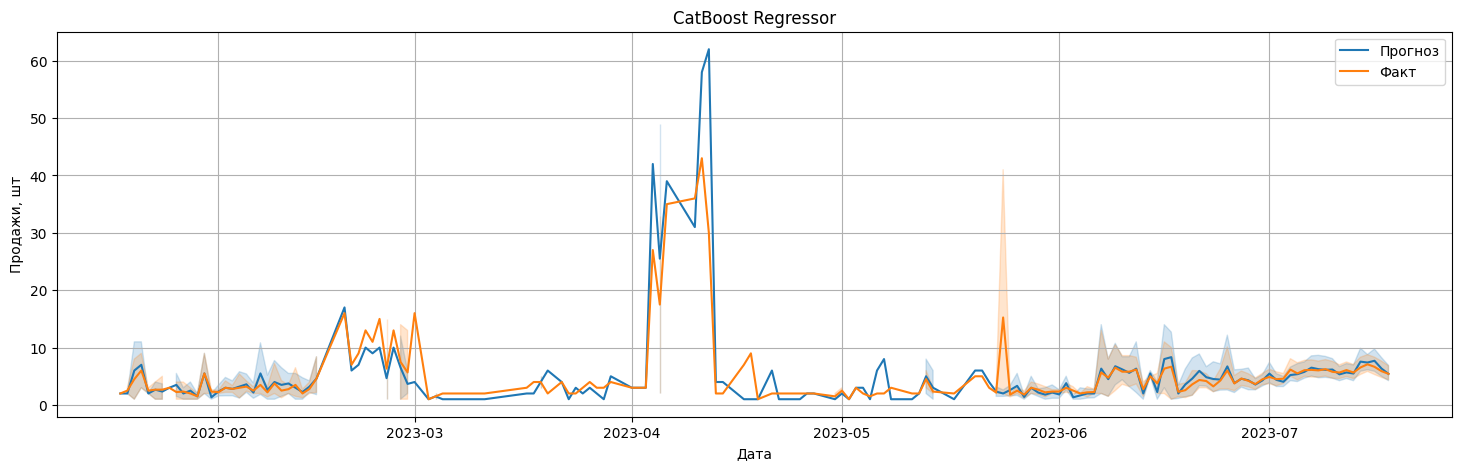

In [238]:
#Сравним данные прогноза и реальные данные на примере магазина с самыми хорошими продажами
store='c81e728d9d4c2f636f067f89cc14862c'
sku = '62d4af457ba2540ce0898a211c0cd17a'
graph_pred (result_df, 'prediction', 'sales_units', 'store', store, 'sku', sku, 'CatBoost Regressor')

In [237]:
print(f"Среднее значение WAPE: {result_1s2s.wape.mean()}")

Среднее значение WAPE: 0.15715128072759738


#### Функция для предсказания временного ряда на 2 недели вперед:

In [240]:
def make_predict(df, st_id, pr_sku_id):
    sku_st = df[(df['store'] == st_id) & (df['sku'] == pr_sku_id)]

# начальная дата для предсказаний (+1 день от последней даты в индексе sku_st)
    end_date = sku_st.index.max()
    pred_start_date = end_date + pd.DateOffset(days=1)
    pred_end_date = end_date + pd.DateOffset(days=14)  # +14 дней вперед

# признаки (X) и целевой признак (y)
    X_train = sku_st.drop(['sales_units','sales_rub', 'sales_rub_stand', 'sales_units_stand', 'store', 'sku'], axis=1)
    y_train = sku_st['sales_units_stand']

    last_two_week = sku_st[(sku_st.index >= end_date - pd.DateOffset(days=14)) & (sku_st.index < end_date)]
    X_last_two_week = last_two_week.drop(['sales_units','sales_rub', 'sales_rub_stand', 'sales_units_stand',  'store', 'sku'], axis=1)
    y_last_two_week = last_two_week['sales_units_stand']

# новые даты для предсказаний
    new_dates = pd.date_range(start=pred_start_date, end=pred_end_date)
    splits = TimeSeriesSplit(n_splits=(len(X_train) // 14))
# модель
    grid_cbr = GridSearchCV(
        estimator=model_cbr,
        param_grid=best_parameters_cbr,
        cv=splits,
        verbose=True,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1)
    grid_cbr.fit(X_train, y_train)
    best_model_cbr = grid_cbr.best_estimator_

# предсказания на 14 дней вперед последней даты
    X_pred = pd.DataFrame(index=new_dates, columns=X_train.columns)  # пустая таблица для предсказаний
    predictions = best_model_cbr.predict(X_last_two_week) # предсказания на последних 14 днях

# восстановление исходных значений (ранее они были стандартизированы для обучения)
    predict_cbr = ((predictions * sales_units_sd) + sales_units_mean).round(0)

# итоговая таблица
    predictions_df = pd.DataFrame({'st_id': st_id,
                                   'pr_sku_id': pr_sku_id,
                                   'date': new_dates,
                                   'target': predict_cbr})
    return predictions_df

#### Сделаем прогноз спроса по всем магазинам и по всем товарам

In [241]:
%%time
# пустой датафрейм для хранения всех результатов
result_df = pd.DataFrame()

# прогнозы для нужных магазинов и товаров
for st_id in stores:
    for pr_sku_id in skus:
        # данные для текущей пары st_id и pr_sku_id
        filtered_data = df[(df['store'] == st_id) & (df['sku'] == pr_sku_id)]

        # есть ли данные для этой пары
        if not filtered_data.empty:
            # срок продаж
            min_index = filtered_data.index.min()
            max_index = filtered_data.index.max()

            # преабразуем индексы
            if isinstance(min_index, str):
                min_index = pd.to_datetime(min_index)
            if isinstance(max_index, str):
                max_index = pd.to_datetime(max_index)

            date_diff = (max_index - min_index).days

            if date_diff < 180:
                print(f"В магазине:{st_id} товар:{pr_sku_id} продается: {date_diff} дней. Недостаточно данных продаж для прогноза.")
            else:
                try:
                    df_1 = make_predict(df, st_id, pr_sku_id)
                    result_df = pd.concat([result_df, df_1], ignore_index=True)
                except Exception as e:
                    print(f"Ошибка при обработке st_id:{st_id},sku:{pr_sku_id}: {e}")
        else:
            print(f"В магазине:{st_id} товар:{pr_sku_id} не найден")

# Выводим результаты
display(result_df)

Выходные данные были обрезаны до нескольких последних строк (5000).
В магазине:1ecfb463472ec9115b10c292ef8bc986 товар:4b347991609c79afe8bcb7e52d90790d не найден
В магазине:1ecfb463472ec9115b10c292ef8bc986 товар:6f83a5557686f8b5e0094aa024e7e579 не найден
В магазине:1ecfb463472ec9115b10c292ef8bc986 товар:6906f8e64f30c41425b966482fa652d5 не найден
В магазине:1ecfb463472ec9115b10c292ef8bc986 товар:e85301469c72e1e53e88e8c0a1b54834 не найден
В магазине:1ecfb463472ec9115b10c292ef8bc986 товар:8b1d869704614f55daae7cdab429d09d не найден
В магазине:1ecfb463472ec9115b10c292ef8bc986 товар:c27e58210244a3467ddbffd35cbda07f не найден
В магазине:1ecfb463472ec9115b10c292ef8bc986 товар:2467d1dcf883fcd3a21e4cf5eccb00bc не найден
В магазине:1ecfb463472ec9115b10c292ef8bc986 товар:9cf5204b6b8b2cb9ad3e4cea7e165dc9 не найден
В магазине:1ecfb463472ec9115b10c292ef8bc986 товар:b27734ac62f00e699f0c91e1e820c936 не найден
В магазине:1ecfb463472ec9115b10c292ef8bc986 товар:d160bb8bde6db6207082357dde22df3e не найден
В 

st_id                         pr_sku_id  \
0     c81e728d9d4c2f636f067f89cc14862c  a26de72f8ea9889b7332ed5f940d8b62   
1     c81e728d9d4c2f636f067f89cc14862c  a26de72f8ea9889b7332ed5f940d8b62   
2     c81e728d9d4c2f636f067f89cc14862c  a26de72f8ea9889b7332ed5f940d8b62   
3     c81e728d9d4c2f636f067f89cc14862c  a26de72f8ea9889b7332ed5f940d8b62   
4     c81e728d9d4c2f636f067f89cc14862c  a26de72f8ea9889b7332ed5f940d8b62   
...                                ...                               ...   
6505  53e19f3dbb211f20b20b45668303c1b6  c82dccf4ccf7017ba622a86f5dcbc736   
6506  53e19f3dbb211f20b20b45668303c1b6  c82dccf4ccf7017ba622a86f5dcbc736   
6507  53e19f3dbb211f20b20b45668303c1b6  c82dccf4ccf7017ba622a86f5dcbc736   
6508  53e19f3dbb211f20b20b45668303c1b6  c82dccf4ccf7017ba622a86f5dcbc736   
6509  53e19f3dbb211f20b20b45668303c1b6  c82dccf4ccf7017ba622a86f5dcbc736   

           date  target  
0    2023-07-19     8.0  
1    2023-07-20    13.0  
2    2023-07-21    11.0  
3    2023-07-22    12.0  
4    2023-07-23     6.0  
...         ...     ...  
6505 2023-07-28     2.0  
6506 2023-07-29     2.0  
6507 2023-07-30     1.0  
6508 2023-07-31     2.0  
6509 2023-08-01     2.0  

[6510 rows x 4 columns]

CPU times: user 11min 2s, sys: 1min 3s, total: 12min 6s
Wall time: 1h 13min 52s


### Оценка важности признаков

In [187]:
#по магазину с самым высоким уровнем продаж
store = 'c81e728d9d4c2f636f067f89cc14862c'
sku = '62d4af457ba2540ce0898a211c0cd17a'
best_model_cbr, X_test, feature_importances_cbr = train_model(df, store, sku)
# по магазину с низким уровнем продаж
store2 = '1ecfb463472ec9115b10c292ef8bc986'
sku2 = '62d4af457ba2540ce0898a211c0cd17a'
best_model_cbr2, X_test2, feature_importances_cbr2 = train_model(df, store2, sku2)

Fitting 23 folds for each of 1 candidates, totalling 23 fits


In [209]:
def graph_features (model_feature_importance, features, name):
    feature_importance = pd.DataFrame((model_feature_importance), list(features.columns),columns=['Значения'])\
                                        .reset_index().rename(columns={'index':'Признаки'})
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Значения", y="Признаки", data=feature_importance.sort_values(by="Значения", ascending=False).head(20), palette = 'tab20')#'Pastel2','rainbow'
    plt.title(f'Оценка важности признаков {name}')
    plt.tight_layout()
    plt.show()

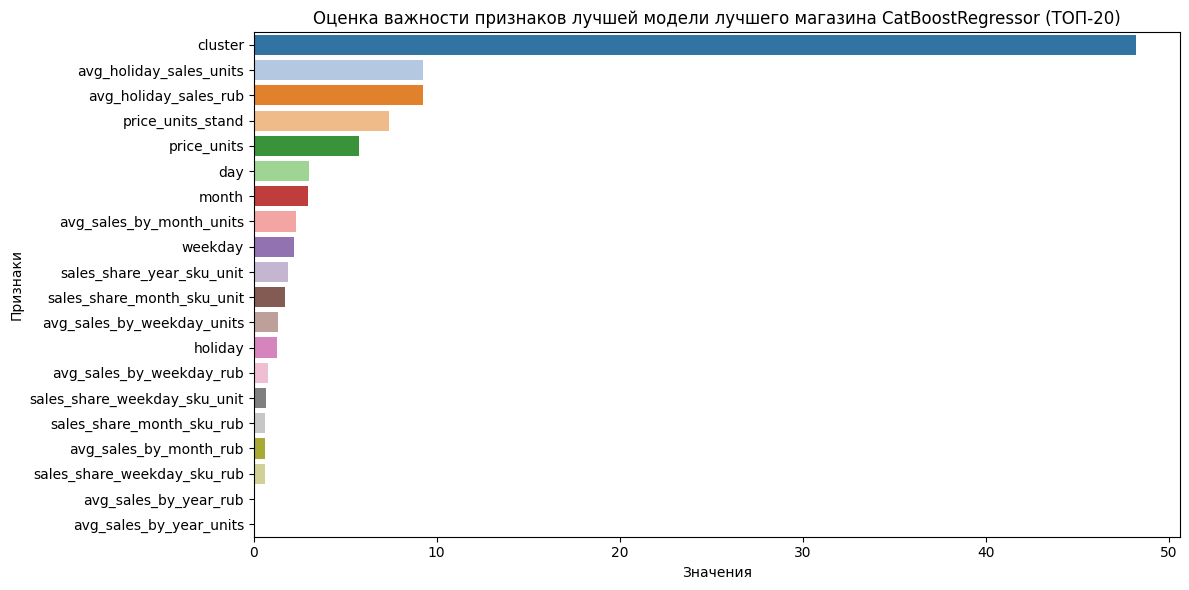

In [221]:
graph_features (feature_importances_cbr, X_test, 'лучшей модели лучшего магазина CatBoostRegressor (ТОП-20)')

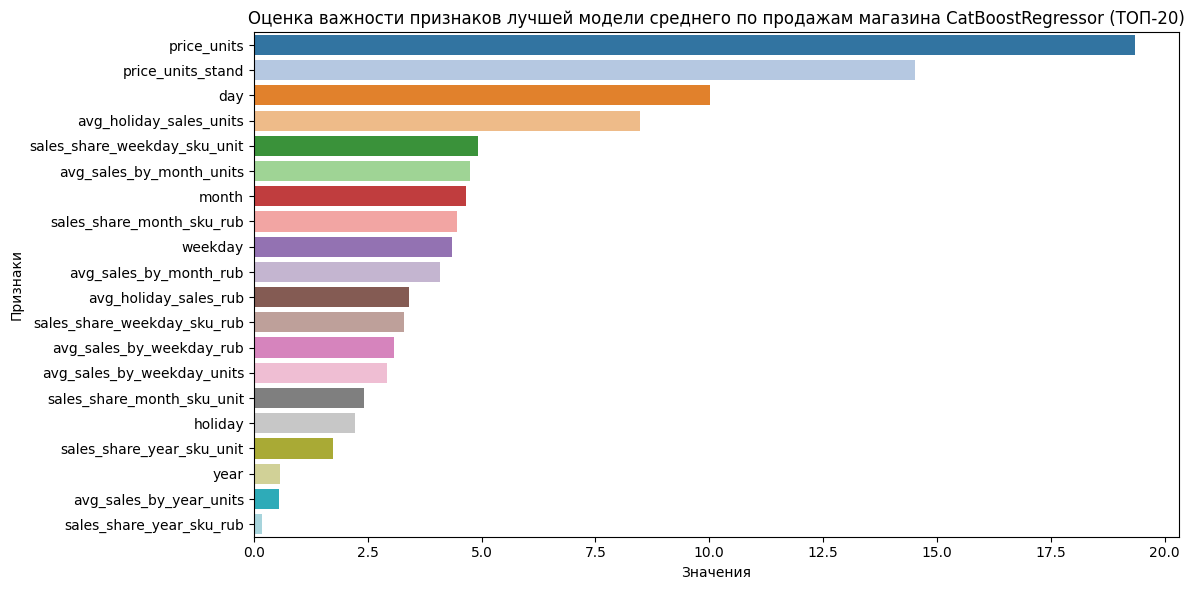

In [220]:
graph_features (feature_importances_cbr2, X_test2, 'лучшей модели среднего по продажам магазина CatBoostRegressor (ТОП-20)')

Вывод:
- В работе тестировали классические модели, CatBoost, ARIMAX, Orbit.
- В качестве лучшей модели выбрали **CatBoost**,
 > лучшие параметры модели:
    ```'bagging_temperature': [0.6], 'depth': [6],
     'iterations': [100],'learning_rate': [0.1],
     'random_strength': [1.0],'verbose': [False]```
     - **Среднее значение WAPE = 46,9%** по всей выборке
- Обучили и протестировали модель п 2х лучшим магазинам и 1 товару метрика качества: **Среднее значение WAPE = 15.7%**
- обучили и протестировали модель на лучшем по количеству продаж магазине.
- оценка важности пизнаков ТОП-20 для магазина с самыми большими прдажами, показало, что наиболее важными при обучении модели являются кластеры и доля продаж количества товаров в выходной. Можно предположить, что на корректность предсказания оказывает большое влияние продажи в праздники.
- Совсем другая картина при анализе признаков среднего по продажам магазина - здесь хоть кластеры и играют ведущую роль, тем не менее следующий по значимости пизнак именно доля продаж в шт. и в какой день в принципе происходит продажа.
- Имеет смысл сделать отделюную модель по прогнозу спроса товаров в праздничные дни.

In [243]:
#Сохраним полученные данные
result_df.to_csv('sales_submission.csv', index=False)

In [244]:
#Выгружаем модель
with open('./model.pkl', 'wb') as model_pkl:
  pickle.dump(best_model_cbr, model_pkl)

# Выводы:
1. Введение:
- Основная задача нашего исследования - создать алгоритм прогноза спроса на 14 дней для товаров собственного производства. Гранулярностью ТК-SKU-День на товары заказчика собственного производства  “Лента”.

2. При загрузке данных было опредено:
- Также проверка структуры данных по магазинам показала высокую корреляцию между рядом признаков, в частности продаж - промо/не промо, принято решение создать отностительные  признаки в долях.
- Иследуемый временной период:  2022-08-01 -  2023-07-18.
- при формировании общего датасета были учтены периоды праздников, был подключен календарь и созданы временные признаки, такие как неделя, день, месяц, год.

3. Результаты анализа данных:
- явных дубликатов не наблюдалось, пропусков нет.
- наблюдались аномалии в виде отрицательных значений в продажах - удалили, так ак непонятна природа.
- Проверили на нулевые значения в столбце целевого признака - заполнили нули значениями из строк ниже.
- исследование временных рядов данных показало:
  -  наблюдается явная сезонность, самый большой всплеск продаж - в декабре, а также май, июнь, что явно совпадает с государственными праздниками.
   > Явные выбросы по продажам в районе НГ (c 29 по 31 декабря), в апреле, видимо Пасха (13-15 апреля) и майских праздников (27-29 мая).
   - Видим линейную зависимость общих продаж и продаж с промо.
   - По итогу при подготовке дата сета для обучения модели ресемплировали по дням - для более точного прогноза.
   - Тренд ровный, совсем немного растущий вверх с явными выбросами.
   - В сезонности наблюдается цикличность в промежутке **2 недели**.
- Определены активные и неактивные магазины, посленые были удалены из исследования (3шт).
- проведен детальный анализ по типам продаж, группам товаров, категориям и подкатегориям, на основе анализа было сформировано более 40 признаков.
- Определены магазины с наибольшим и наименьшим количеством продаж, аналогично проведена выборка по товарам. По итогу были выделен ряд лучших магазинов и преимущественно на них тестировали модели.
- также был сделан вывод, что учитывая то, что некоторые товары продавались только по праздникам - имеет смысл построить дополнительную модель по прогнозу спроса в праздничные дни (это для будущего, вне рамок нынешнего ТЗ).
- Была проведена кластеризация, метом плеча было определено 11 кластеров - их учли при формировании признаков.
- также было проведено кодирование и нормализация признаков для подачи данных на обучение.
- Ресемплирование проводили по дням с шириной окна = 14.

4. Подбор лучшей модели:
- В работе тестировали классические модели, CatBoost, ARIMAX, Orbit:
 > В качестве лучшей модели выбрали **CatBoost**,
 - лучшие параметры модели:
    ```'bagging_temperature': [0.6], 'depth': [6],
     'iterations': [100],'learning_rate': [0.1],
     'random_strength': [1.0],'verbose': [False]```
 - **Среднее значение WAPE = 46,9%** по всей выборке
- по 2х лучшим магазинам и 1 товару метрика качества: **Среднее значение WAPE = 15.7%**
- значительным преимуществом этой модели также считаем скорость ее работы, в несколько раз выше других.
- Сделали оценку важности пизнаков ТОП-20 для 2х магазинов (с наибольшими и минимальными продажами) по одному товару:
  - в обоих случаях самым значимым признаком оказался кластер.
  - а со вторым и третьим по важности признаками картина иная:
    > в магазине с большими продажами большое влияние оказывает признак доли продаж количества товаров в праздники как по количеству, так и по сумме, в то время как для магазина с низкими продажами важно то в какой день в принципе происходят продажи.
    
  - опять же - данный анализ подтвердждает возможность построения отдельной модели в праздничные дни.
- Произвели обучение модели по всем магазинам и товарам.
> Среднее значениена лучшей модели **CatBoost** **WAPE = 46%**.